In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# import gensim
# from gensim.corpora import Dictionary
# from gensim.models import LdaModel
# from gensim.matutils import corpus2csc
# from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
from tabulate import tabulate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\Anurup Salokhe\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel("FINAL Waste strategy COMPLETE online responses to 30.11.23.xlsx")

In [3]:
df.isnull().sum()

Is this consultation being completed over the phone or uploaded as a paper copy? - Phone/paper                                                         0
Is this consultation being completed over the phone or uploaded as a paper copy? - Analyst notes                                                    4224
Are you completing the consultation... - completing as                                                                                                 0
If you are responding as an individual, which of the following best describes you:\n\n - indiv                                                         0
If you are responding as an individual, which of the following best describes you:\n\n - Other (please state)                                       4181
                                                                                                                                                    ... 
Do you consider yourself to have a health condition, disability or impairment? Ple

In [4]:
# df = df.dropna(axis=1, how='all')
df = df.drop(columns=[col for col in df.columns if df[col].isnull().sum() > 4000])

In [5]:
df

Is this consultation being completed over the phone or uploaded as a paper copy? - Phone/paper  \
0                                          Not Answered                                               
1                                          Not Answered                                               
2                                          Not Answered                                               
3                                          Not Answered                                               
4                                          Not Answered                                               
...                                                 ...                                               
4219                                         Paper copy                                               
4220                                         Paper copy                                               
4221                                         Paper copy                                               
4222                                         Paper copy                                               
4223                                         Paper copy                                               

     Are you completing the consultation... - completing as  \
0                                      as an individual       
1                                      as an individual       
2                                      as an individual       
3                                      as an individual       
4                                      as an individual       
...                                                 ...       
4219                                   as an individual       
4220                                   as an individual       
4221                                   as an individual       
4222                                   as an individual       
4223                                   as an individual       

     If you are responding as an individual, which of the following best describes you:\n\n - indiv  \
0                                     a private citizen                                               
1                                     a private citizen                                               
2                                     a private citizen                                               
3                                     a private citizen                                               
4                                     a private citizen                                               
...                                                 ...                                               
4219                                       Not Answered                                               
4220                                  a private citizen                                               
4221                                       Not Answered                                               
4222                                  a private citizen                                               
4223                                  a private citizen                                               

     If you are responding on behalf of an organisation, please select which organisation type: - responding on behalf  \
0                                          Not Answered                                                                  
1                                          Not Answered                                                                  
2                                          Not Answered                                                                  
3                                          Not Answered                                                                  
4                                          Not Answered                                                                  
...                                       

In [6]:
df = df.drop(columns=['Response ID', 'Submitted Date'])

In [7]:
print(df.head())

  Is this consultation being completed over the phone or uploaded as a paper copy? - Phone/paper  \
0                                       Not Answered                                               
1                                       Not Answered                                               
2                                       Not Answered                                               
3                                       Not Answered                                               
4                                       Not Answered                                               

  Are you completing the consultation... - completing as  \
0                                   as an individual       
1                                   as an individual       
2                                   as an individual       
3                                   as an individual       
4                                   as an individual       

  If you are responding as an individu

In [8]:
for column in df:
    df[column].fillna("Null values", inplace = True)

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to C:\Users\Anurup
[nltk_data]     Salokhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anurup
[nltk_data]     Salokhe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
import re

def preprocess(text):
    text = str(text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


for column in df:
    # Function to remove special characters 
    df[column].apply(preprocess)


In [11]:
df.head()

Is this consultation being completed over the phone or uploaded as a paper copy? - Phone/paper  \
0                                       Not Answered                                               
1                                       Not Answered                                               
2                                       Not Answered                                               
3                                       Not Answered                                               
4                                       Not Answered                                               

  Are you completing the consultation... - completing as  \
0                                   as an individual       
1                                   as an individual       
2                                   as an individual       
3                                   as an individual       
4                                   as an individual       

  If you are responding as an individual, which of the following best describes you:\n\n - indiv  \
0                                  a private citizen                                               
1                                  a private citizen                                               
2                                  a private citizen                                               
3                                  a private citizen                                               
4                                  a private citizen                                               

  If you are responding on behalf of an organisation, please select which organisation type: - responding on behalf  \
0                                       Not Answered                                                                  
1                                       Not Answered                                                                  
2                                       Not Answered                                                                  
3                                       Not Answered                                                                  
4                                       Not Answered                                                                  

  If you are responding on behalf of an organisation, please select which organisation type: - Other:  \
0                                       Not Answered                                                    
1                                       Not Answered                                                    
2                                       Not Answered                                                    
3                                       Not Answered                                                    
4                                       Not Answered                                                    

  If you are responding on behalf of an organisation, please select which organisation type: - Special interest group:  \
0                                       Not Answered                                                                     
1                                       Not Answered                                                                     
2                                       Not Answered                                                                     
3                                       Not Answered                                                                     
4                                       Not Answered                                                                     

  Does your organisation primarily work with or represent people from any of these groups? Please tick all that apply. - Other, please specify  \
0                                       Not Answered                                                                                             
1                                       Not Answered                

In [12]:
print(df.shape[1])

59


Column Question :  Is this consultation being completed over the phone or uploaded as a paper copy? - Phone/paper
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Paper copy'
 'Paper copy' 'Paper copy']


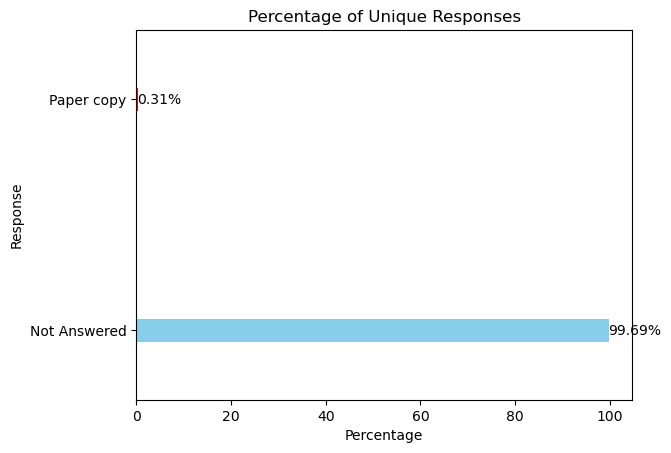

Column Question :  Are you completing the consultation... - completing as
Column Responses :  ['as an individual' 'as an individual' 'as an individual' ...
 'as an individual' 'as an individual' 'as an individual']


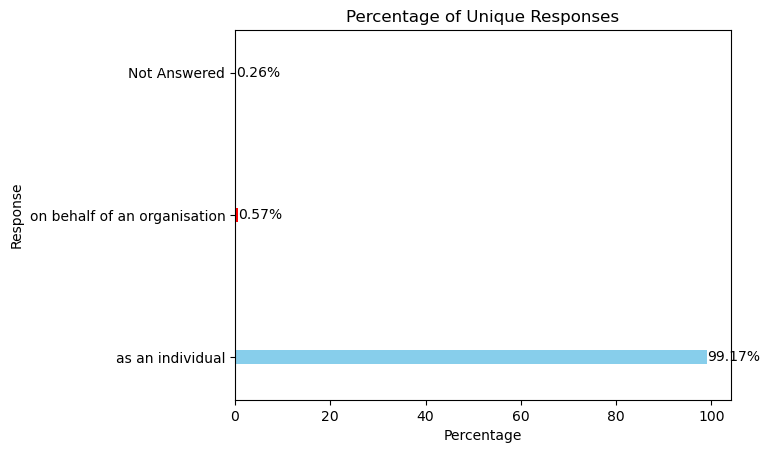

Column Question :  If you are responding as an individual, which of the following best describes you:

 - indiv
Column Responses :  ['a private citizen' 'a private citizen' 'a private citizen' ...
 'Not Answered' 'a private citizen' 'a private citizen']


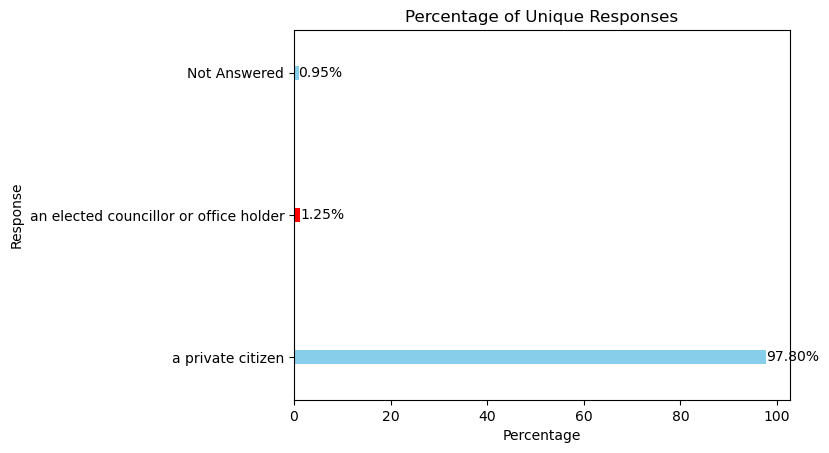

Column Question :  If you are responding on behalf of an organisation, please select which organisation type: - responding on behalf
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Not Answered'
 'Not Answered' 'Not Answered']


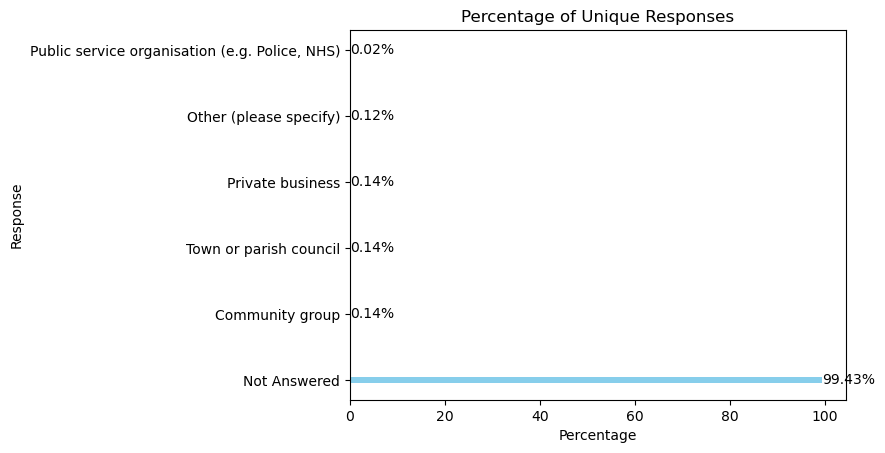

Column Question :  If you are responding on behalf of an organisation, please select which organisation type: - Other:
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


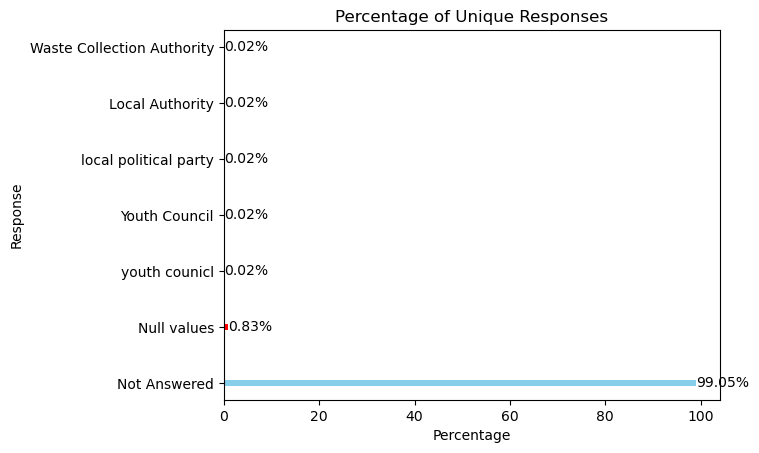

Column Question :  If you are responding on behalf of an organisation, please select which organisation type: - Special interest group:
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


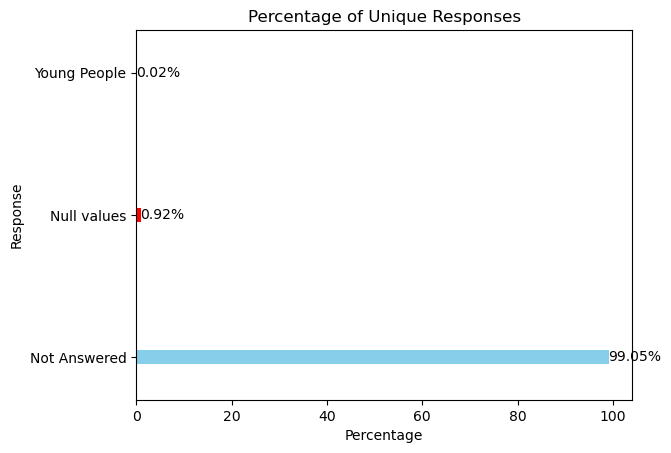

Column Question :  Does your organisation primarily work with or represent people from any of these groups? Please tick all that apply. - Other, please specify
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


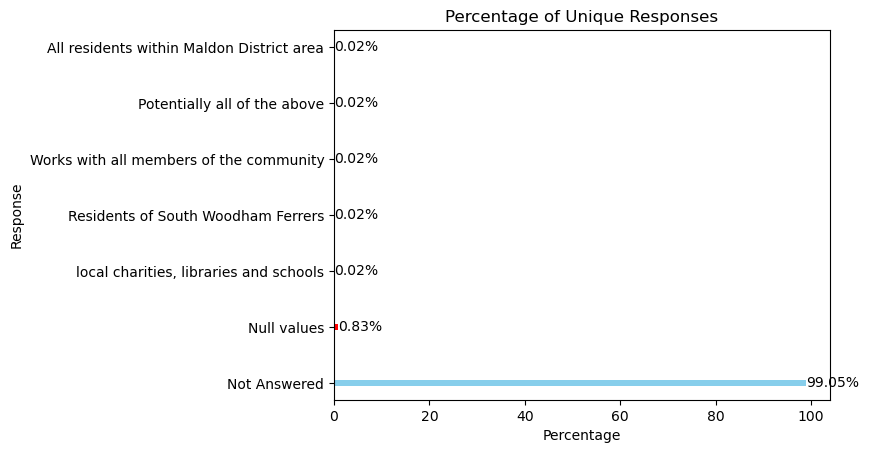

Column Question :  Which district(s), borough(s) or city does your organisation cover? Please tick all that apply - Other, Please state
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


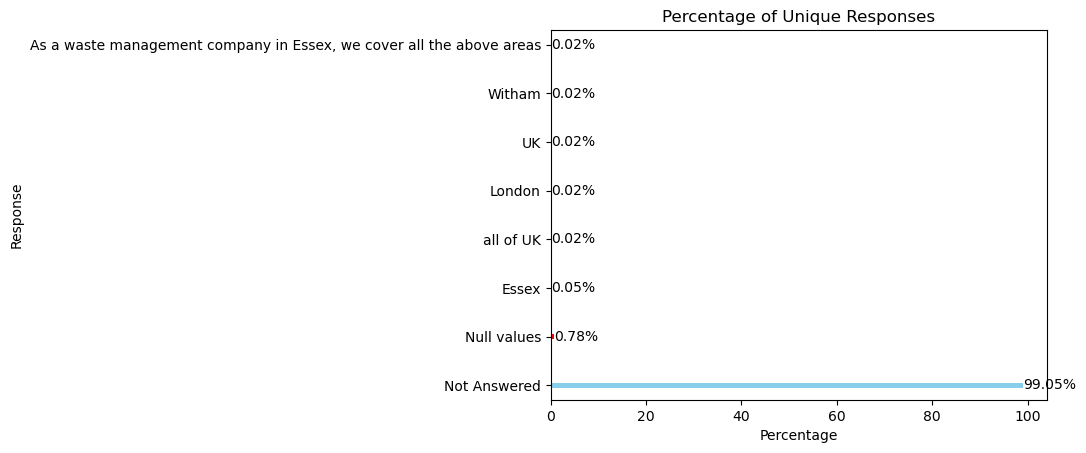

Column Question :  What is the name of your organisation? - name
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


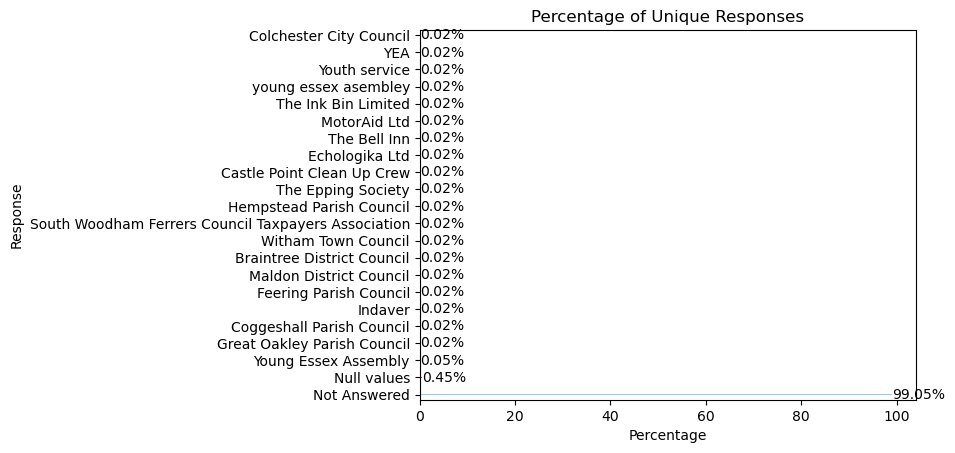

Column Question :  Please provide an email address for your organisation:  - email address
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


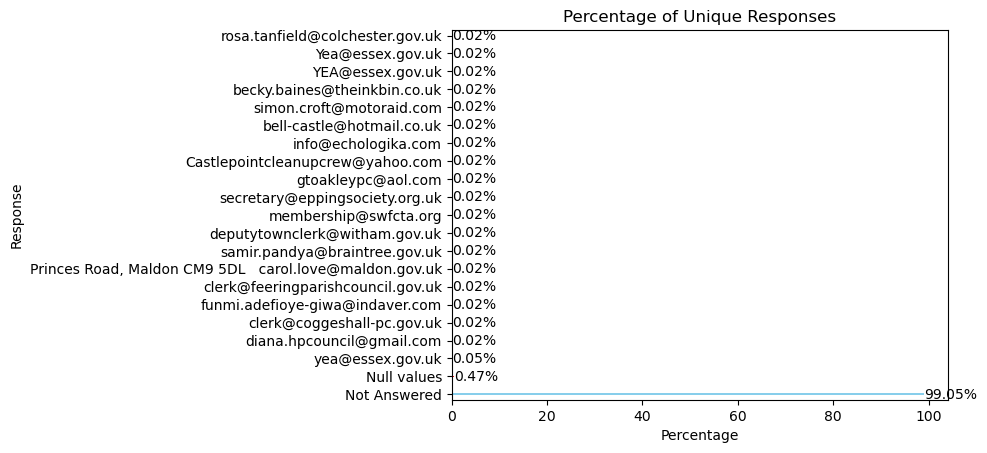

Column Question :  To what extent do you agree or disagree with this vision statement for the Waste Strategy for Essex? - vision
Column Responses :  ['Strongly agree' 'Mostly agree' 'Mostly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


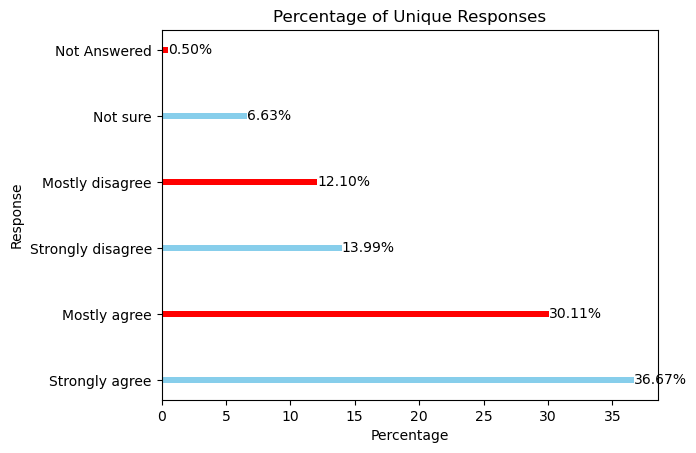

Column Question :  Which of the following statements best describes your thoughts on the targets in the draft strategy?  - targets
Column Responses :  ['I would prefer more ambitious targets'
 'I would prefer more ambitious targets'
 'I think the targets are about right' ... 'Not Answered'
 'I would prefer less ambitious targets'
 'I would prefer more ambitious targets']


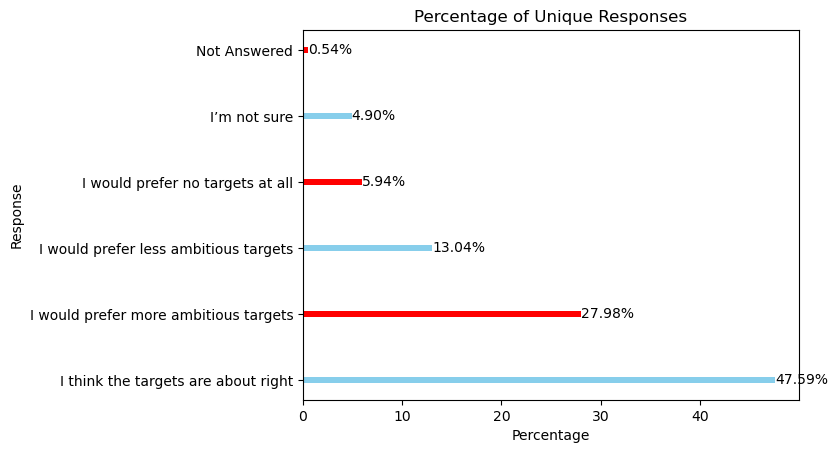

Column Question :  Which of the following best describes your view?
 - higher
Column Responses :  ['I would prefer higher targets that are achieved sooner'
 'I would prefer higher targets that are achieved sooner' 'Not Answered'
 ... 'Not Answered' 'Not Answered'
 'I would prefer these targets to be achieved sooner']


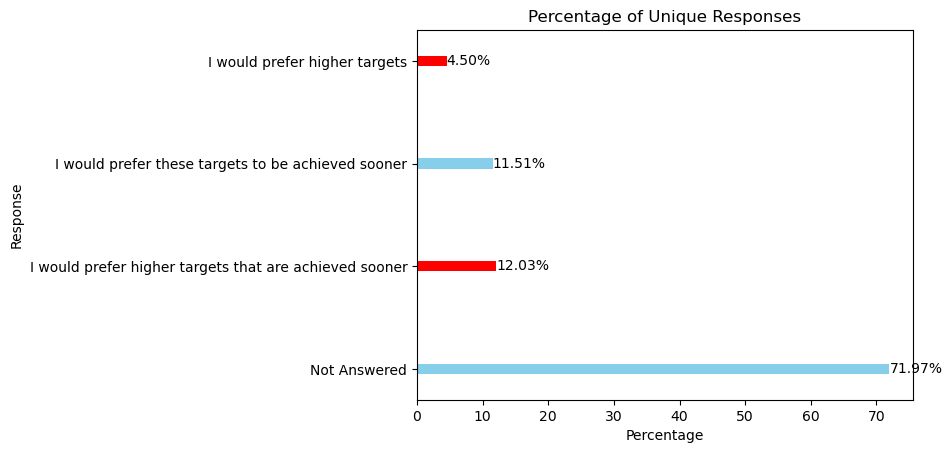

Column Question :  Which of the following best describes your view? - less ambitious
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Not Answered'
 'I would prefer lower targets that are achieved at a later date'
 'Not Answered']


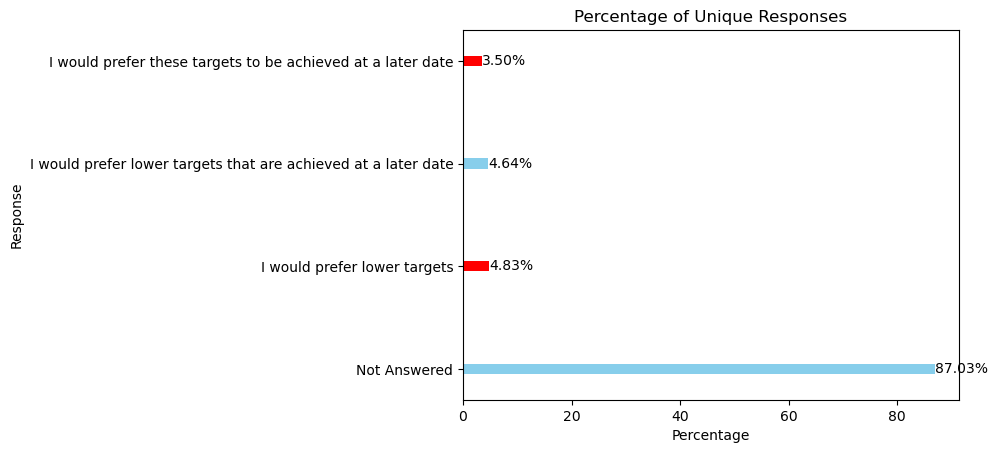

Column Question :  Which of the following statements best describes your thoughts on the ambitions in the draft strategy? - ambitions
Column Responses :  ['I would prefer higher ambitions' 'I would prefer higher ambitions'
 'I think the ambitions are about right' ... 'Not Answered'
 'I would prefer no ambitions at all' 'I would prefer higher ambitions']


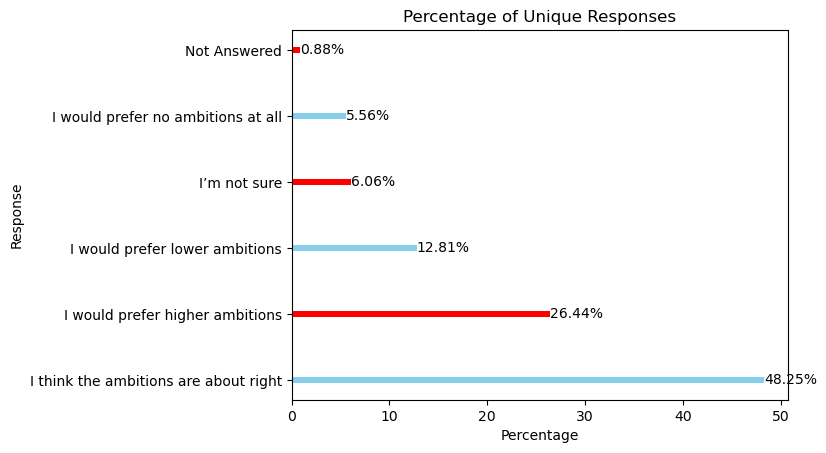

Column Question :  Which of the following best describes your view? - Ambitions
Column Responses :  ['I would prefer higher ambitions that are achieved sooner'
 'I would prefer these ambitions to be achieved sooner' 'Not Answered' ...
 'Not Answered' 'Not Answered'
 'I would prefer these ambitions to be achieved sooner']


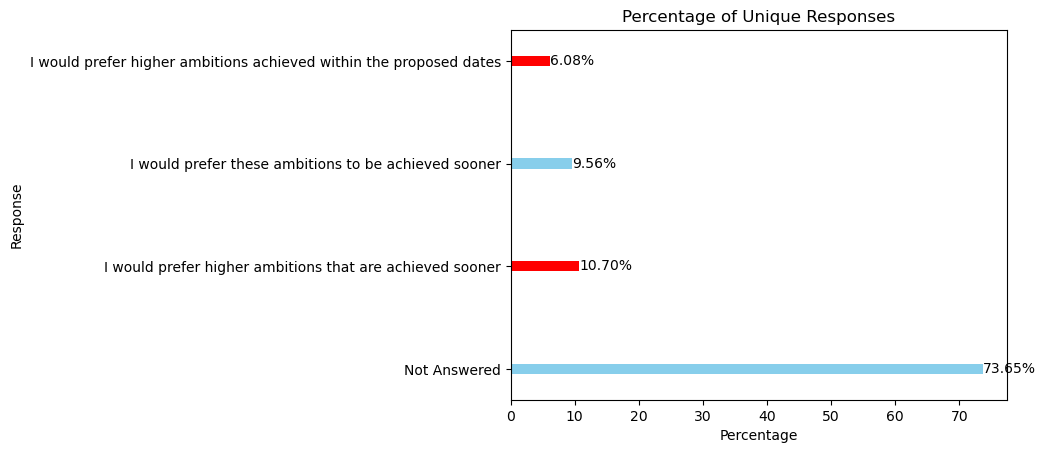

Column Question :  Which of the following best describes your view? - Ambitions.1
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Not Answered'
 'Not Answered' 'Not Answered']


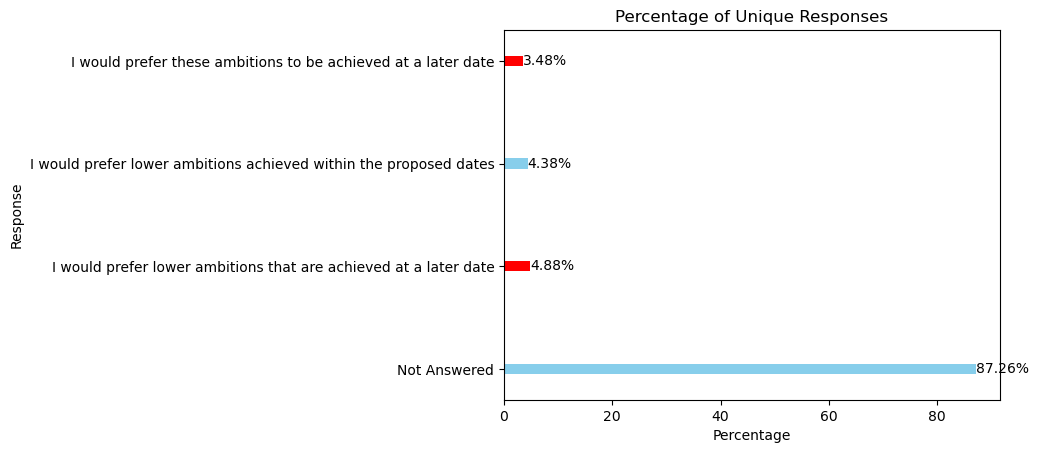

Column Question :  To what extent do you agree or disagree with this priority? - priority
Column Responses :  ['Strongly agree' 'Strongly agree' 'Mostly agree' ... 'Not Answered'
 'Not sure' 'Mostly agree']


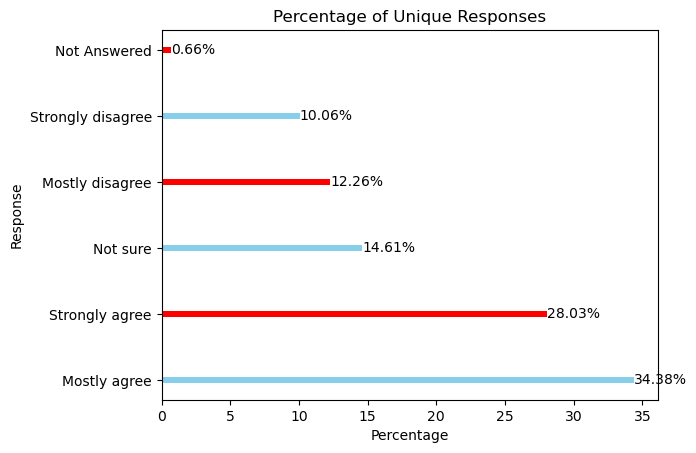

Column Question :  To what extent do you agree or disagree with this priority? - agree
Column Responses :  ['Strongly agree' 'Strongly agree' 'Mostly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


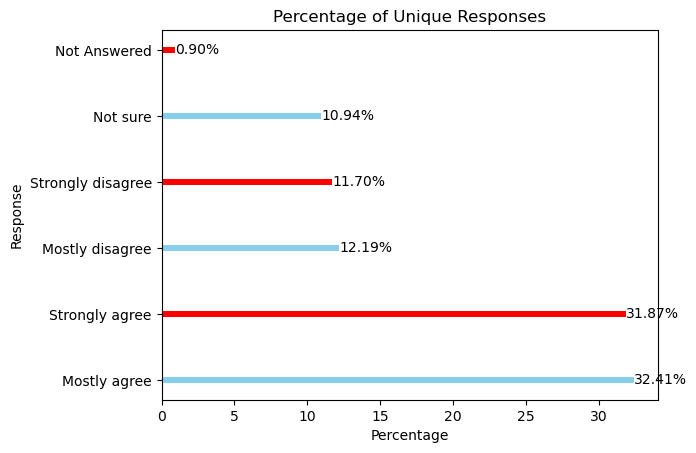

Column Question :  To what extent do you agree or disagree with this priority? - agree.1
Column Responses :  ['Strongly agree' 'Strongly agree' 'Not sure' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


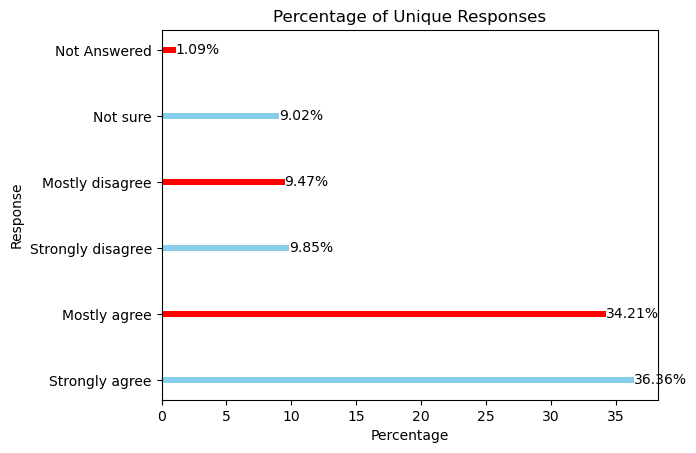

Column Question :  To what extent do you agree or disagree with this priority? - agree.2
Column Responses :  ['Strongly agree' 'Strongly agree' 'Strongly agree' ... 'Not Answered'
 'Not sure' 'Strongly agree']


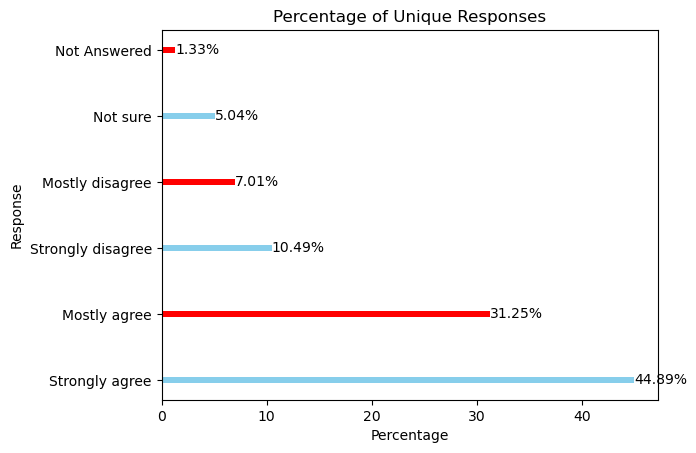

Column Question :  To what extent do you agree or disagree that the EWP should reduce the use of landfill? - landfill
Column Responses :  ['Mostly agree' 'Strongly agree' 'Strongly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


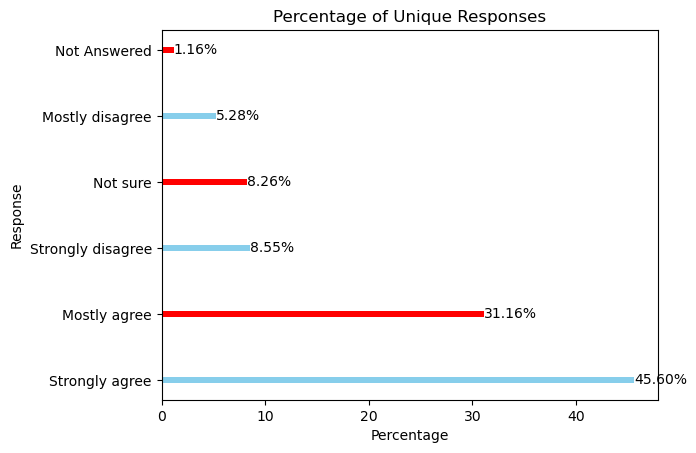

Column Question :  To what extent do you agree or disagree that adopting the use of anaerobic digestion for the treatment of food waste is the right solution? - anaerobic digestion
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Not Answered'
 'Mostly agree' 'Mostly agree']


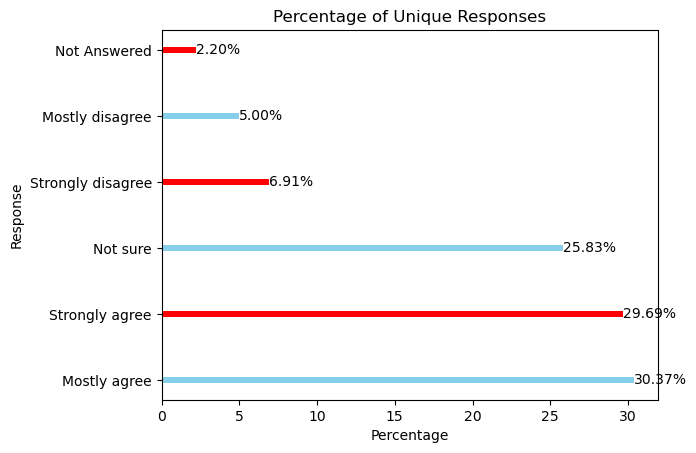

Column Question :  To what extent do you agree or disagree that, after recycling everything we can, adopting Energy from Waste (EfW) for residual waste is the right solution? - EFW
Column Responses :  ['Strongly disagree' 'Mostly agree' 'Strongly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


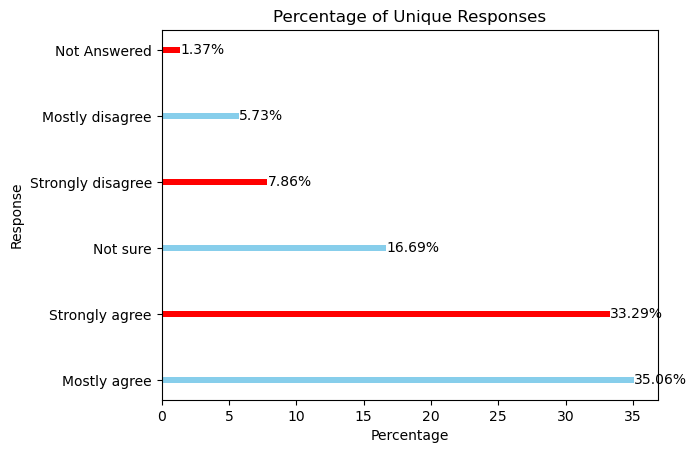

Column Question :  To what extent do you agree or disagree with this priority? - agree.3
Column Responses :  ['Strongly agree' 'Strongly agree' 'Strongly agree' ... 'Not Answered'
 'Mostly disagree' 'Mostly agree']


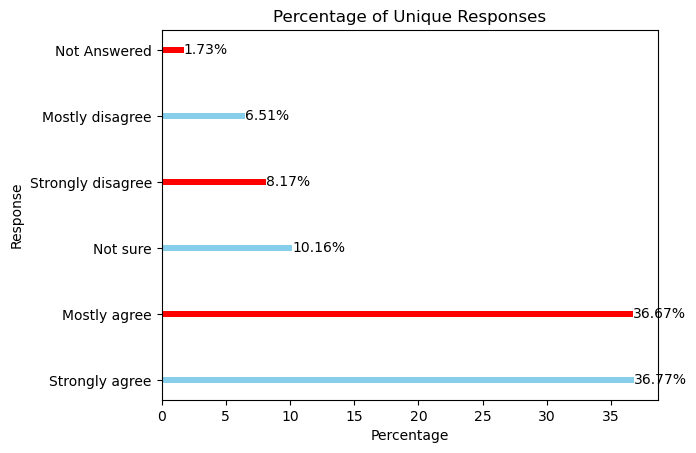

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work to reduce the carbon impact of waste operations by increasing use of alternative fuels for our vehicles and equipment, and making waste transport routes as efficient as possible.
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Null values'
 'Mostly agree' 'Strongly agree']


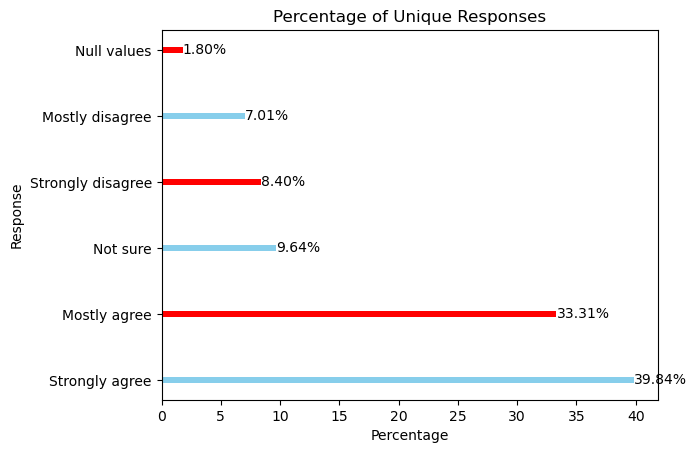

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together to make the network of recycling centres, waste transfer stations and depots as efficient as possible
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Null values'
 'Mostly agree' 'Strongly agree']


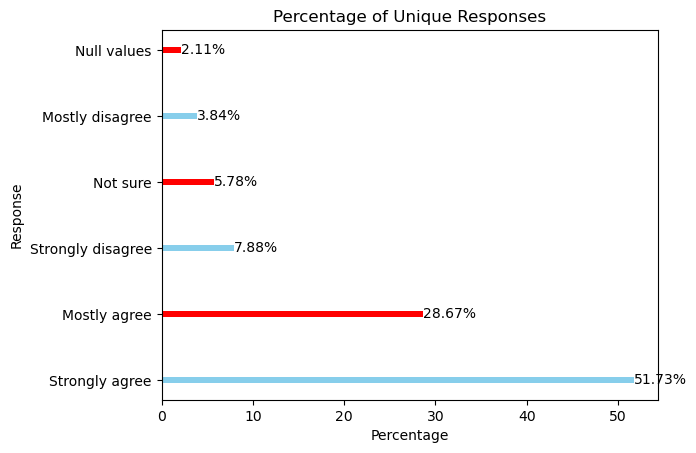

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Explore carbon capture, utilisation and storage, and carbon offsetting to mitigate unavoidable greenhouse gas emissions
Column Responses :  ['Strongly agree' 'Strongly agree' 'Strongly agree' ... 'Null values'
 'Not sure' 'Mostly disagree']


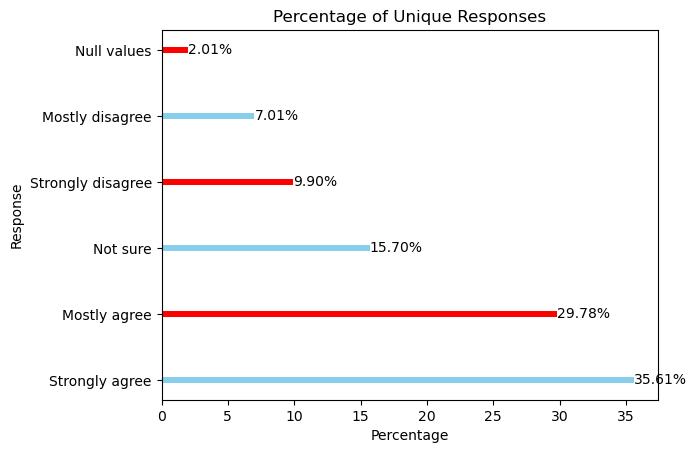

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Stay abreast of innovation, trends and examples of best practice to shape service design
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Null values'
 'Not sure' 'Strongly agree']


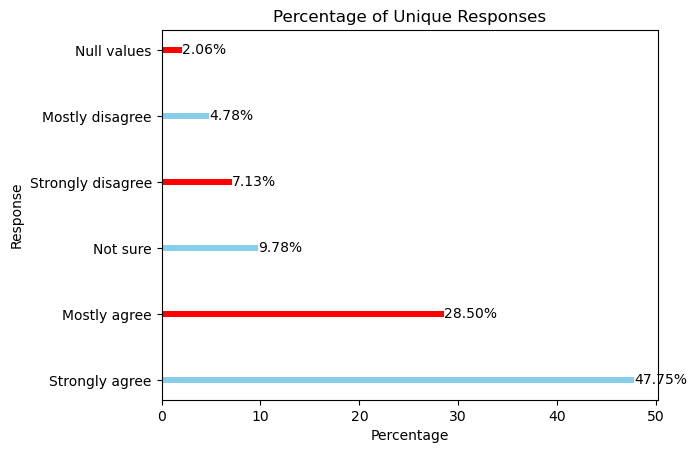

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together and maximise opportunities to increase recycling in public spaces and reduce litter.
Column Responses :  ['Strongly agree' 'Strongly agree' 'Null values' ... 'Null values'
 'Mostly agree' 'Strongly agree']


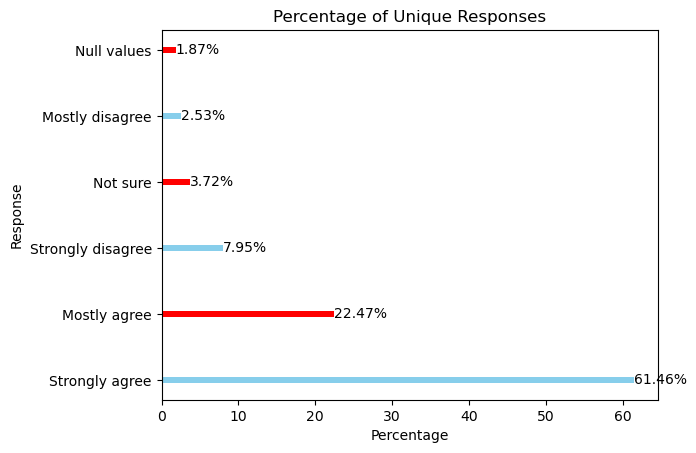

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Be an active voice striving to shape government policy, legislation, and regulation through engagement, consultations, and lobbying
Column Responses :  ['Strongly agree' 'Strongly agree' 'Strongly agree' ... 'Null values'
 'Mostly disagree' 'Strongly agree']


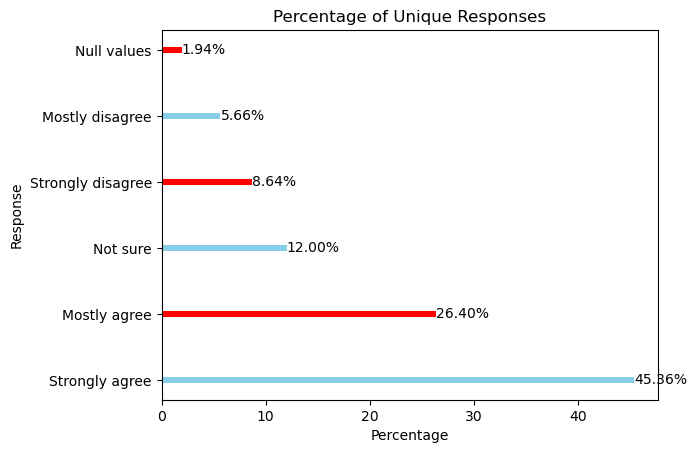

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together to develop opportunities for employment, environmental benefit, and reduced costs
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Null values'
 'Mostly agree' 'Strongly agree']


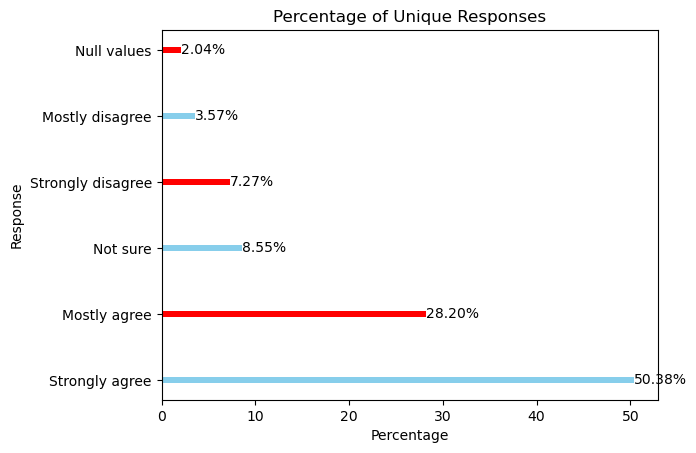

Column Question :  To what extent do you agree or disagree with this priority? - agree.4
Column Responses :  ['Strongly agree' 'Strongly agree' 'Mostly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


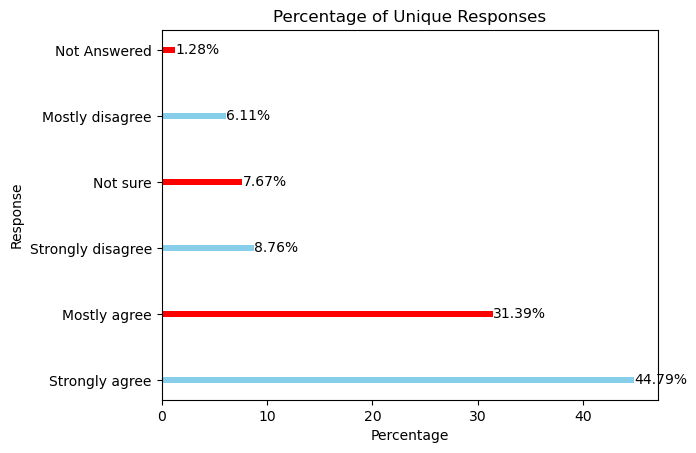

Column Question :  To what extent do you agree or disagree with this approach to research, planning and performance monitoring?   - agree
Column Responses :  ['Mostly agree' 'Mostly agree' 'Mostly agree' ... 'Not Answered'
 'Mostly agree' 'Mostly agree']


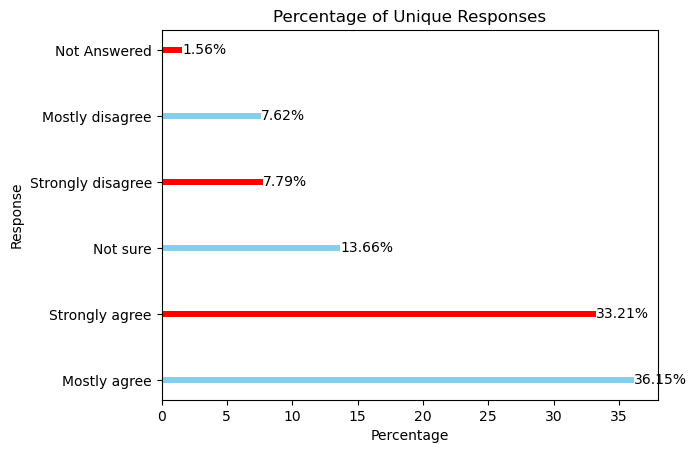

Column Question :  Do you wish to provide any comments on the Environmental Report? - Environmental Report
Column Responses :  ['No' 'No' 'No' ... 'Not Answered' 'No' 'Yes']


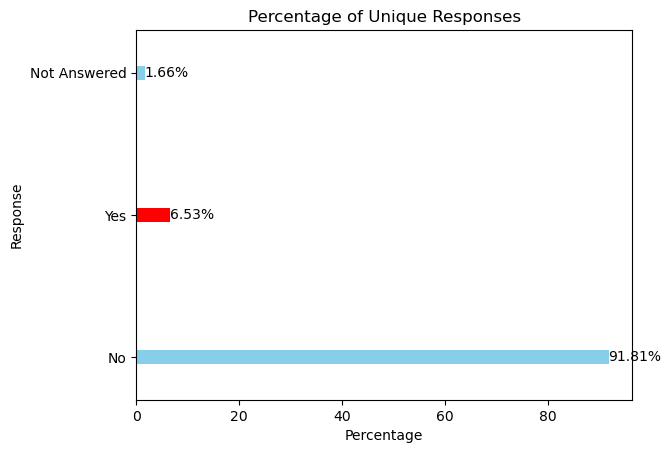

Column Question :  Does the Environmental Report correctly identify the likely significant effects of the draft Strategy? - Strategic Environment Assessment
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Not Answered'
 'Not Answered' 'No']


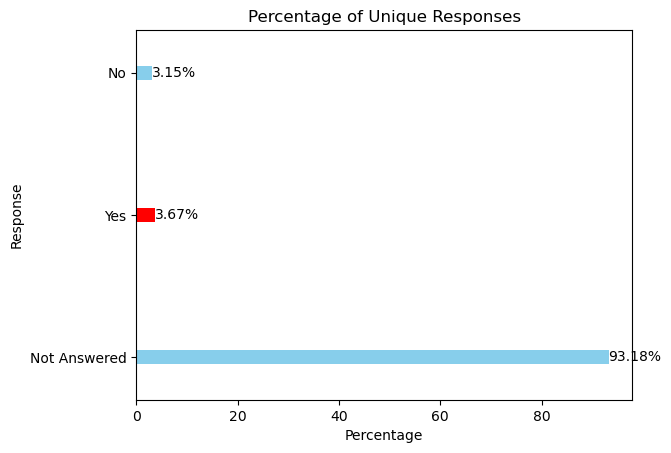

Column Question :  Which Essex district, city or borough do you live in? - District
Column Responses :  ['Braintree' 'Brentwood' 'Chelmsford' ... 'Basildon' 'Braintree'
 'Basildon']


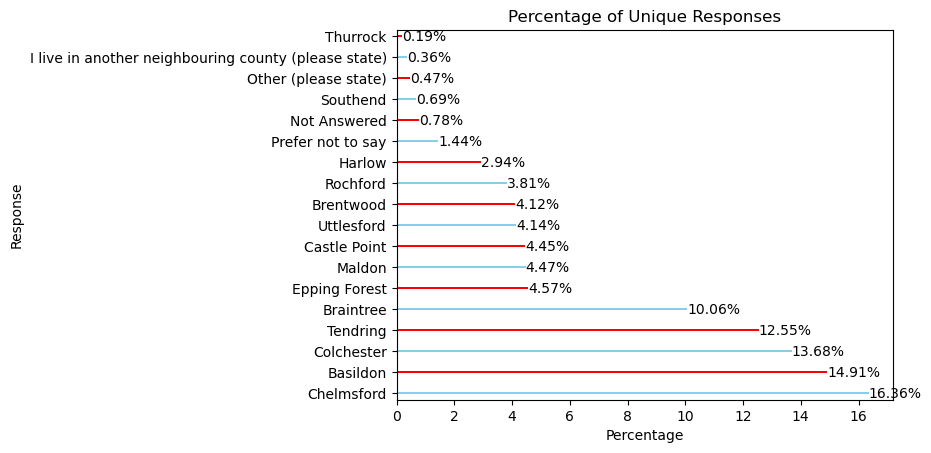

Column Question :  Which age group do you belong to? - Age
Column Responses :  ['55-64' '65+' '35-44' ... '65+' '65+' '55-64']


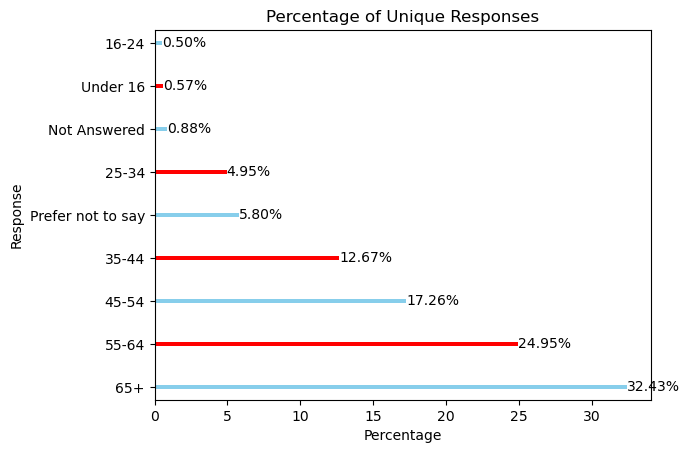

Column Question :  What is your gender? - Gender
Column Responses :  ['Not Answered' 'Male' 'Male' ... 'Male' 'Male' 'Female']


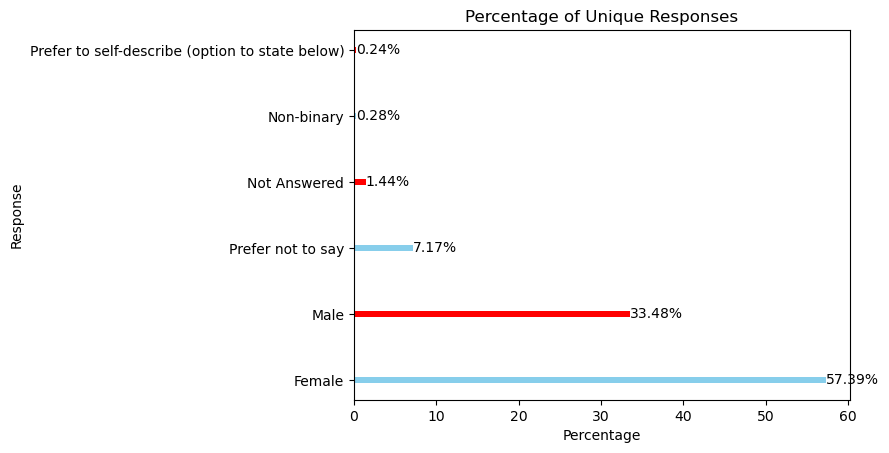

Column Question :  What is your ethnicity? - Ethnicity
Column Responses :  ['White British' 'White British' 'White British' ... 'White British'
 'White British' 'White British']


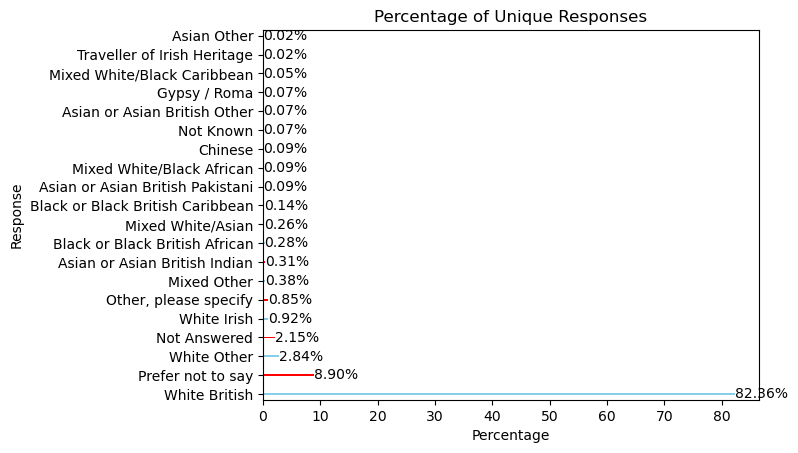

Column Question :  What is your religion/faith? - Religion/Faith
Column Responses :  ['Christian' 'Not sure' 'Christian' ... 'Christian' 'Christian'
 'Prefer not to say']


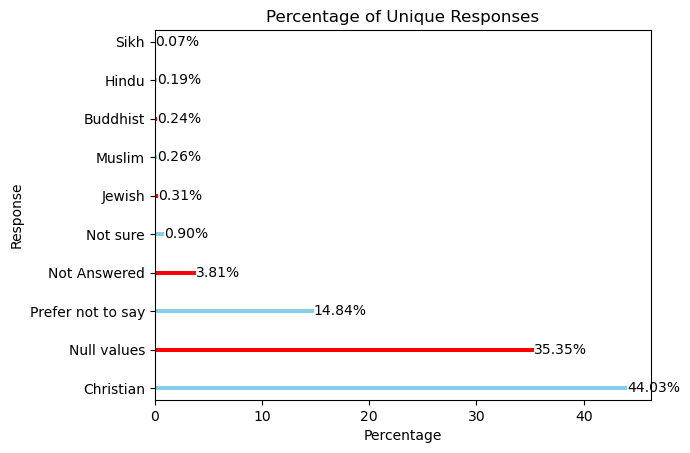

Column Question :  Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - No impairment
Column Responses :  ['No impairment' 'No impairment' 'No impairment' ... 'No impairment'
 'Null values' 'No impairment']


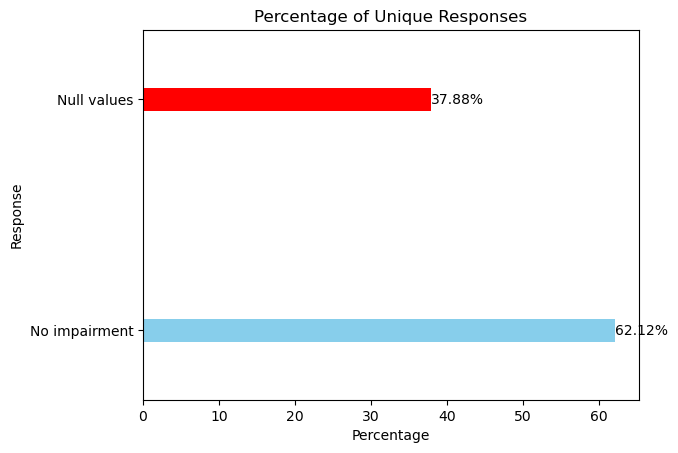

Column Question :  Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Hearing impairment/deaf
Column Responses :  ['Null values' 'Null values' 'Null values' ... 'Null values' 'Null values'
 'Null values']


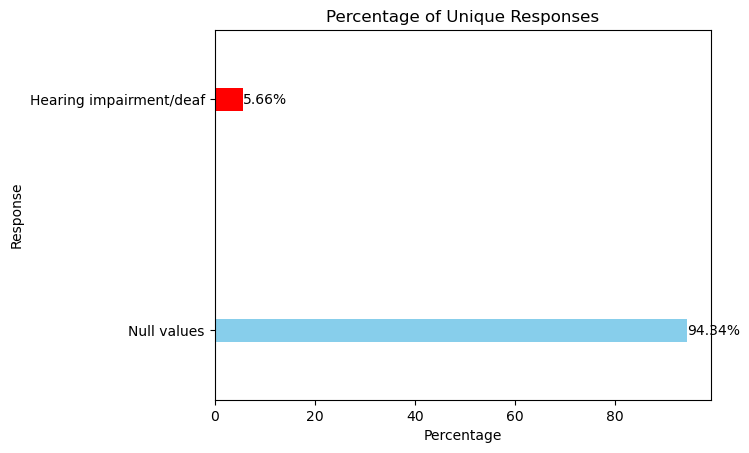

Column Question :  Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Physical impairment
Column Responses :  ['Null values' 'Null values' 'Null values' ... 'Null values'
 'Physical impairment' 'Null values']


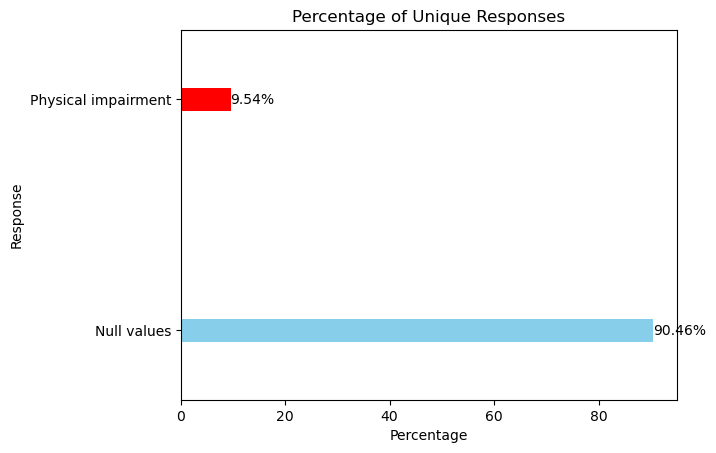

Column Question :  Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Prefer not to say
Column Responses :  ['Null values' 'Null values' 'Null values' ... 'Null values' 'Null values'
 'Null values']


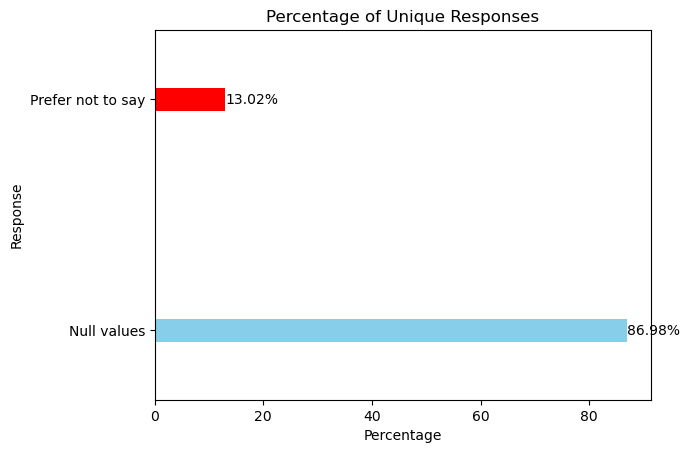

In [13]:
# Iterate over all column names
for column in df:
    
    # data cleaning without droppig column
    df[column].fillna("Null values", inplace = True)  
    
    # Count the occurrences of each response
    response_counts = df[column].value_counts()
    
    if df[column].nunique() < 30:
        
        columnSeriesObj = df[column]
        print('Column Question : ', column)
        print('Column Responses : ', columnSeriesObj.values)

        # Calculate the percentage of each response
        response_percentages = (response_counts / response_counts.sum()) * 100

        # Plot the horizontal bar graph with small bar width
        fig, ax = plt.subplots()
        response_percentages.plot(kind='barh', ax=ax, color=['skyblue','Red'], width=0.1)

        # Annotate the bars with the percentage values
        for i in ax.containers:
            ax.bar_label(i, fmt='%.2f%%')

        # Add title and labels
        ax.set_title('Percentage of Unique Responses')
        ax.set_xlabel('Percentage')
        ax.set_ylabel('Response')

        # Display the plot
        plt.show()
    

Column Question :  Is this consultation being completed over the phone or uploaded as a paper copy? - Phone/paper
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Paper copy'
 'Paper copy' 'Paper copy']


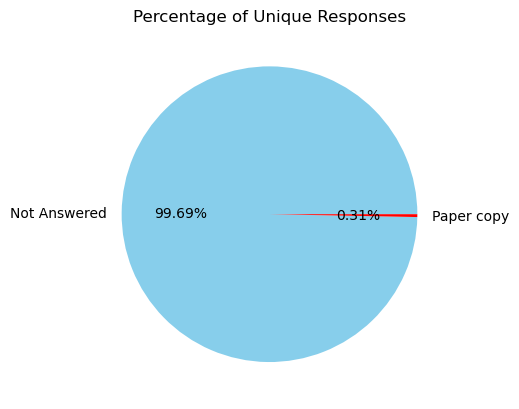

Column Question :  Are you completing the consultation... - completing as
Column Responses :  ['as an individual' 'as an individual' 'as an individual' ...
 'as an individual' 'as an individual' 'as an individual']


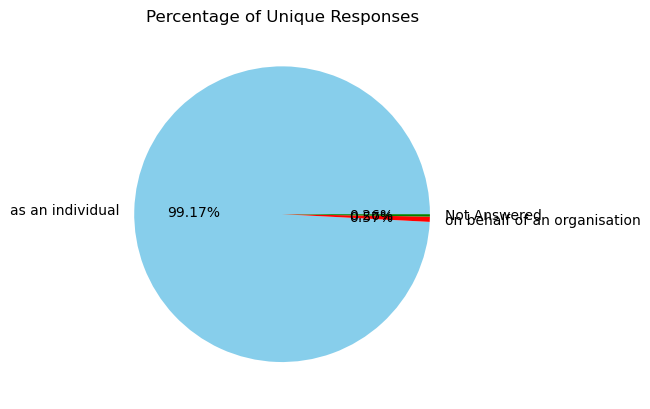

Column Question :  If you are responding as an individual, which of the following best describes you:

 - indiv
Column Responses :  ['a private citizen' 'a private citizen' 'a private citizen' ...
 'Not Answered' 'a private citizen' 'a private citizen']


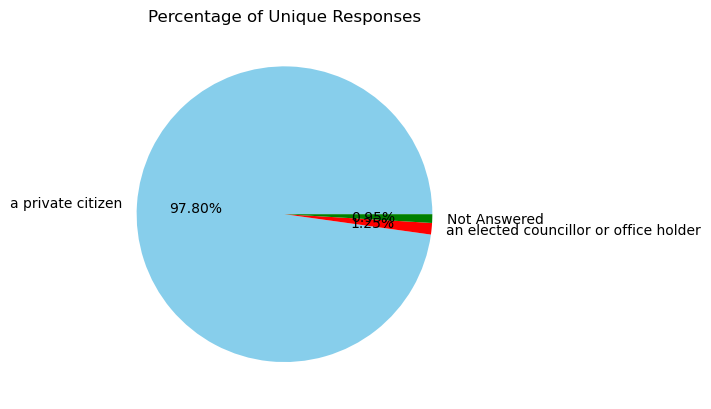

Column Question :  If you are responding on behalf of an organisation, please select which organisation type: - responding on behalf
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Not Answered'
 'Not Answered' 'Not Answered']


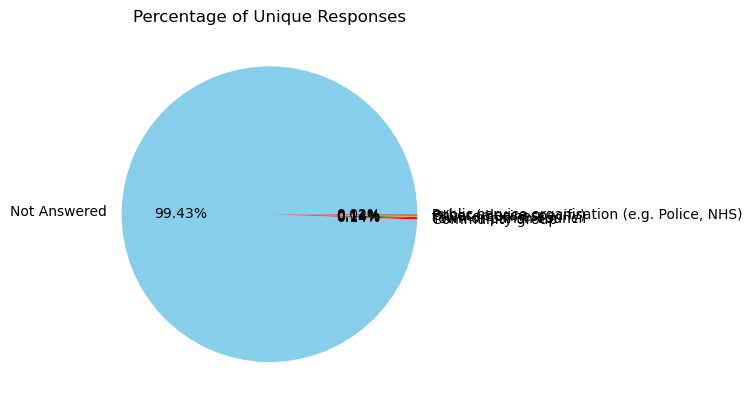

Column Question :  If you are responding on behalf of an organisation, please select which organisation type: - Other:
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


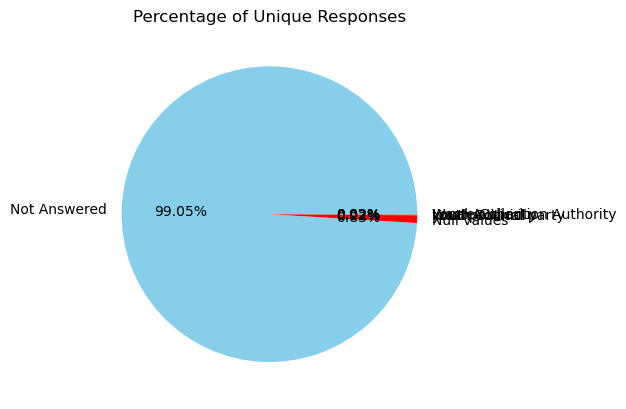

Column Question :  If you are responding on behalf of an organisation, please select which organisation type: - Special interest group:
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


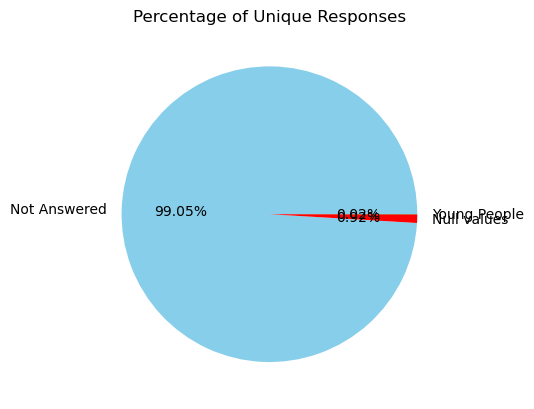

Column Question :  Does your organisation primarily work with or represent people from any of these groups? Please tick all that apply. - Other, please specify
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


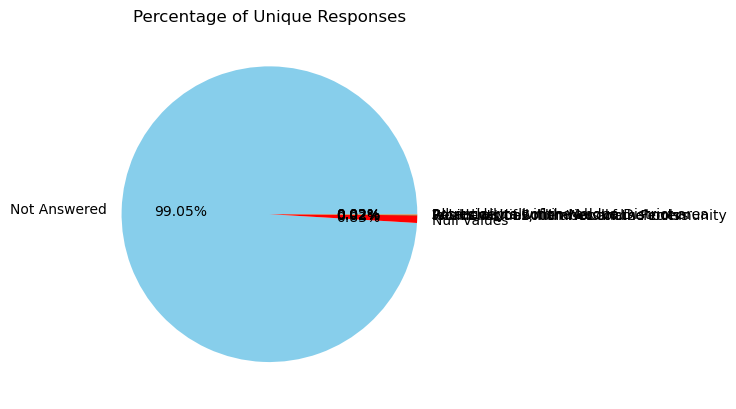

Column Question :  Which district(s), borough(s) or city does your organisation cover? Please tick all that apply - Other, Please state
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


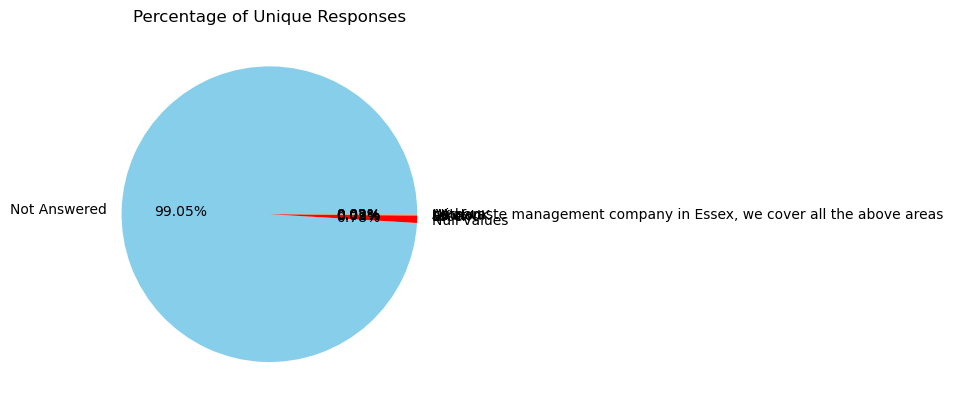

Column Question :  What is the name of your organisation? - name
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


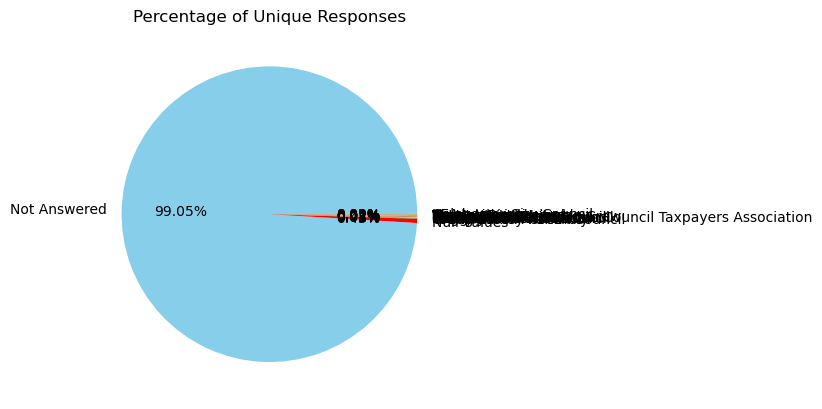

Column Question :  Please provide an email address for your organisation:  - email address
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Null values'
 'Null values' 'Null values']


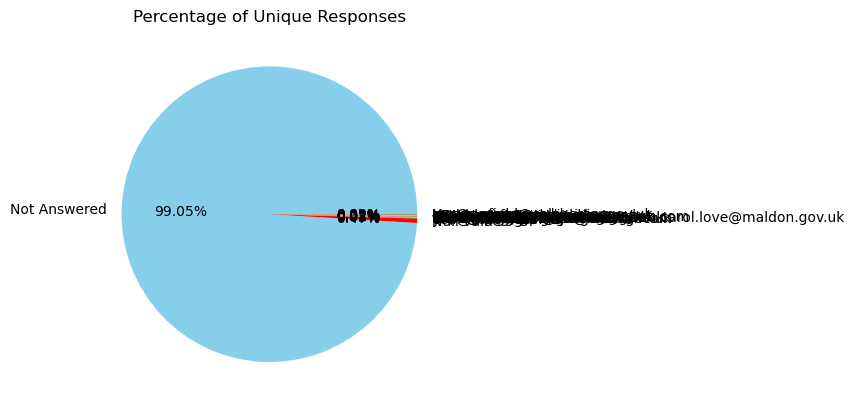

Column Question :  To what extent do you agree or disagree with this vision statement for the Waste Strategy for Essex? - vision
Column Responses :  ['Strongly agree' 'Mostly agree' 'Mostly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


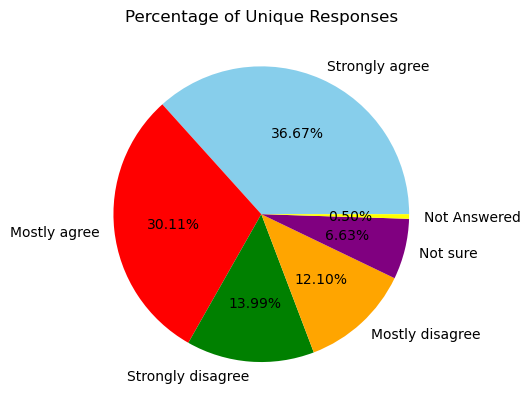

Column Question :  Which of the following statements best describes your thoughts on the targets in the draft strategy?  - targets
Column Responses :  ['I would prefer more ambitious targets'
 'I would prefer more ambitious targets'
 'I think the targets are about right' ... 'Not Answered'
 'I would prefer less ambitious targets'
 'I would prefer more ambitious targets']


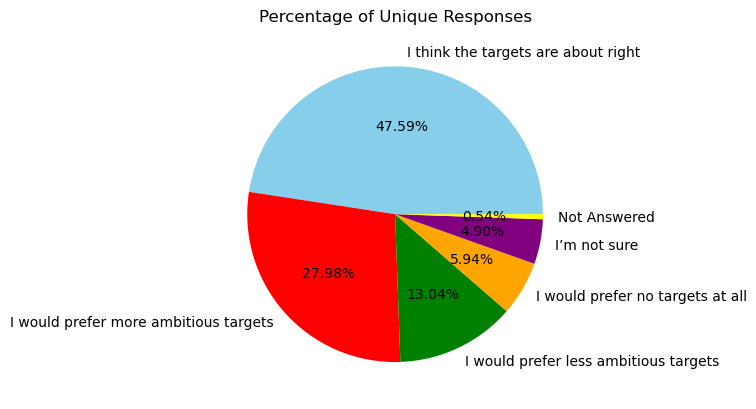

Column Question :  Which of the following best describes your view?
 - higher
Column Responses :  ['I would prefer higher targets that are achieved sooner'
 'I would prefer higher targets that are achieved sooner' 'Not Answered'
 ... 'Not Answered' 'Not Answered'
 'I would prefer these targets to be achieved sooner']


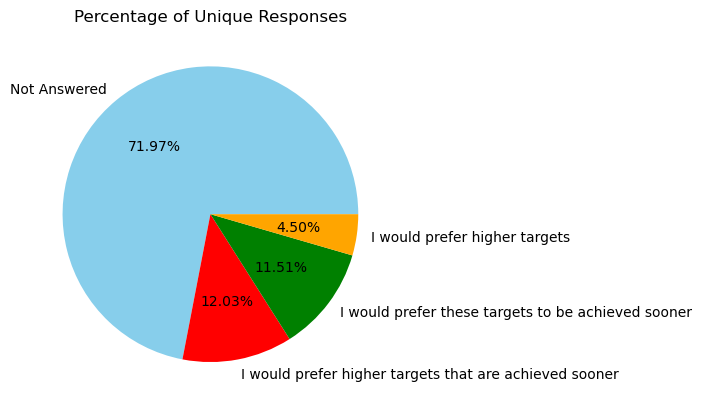

Column Question :  Which of the following best describes your view? - less ambitious
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Not Answered'
 'I would prefer lower targets that are achieved at a later date'
 'Not Answered']


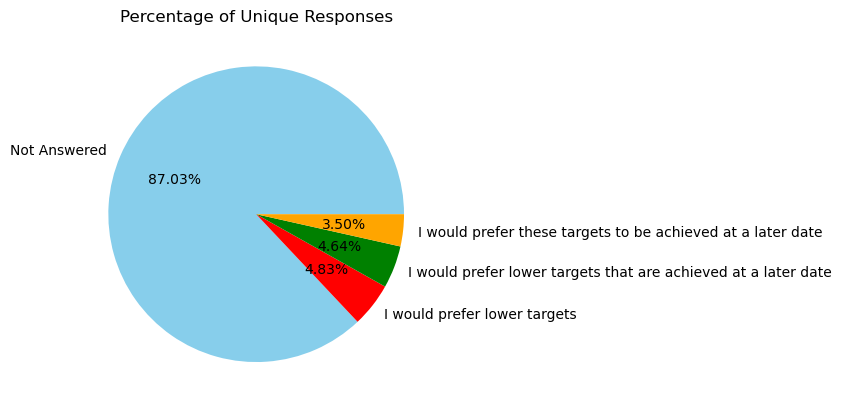

Column Question :  Which of the following statements best describes your thoughts on the ambitions in the draft strategy? - ambitions
Column Responses :  ['I would prefer higher ambitions' 'I would prefer higher ambitions'
 'I think the ambitions are about right' ... 'Not Answered'
 'I would prefer no ambitions at all' 'I would prefer higher ambitions']


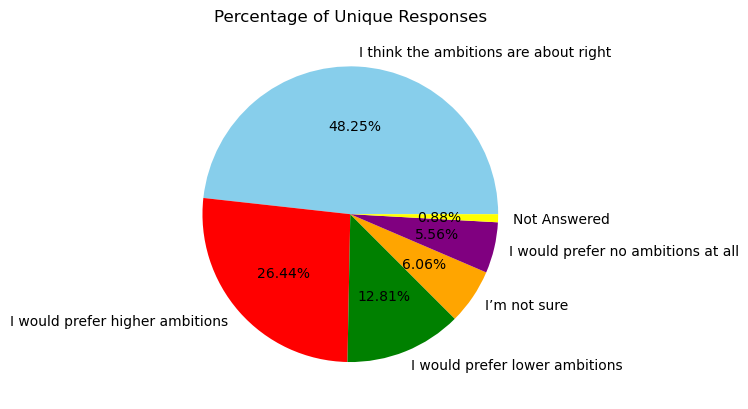

Column Question :  Which of the following best describes your view? - Ambitions
Column Responses :  ['I would prefer higher ambitions that are achieved sooner'
 'I would prefer these ambitions to be achieved sooner' 'Not Answered' ...
 'Not Answered' 'Not Answered'
 'I would prefer these ambitions to be achieved sooner']


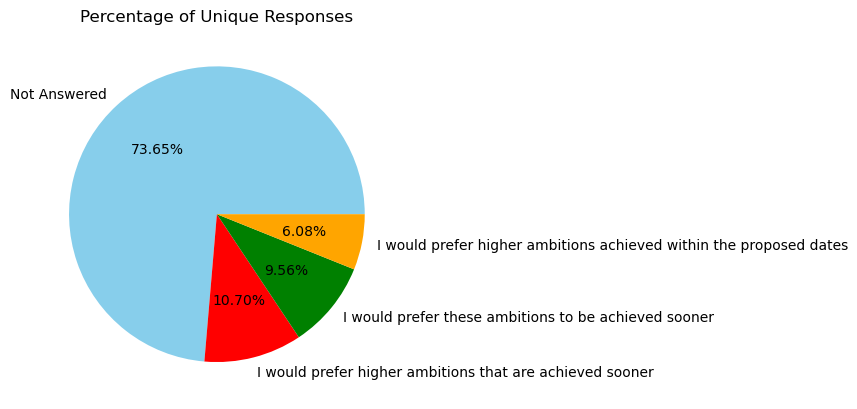

Column Question :  Which of the following best describes your view? - Ambitions.1
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Not Answered'
 'Not Answered' 'Not Answered']


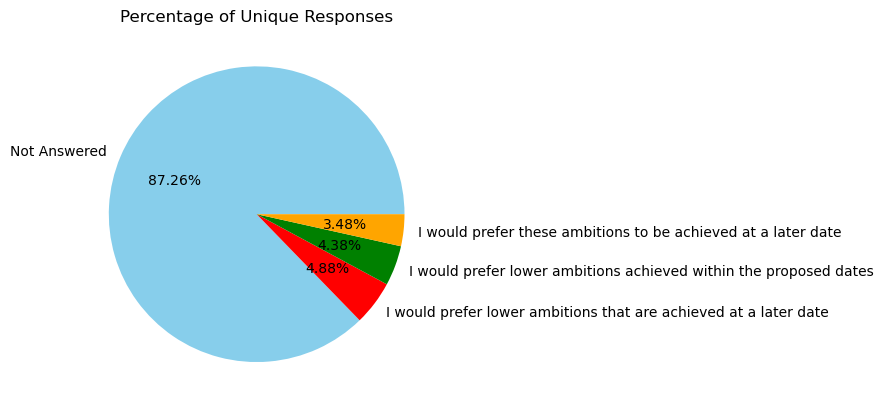

Column Question :  To what extent do you agree or disagree with this priority? - priority
Column Responses :  ['Strongly agree' 'Strongly agree' 'Mostly agree' ... 'Not Answered'
 'Not sure' 'Mostly agree']


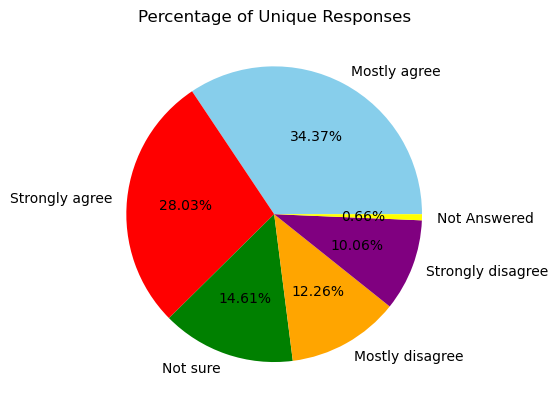

Column Question :  To what extent do you agree or disagree with this priority? - agree
Column Responses :  ['Strongly agree' 'Strongly agree' 'Mostly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


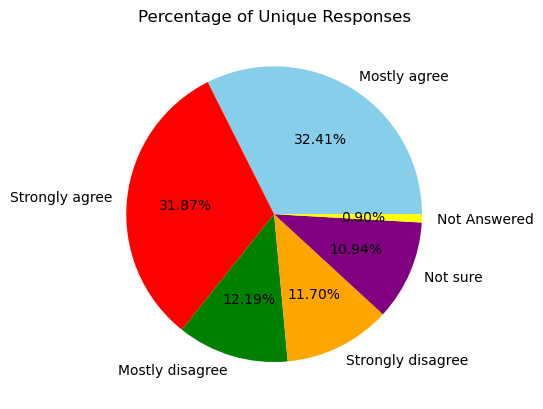

Column Question :  To what extent do you agree or disagree with this priority? - agree.1
Column Responses :  ['Strongly agree' 'Strongly agree' 'Not sure' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


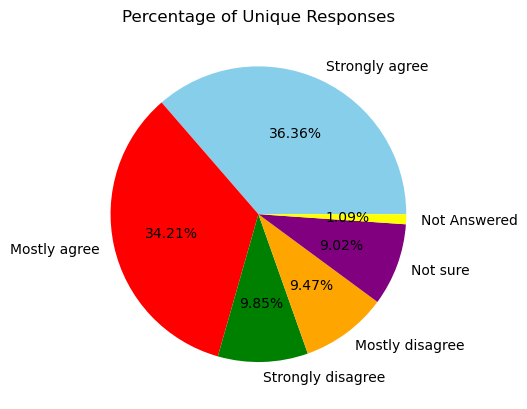

Column Question :  To what extent do you agree or disagree with this priority? - agree.2
Column Responses :  ['Strongly agree' 'Strongly agree' 'Strongly agree' ... 'Not Answered'
 'Not sure' 'Strongly agree']


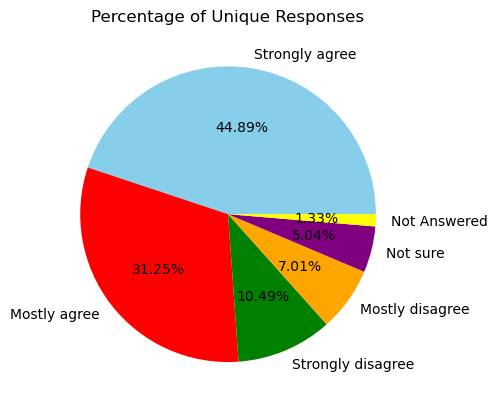

Column Question :  To what extent do you agree or disagree that the EWP should reduce the use of landfill? - landfill
Column Responses :  ['Mostly agree' 'Strongly agree' 'Strongly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


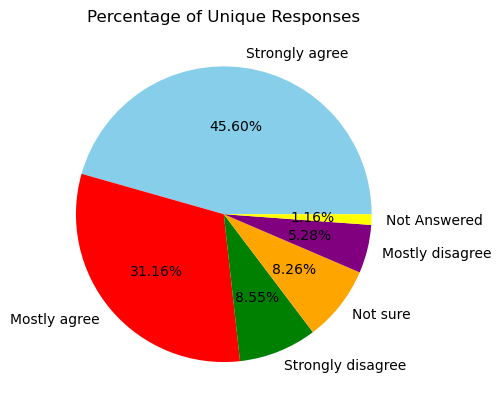

Column Question :  To what extent do you agree or disagree that adopting the use of anaerobic digestion for the treatment of food waste is the right solution? - anaerobic digestion
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Not Answered'
 'Mostly agree' 'Mostly agree']


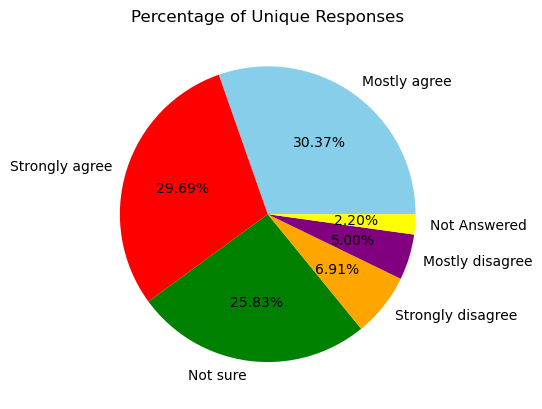

Column Question :  To what extent do you agree or disagree that, after recycling everything we can, adopting Energy from Waste (EfW) for residual waste is the right solution? - EFW
Column Responses :  ['Strongly disagree' 'Mostly agree' 'Strongly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


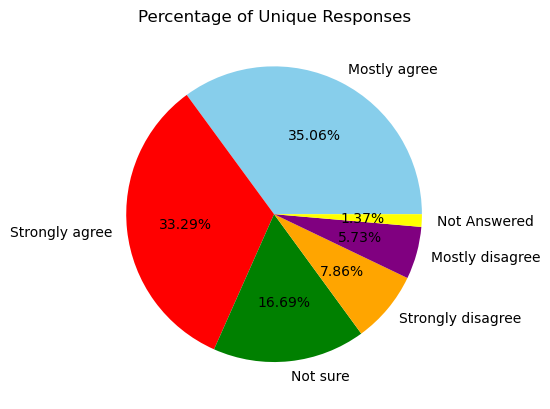

Column Question :  To what extent do you agree or disagree with this priority? - agree.3
Column Responses :  ['Strongly agree' 'Strongly agree' 'Strongly agree' ... 'Not Answered'
 'Mostly disagree' 'Mostly agree']


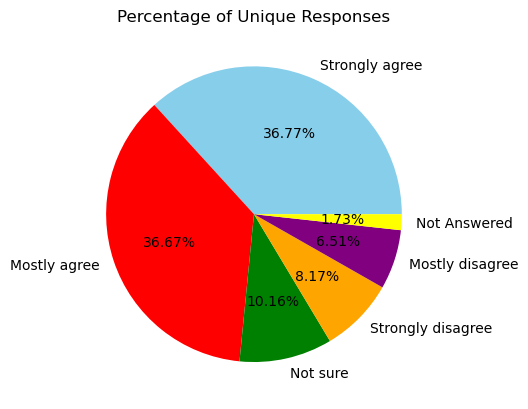

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work to reduce the carbon impact of waste operations by increasing use of alternative fuels for our vehicles and equipment, and making waste transport routes as efficient as possible.
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Null values'
 'Mostly agree' 'Strongly agree']


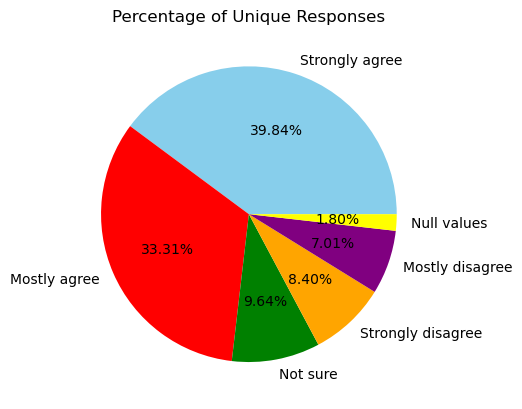

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together to make the network of recycling centres, waste transfer stations and depots as efficient as possible
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Null values'
 'Mostly agree' 'Strongly agree']


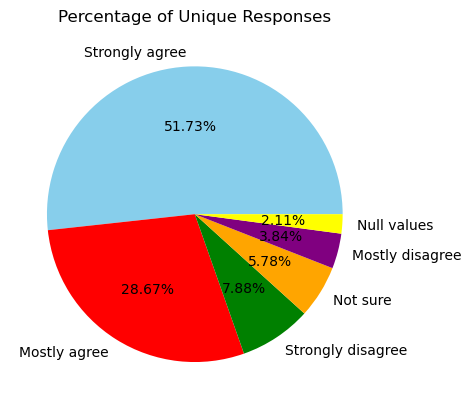

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Explore carbon capture, utilisation and storage, and carbon offsetting to mitigate unavoidable greenhouse gas emissions
Column Responses :  ['Strongly agree' 'Strongly agree' 'Strongly agree' ... 'Null values'
 'Not sure' 'Mostly disagree']


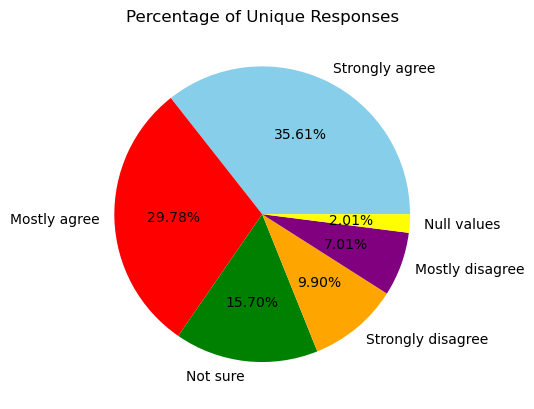

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Stay abreast of innovation, trends and examples of best practice to shape service design
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Null values'
 'Not sure' 'Strongly agree']


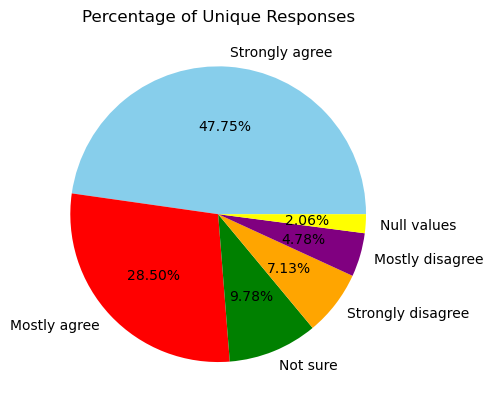

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together and maximise opportunities to increase recycling in public spaces and reduce litter.
Column Responses :  ['Strongly agree' 'Strongly agree' 'Null values' ... 'Null values'
 'Mostly agree' 'Strongly agree']


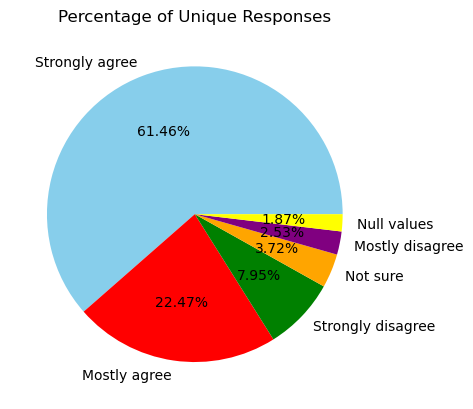

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Be an active voice striving to shape government policy, legislation, and regulation through engagement, consultations, and lobbying
Column Responses :  ['Strongly agree' 'Strongly agree' 'Strongly agree' ... 'Null values'
 'Mostly disagree' 'Strongly agree']


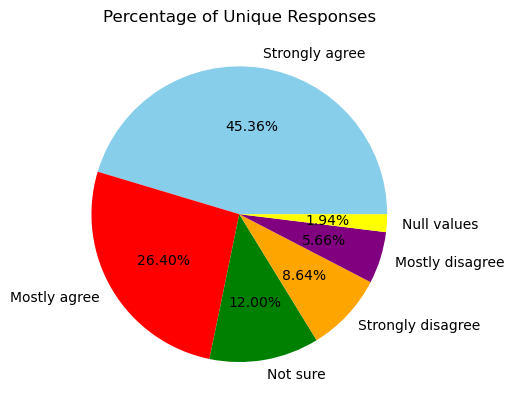

Column Question :  To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together to develop opportunities for employment, environmental benefit, and reduced costs
Column Responses :  ['Strongly agree' 'Mostly agree' 'Strongly agree' ... 'Null values'
 'Mostly agree' 'Strongly agree']


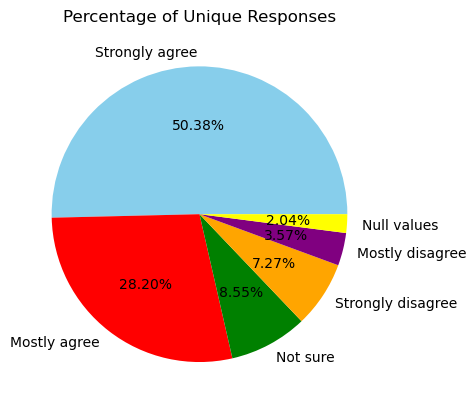

Column Question :  To what extent do you agree or disagree with this priority? - agree.4
Column Responses :  ['Strongly agree' 'Strongly agree' 'Mostly agree' ... 'Not Answered'
 'Mostly agree' 'Strongly agree']


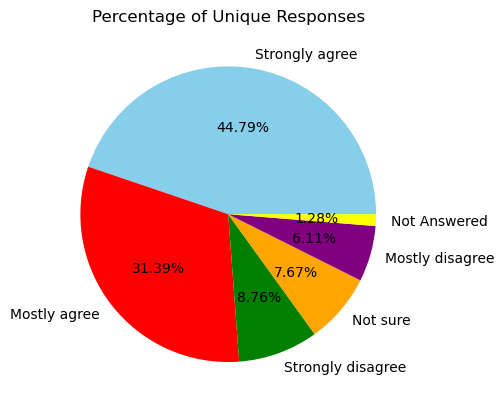

Column Question :  To what extent do you agree or disagree with this approach to research, planning and performance monitoring?   - agree
Column Responses :  ['Mostly agree' 'Mostly agree' 'Mostly agree' ... 'Not Answered'
 'Mostly agree' 'Mostly agree']


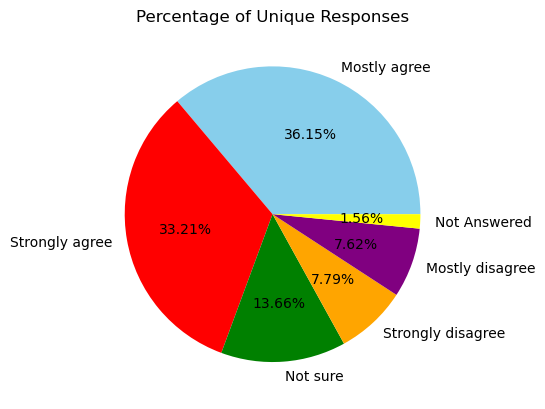

Column Question :  Do you wish to provide any comments on the Environmental Report? - Environmental Report
Column Responses :  ['No' 'No' 'No' ... 'Not Answered' 'No' 'Yes']


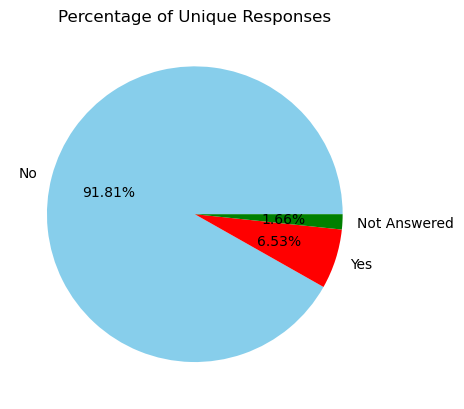

Column Question :  Does the Environmental Report correctly identify the likely significant effects of the draft Strategy? - Strategic Environment Assessment
Column Responses :  ['Not Answered' 'Not Answered' 'Not Answered' ... 'Not Answered'
 'Not Answered' 'No']


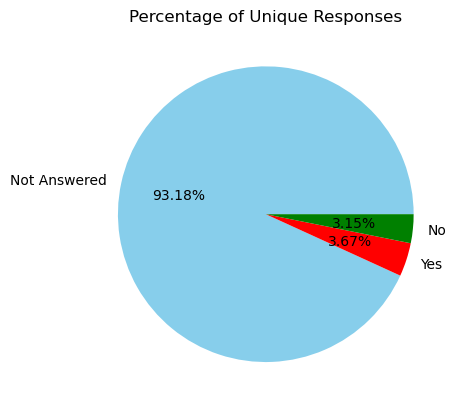

Column Question :  Which Essex district, city or borough do you live in? - District
Column Responses :  ['Braintree' 'Brentwood' 'Chelmsford' ... 'Basildon' 'Braintree'
 'Basildon']


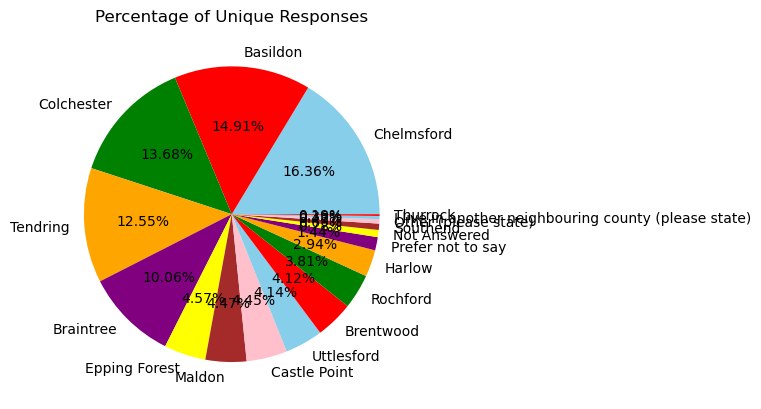

Column Question :  Which age group do you belong to? - Age
Column Responses :  ['55-64' '65+' '35-44' ... '65+' '65+' '55-64']


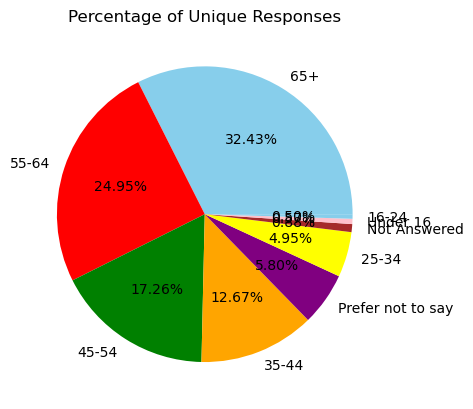

Column Question :  What is your gender? - Gender
Column Responses :  ['Not Answered' 'Male' 'Male' ... 'Male' 'Male' 'Female']


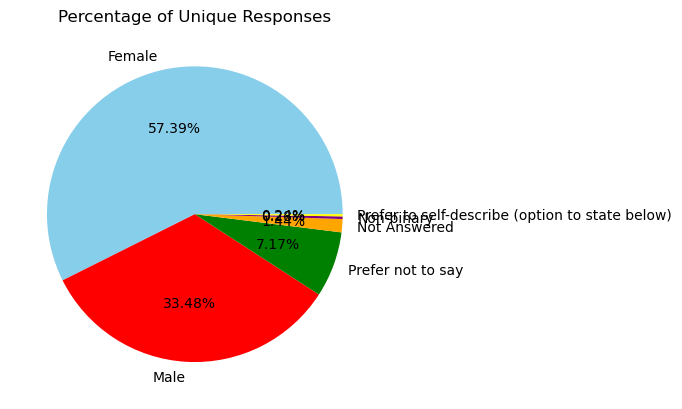

Column Question :  What is your ethnicity? - Ethnicity
Column Responses :  ['White British' 'White British' 'White British' ... 'White British'
 'White British' 'White British']


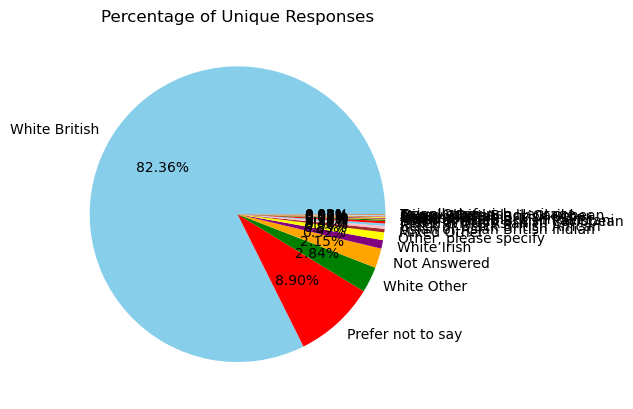

Column Question :  What is your religion/faith? - Religion/Faith
Column Responses :  ['Christian' 'Not sure' 'Christian' ... 'Christian' 'Christian'
 'Prefer not to say']


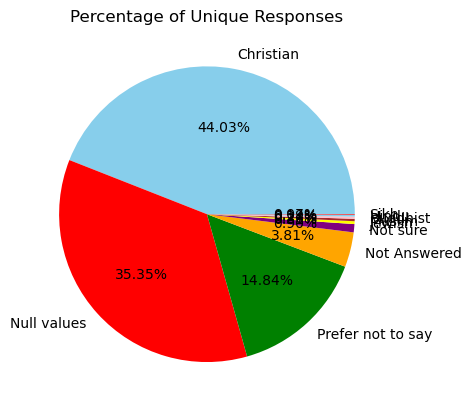

Column Question :  Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - No impairment
Column Responses :  ['No impairment' 'No impairment' 'No impairment' ... 'No impairment'
 'Null values' 'No impairment']


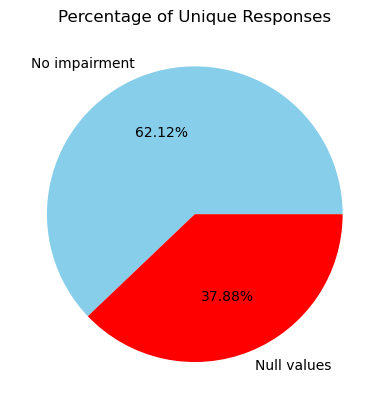

Column Question :  Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Hearing impairment/deaf
Column Responses :  ['Null values' 'Null values' 'Null values' ... 'Null values' 'Null values'
 'Null values']


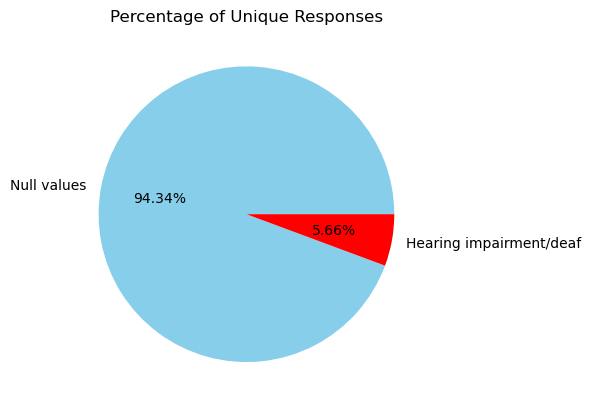

Column Question :  Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Physical impairment
Column Responses :  ['Null values' 'Null values' 'Null values' ... 'Null values'
 'Physical impairment' 'Null values']


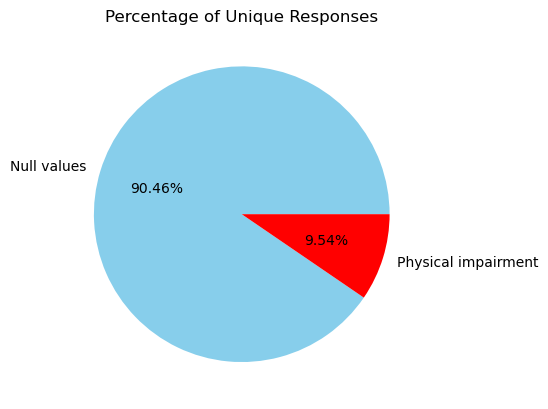

Column Question :  Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Prefer not to say
Column Responses :  ['Null values' 'Null values' 'Null values' ... 'Null values' 'Null values'
 'Null values']


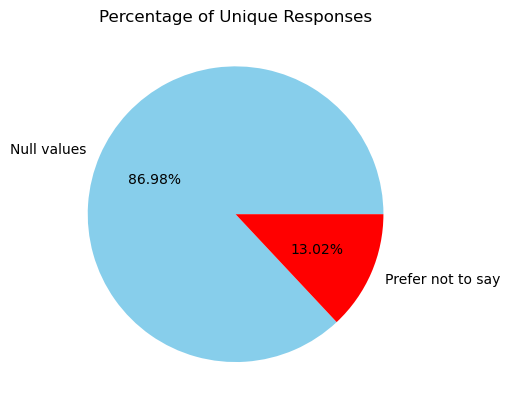

In [14]:
import matplotlib.pyplot as plt

# Iterate over all column names
for column in df:
    
    # Data cleaning without dropping column
    df[column].fillna("Null values", inplace=True)  
    
    # Count the occurrences of each response
    response_counts = df[column].value_counts()
    
    if df[column].nunique() < 30:
        
        columnSeriesObj = df[column]
        print('Column Question : ', column)
        print('Column Responses : ', columnSeriesObj.values)

        # Calculate the percentage of each response
        response_percentages = (response_counts / response_counts.sum()) * 100

        # Plot the pie chart
        fig, ax = plt.subplots()
        ax.pie(response_percentages, labels=response_counts.index, autopct='%.2f%%', colors=['skyblue', 'red', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink'])

        # Add title
        ax.set_title('Percentage of Unique Responses')

        # Display the plot
        plt.show()

[nltk_data] Downloading package punkt to C:\Users\Anurup
[nltk_data]     Salokhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


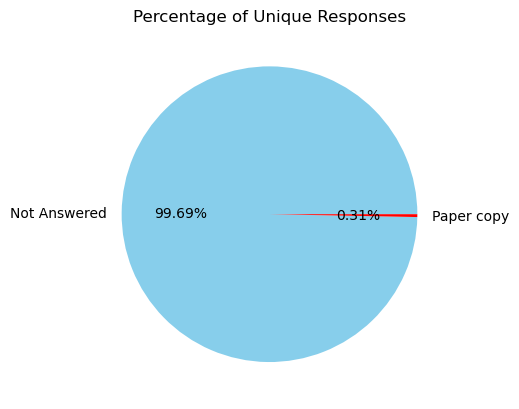

For the question 'Is this consultation being completed over the phone or uploaded as a paper copy? - Phone/paper', the most common response was 'Not Answered' with 99.69% of participants. Other notable responses include 'Paper copy' with 0.31%.


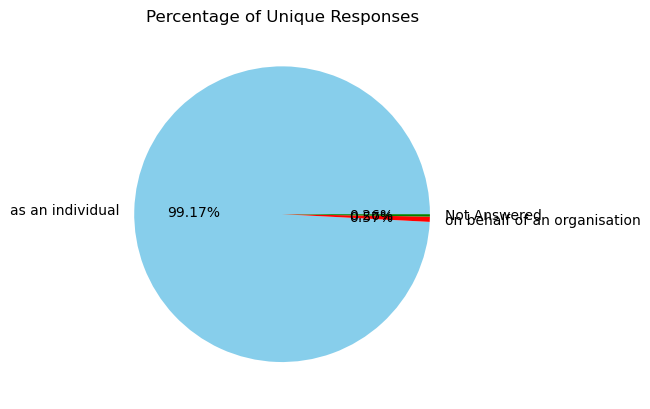

For the question 'Are you completing the consultation... - completing as', the most common response was 'as an individual' with 99.17% of participants. Other notable responses include 'on behalf of an organisation' with 0.57%; 'Not Answered' with 0.26%.


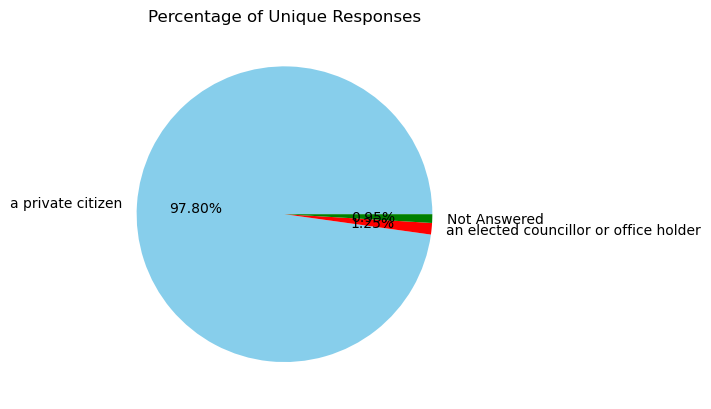

For the question 'If you are responding as an individual, which of the following best describes you:

 - indiv', the most common response was 'a private citizen' with 97.80% of participants. Other notable responses include 'an elected councillor or office holder' with 1.25%; 'Not Answered' with 0.95%.


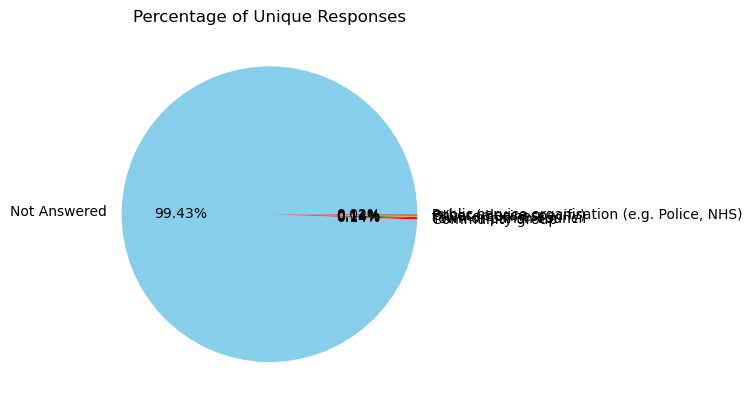

For the question 'If you are responding on behalf of an organisation, please select which organisation type: - responding on behalf', the most common response was 'Not Answered' with 99.43% of participants. Other notable responses include 'Community group' with 0.14%; 'Town or parish council' with 0.14%; 'Private business' with 0.14%; 'Other (please specify)' with 0.12%; 'Public service organisation (e.g. Police, NHS)' with 0.02%.


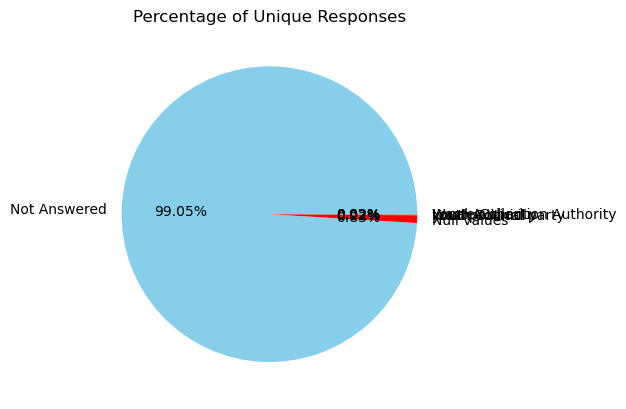

For the question 'If you are responding on behalf of an organisation, please select which organisation type: - Other:', the most common response was 'Not Answered' with 99.05% of participants. Other notable responses include 'Null values' with 0.83%; 'youth counicl' with 0.02%; 'Youth Council' with 0.02%; 'local political party' with 0.02%; 'Local Authority' with 0.02%; 'Waste Collection Authority' with 0.02%.


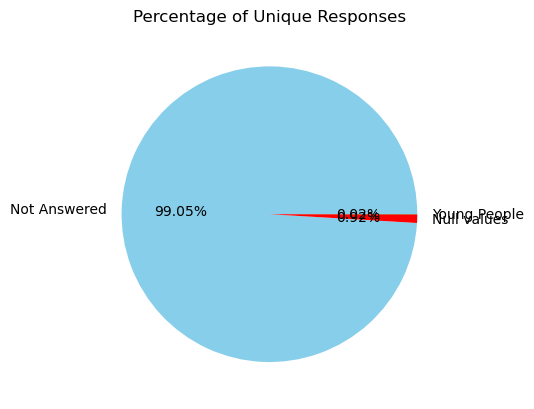

For the question 'If you are responding on behalf of an organisation, please select which organisation type: - Special interest group:', the most common response was 'Not Answered' with 99.05% of participants. Other notable responses include 'Null values' with 0.92%; 'Young People' with 0.02%.


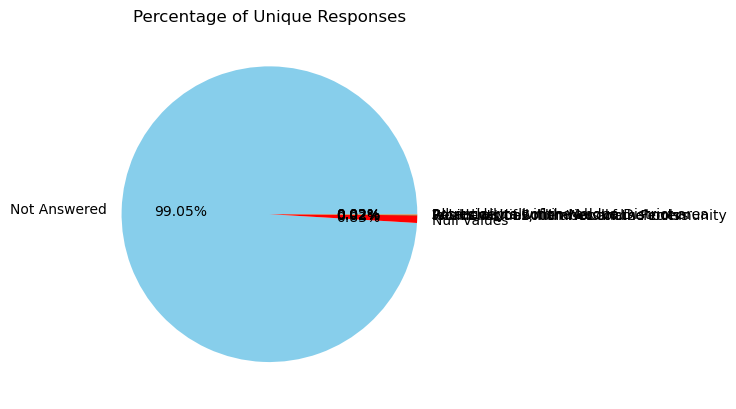

For the question 'Does your organisation primarily work with or represent people from any of these groups? Please tick all that apply. - Other, please specify', the most common response was 'Not Answered' with 99.05% of participants. Other notable responses include 'Null values' with 0.83%; 'local charities, libraries and schools' with 0.02%; 'Residents of South Woodham Ferrers' with 0.02%; 'Works with all members of the community' with 0.02%; 'Potentially all of the above' with 0.02%; 'All residents within Maldon District area' with 0.02%.


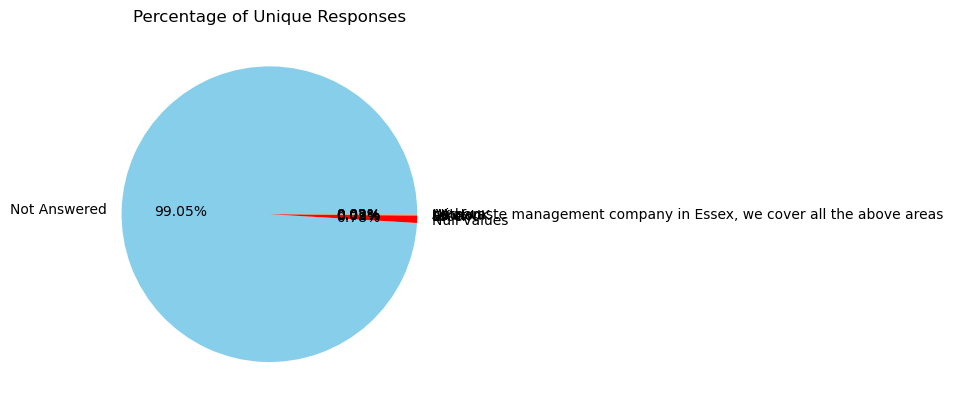

For the question 'Which district(s), borough(s) or city does your organisation cover? Please tick all that apply - Other, Please state', the most common response was 'Not Answered' with 99.05% of participants. Other notable responses include 'Null values' with 0.78%; 'Essex' with 0.05%; 'all of UK' with 0.02%; 'London' with 0.02%; 'UK' with 0.02%; 'Witham' with 0.02%; 'As a waste management company in Essex, we cover all the above areas' with 0.02%.


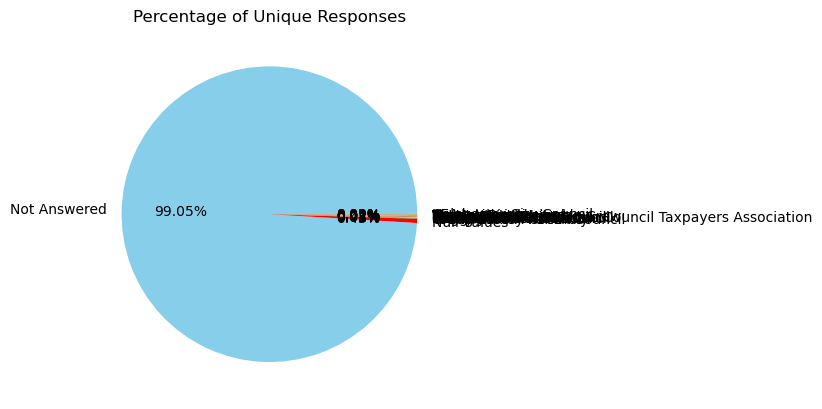

For the question 'What is the name of your organisation? - name', the most common response was 'Not Answered' with 99.05% of participants. Other notable responses include 'Null values' with 0.45%; 'Young Essex Assembly' with 0.05%; 'Great Oakley Parish Council' with 0.02%; 'Coggeshall Parish Council' with 0.02%; 'Indaver' with 0.02%; 'Feering Parish Council' with 0.02%; 'Maldon District Council' with 0.02%; 'Braintree District Council' with 0.02%; 'Witham Town Council' with 0.02%; 'South Woodham Ferrers Council Taxpayers Association' with 0.02%; 'Hempstead Parish Council' with 0.02%; 'The Epping Society' with 0.02%; 'Castle Point Clean Up Crew' with 0.02%; 'Echologika Ltd' with 0.02%; 'The Bell Inn' with 0.02%; 'MotorAid Ltd' with 0.02%; 'The Ink Bin Limited' with 0.02%; 'young essex asembley' with 0.02%; 'Youth service' with 0.02%; 'YEA' with 0.02%; 'Colchester City Council' with 0.02%.


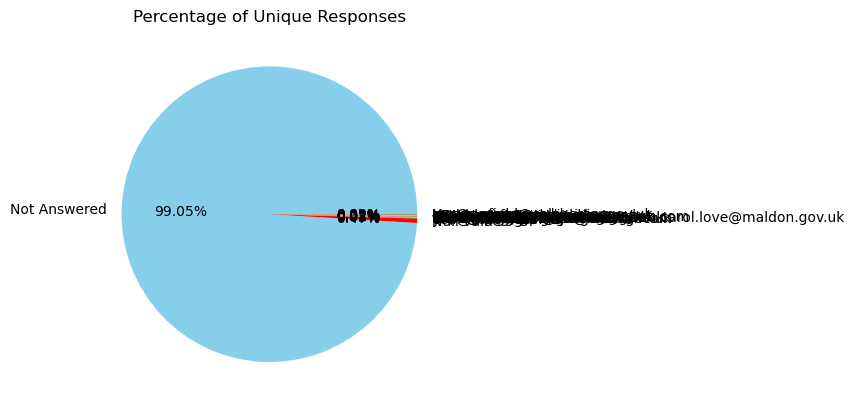

For the question 'Please provide an email address for your organisation:  - email address', the most common response was 'Not Answered' with 99.05% of participants. Other notable responses include 'Null values' with 0.47%; 'yea@essex.gov.uk' with 0.05%; 'diana.hpcouncil@gmail.com' with 0.02%; 'clerk@coggeshall-pc.gov.uk' with 0.02%; 'funmi.adefioye-giwa@indaver.com' with 0.02%; 'clerk@feeringparishcouncil.gov.uk' with 0.02%; 'Princes Road, Maldon CM9 5DL   carol.love@maldon.gov.uk' with 0.02%; 'samir.pandya@braintree.gov.uk' with 0.02%; 'deputytownclerk@witham.gov.uk' with 0.02%; 'membership@swfcta.org' with 0.02%; 'secretary@eppingsociety.org.uk' with 0.02%; 'gtoakleypc@aol.com' with 0.02%; 'Castlepointcleanupcrew@yahoo.com' with 0.02%; 'info@echologika.com' with 0.02%; 'bell-castle@hotmail.co.uk' with 0.02%; 'simon.croft@motoraid.com' with 0.02%; 'becky.baines@theinkbin.co.uk' with 0.02%; 'YEA@essex.gov.uk' with 0.02%; 'Yea@essex.gov.uk' with 0.02%; 'rosa.tanfield@colchester.gov.uk' 

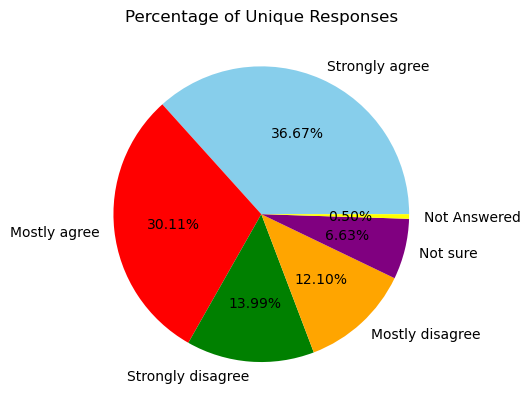

For the question 'To what extent do you agree or disagree with this vision statement for the Waste Strategy for Essex? - vision', the most common response was 'Strongly agree' with 36.67% of participants. Other notable responses include 'Mostly agree' with 30.11%; 'Strongly disagree' with 13.99%; 'Mostly disagree' with 12.10%; 'Not sure' with 6.63%; 'Not Answered' with 0.50%.


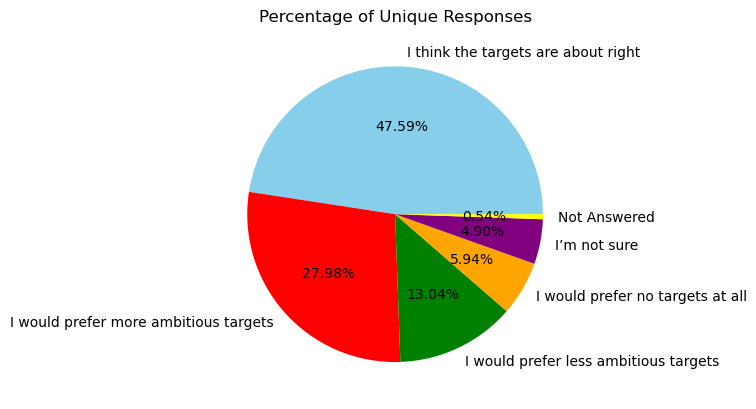

For the question 'Which of the following statements best describes your thoughts on the targets in the draft strategy?  - targets', the most common response was 'I think the targets are about right' with 47.59% of participants. Other notable responses include 'I would prefer more ambitious targets' with 27.98%; 'I would prefer less ambitious targets' with 13.04%; 'I would prefer no targets at all' with 5.94%; 'I’m not sure' with 4.90%; 'Not Answered' with 0.54%.


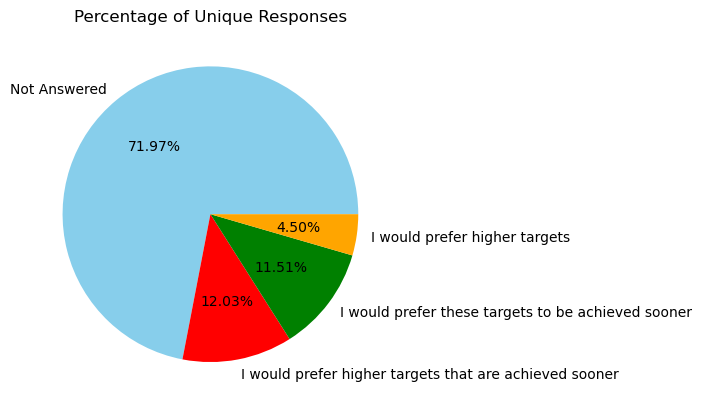

For the question 'Which of the following best describes your view?
 - higher', the most common response was 'Not Answered' with 71.97% of participants. Other notable responses include 'I would prefer higher targets that are achieved sooner' with 12.03%; 'I would prefer these targets to be achieved sooner' with 11.51%; 'I would prefer higher targets' with 4.50%.


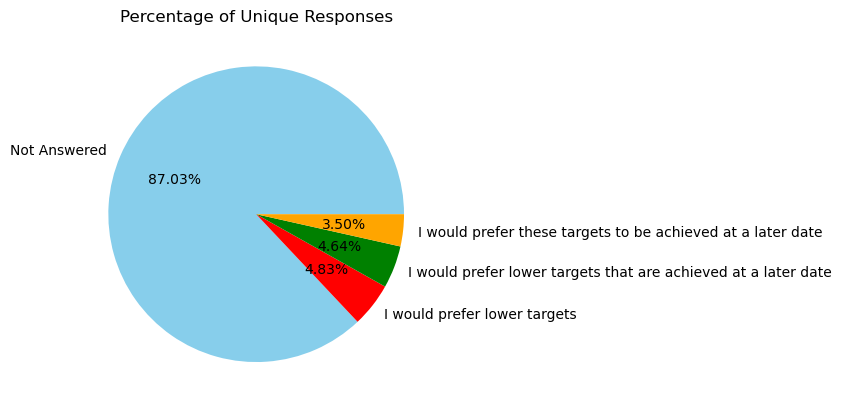

For the question 'Which of the following best describes your view? - less ambitious', the most common response was 'Not Answered' with 87.03% of participants. Other notable responses include 'I would prefer lower targets' with 4.83%; 'I would prefer lower targets that are achieved at a later date' with 4.64%; 'I would prefer these targets to be achieved at a later date' with 3.50%.


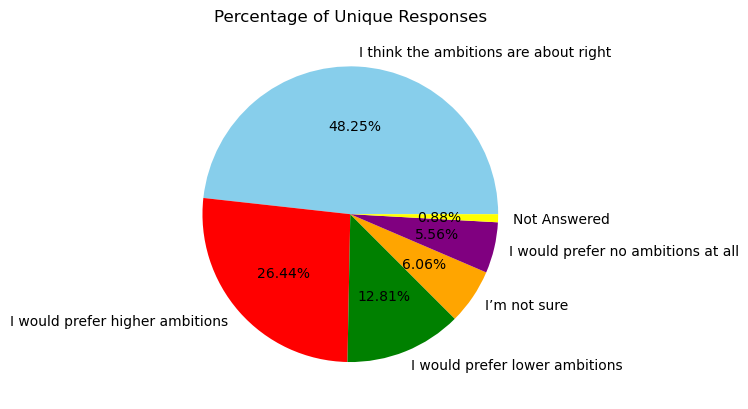

For the question 'Which of the following statements best describes your thoughts on the ambitions in the draft strategy? - ambitions', the most common response was 'I think the ambitions are about right' with 48.25% of participants. Other notable responses include 'I would prefer higher ambitions' with 26.44%; 'I would prefer lower ambitions' with 12.81%; 'I’m not sure' with 6.06%; 'I would prefer no ambitions at all' with 5.56%; 'Not Answered' with 0.88%.


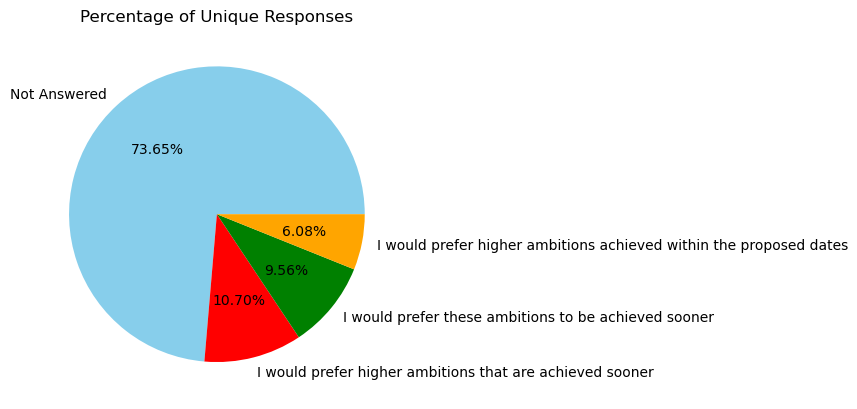

For the question 'Which of the following best describes your view? - Ambitions', the most common response was 'Not Answered' with 73.65% of participants. Other notable responses include 'I would prefer higher ambitions that are achieved sooner' with 10.70%; 'I would prefer these ambitions to be achieved sooner' with 9.56%; 'I would prefer higher ambitions achieved within the proposed dates' with 6.08%.


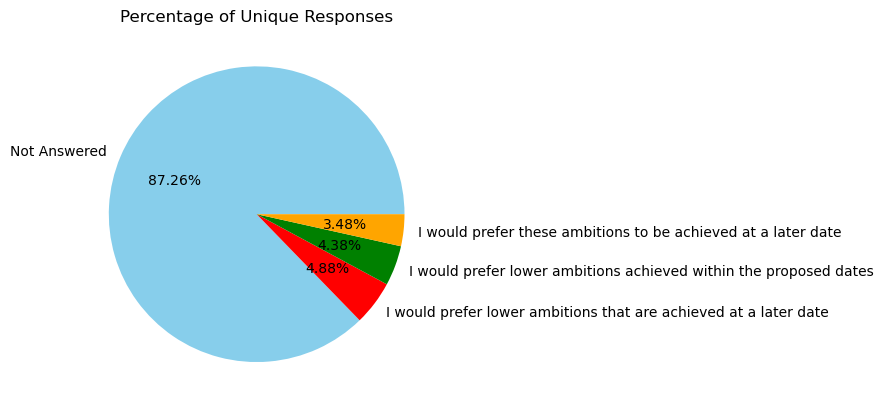

For the question 'Which of the following best describes your view? - Ambitions.1', the most common response was 'Not Answered' with 87.26% of participants. Other notable responses include 'I would prefer lower ambitions that are achieved at a later date' with 4.88%; 'I would prefer lower ambitions achieved within the proposed dates' with 4.38%; 'I would prefer these ambitions to be achieved at a later date' with 3.48%.


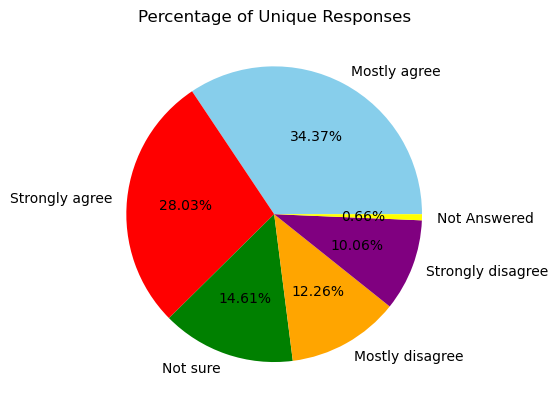

For the question 'To what extent do you agree or disagree with this priority? - priority', the most common response was 'Mostly agree' with 34.38% of participants. Other notable responses include 'Strongly agree' with 28.03%; 'Not sure' with 14.61%; 'Mostly disagree' with 12.26%; 'Strongly disagree' with 10.06%; 'Not Answered' with 0.66%.


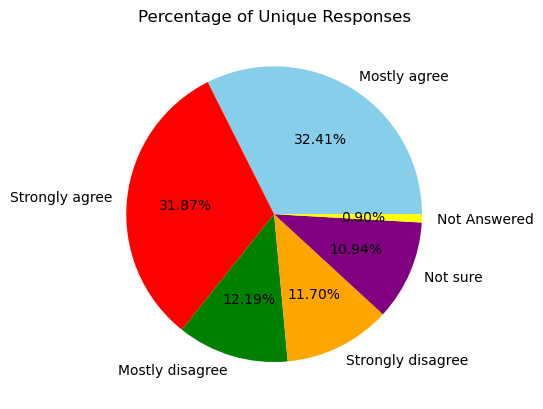

For the question 'To what extent do you agree or disagree with this priority? - agree', the most common response was 'Mostly agree' with 32.41% of participants. Other notable responses include 'Strongly agree' with 31.87%; 'Mostly disagree' with 12.19%; 'Strongly disagree' with 11.70%; 'Not sure' with 10.94%; 'Not Answered' with 0.90%.


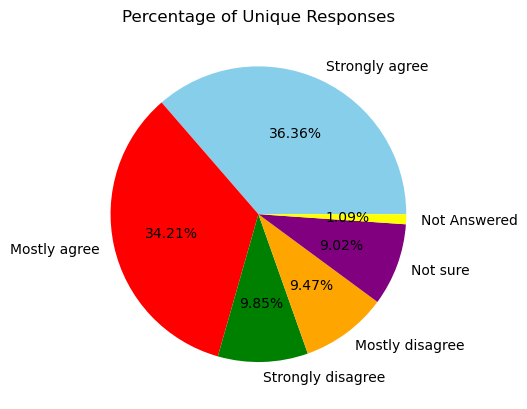

For the question 'To what extent do you agree or disagree with this priority? - agree.1', the most common response was 'Strongly agree' with 36.36% of participants. Other notable responses include 'Mostly agree' with 34.21%; 'Strongly disagree' with 9.85%; 'Mostly disagree' with 9.47%; 'Not sure' with 9.02%; 'Not Answered' with 1.09%.


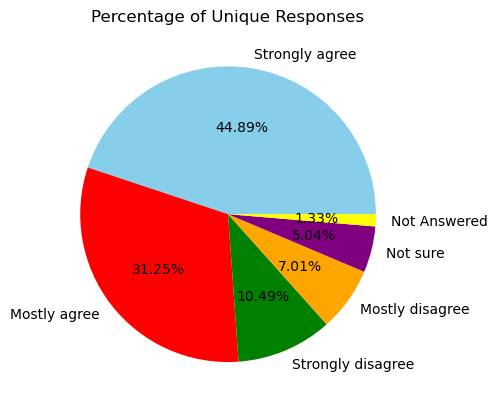

For the question 'To what extent do you agree or disagree with this priority? - agree.2', the most common response was 'Strongly agree' with 44.89% of participants. Other notable responses include 'Mostly agree' with 31.25%; 'Strongly disagree' with 10.49%; 'Mostly disagree' with 7.01%; 'Not sure' with 5.04%; 'Not Answered' with 1.33%.


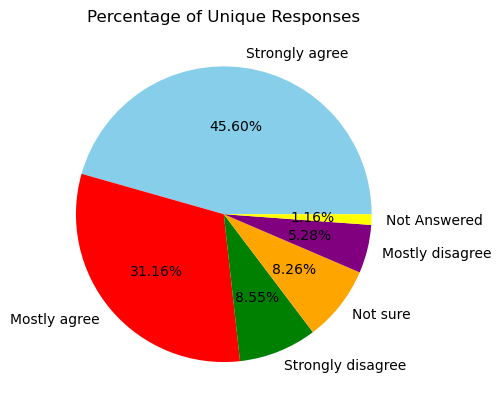

For the question 'To what extent do you agree or disagree that the EWP should reduce the use of landfill? - landfill', the most common response was 'Strongly agree' with 45.60% of participants. Other notable responses include 'Mostly agree' with 31.16%; 'Strongly disagree' with 8.55%; 'Not sure' with 8.26%; 'Mostly disagree' with 5.28%; 'Not Answered' with 1.16%.


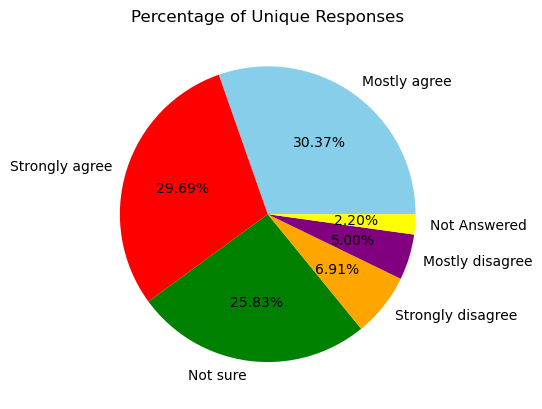

For the question 'To what extent do you agree or disagree that adopting the use of anaerobic digestion for the treatment of food waste is the right solution? - anaerobic digestion', the most common response was 'Mostly agree' with 30.37% of participants. Other notable responses include 'Strongly agree' with 29.69%; 'Not sure' with 25.83%; 'Strongly disagree' with 6.91%; 'Mostly disagree' with 5.00%; 'Not Answered' with 2.20%.


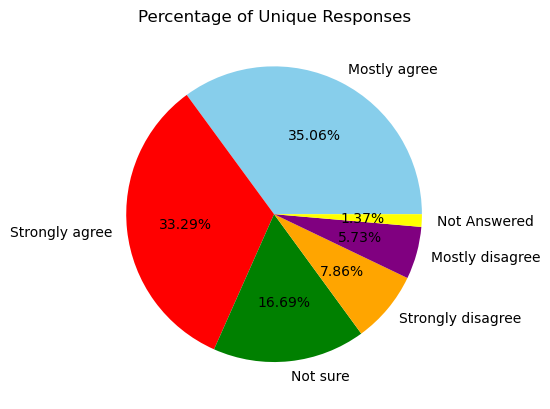

For the question 'To what extent do you agree or disagree that, after recycling everything we can, adopting Energy from Waste (EfW) for residual waste is the right solution? - EFW', the most common response was 'Mostly agree' with 35.06% of participants. Other notable responses include 'Strongly agree' with 33.29%; 'Not sure' with 16.69%; 'Strongly disagree' with 7.86%; 'Mostly disagree' with 5.73%; 'Not Answered' with 1.37%.


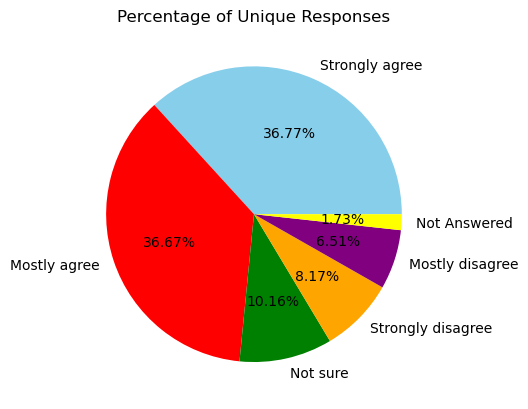

For the question 'To what extent do you agree or disagree with this priority? - agree.3', the most common response was 'Strongly agree' with 36.77% of participants. Other notable responses include 'Mostly agree' with 36.67%; 'Not sure' with 10.16%; 'Strongly disagree' with 8.17%; 'Mostly disagree' with 6.51%; 'Not Answered' with 1.73%.


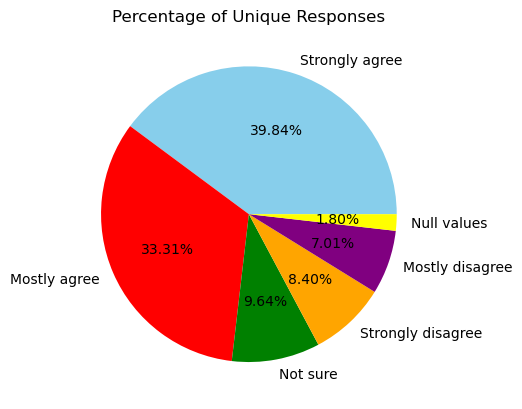

For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work to reduce the carbon impact of waste operations by increasing use of alternative fuels for our vehicles and equipment, and making waste transport routes as efficient as possible.', the most common response was 'Strongly agree' with 39.84% of participants. Other notable responses include 'Mostly agree' with 33.31%; 'Not sure' with 9.64%; 'Strongly disagree' with 8.40%; 'Mostly disagree' with 7.01%; 'Null values' with 1.80%.


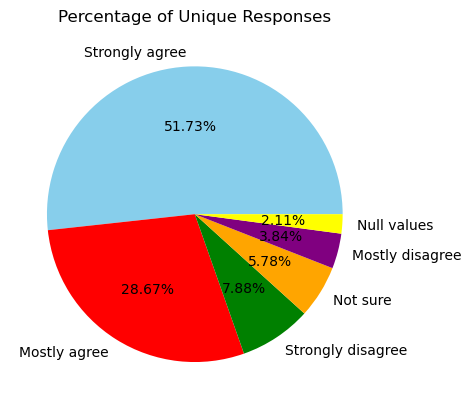

For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together to make the network of recycling centres, waste transfer stations and depots as efficient as possible', the most common response was 'Strongly agree' with 51.73% of participants. Other notable responses include 'Mostly agree' with 28.67%; 'Strongly disagree' with 7.88%; 'Not sure' with 5.78%; 'Mostly disagree' with 3.84%; 'Null values' with 2.11%.


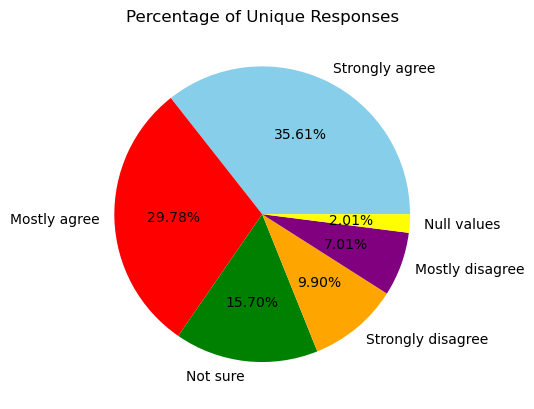

For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Explore carbon capture, utilisation and storage, and carbon offsetting to mitigate unavoidable greenhouse gas emissions', the most common response was 'Strongly agree' with 35.61% of participants. Other notable responses include 'Mostly agree' with 29.78%; 'Not sure' with 15.70%; 'Strongly disagree' with 9.90%; 'Mostly disagree' with 7.01%; 'Null values' with 2.01%.


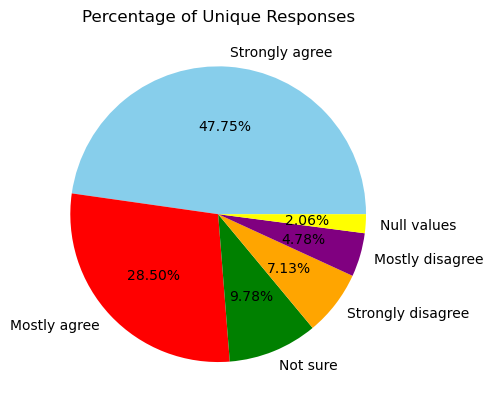

For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Stay abreast of innovation, trends and examples of best practice to shape service design', the most common response was 'Strongly agree' with 47.75% of participants. Other notable responses include 'Mostly agree' with 28.50%; 'Not sure' with 9.78%; 'Strongly disagree' with 7.13%; 'Mostly disagree' with 4.78%; 'Null values' with 2.06%.


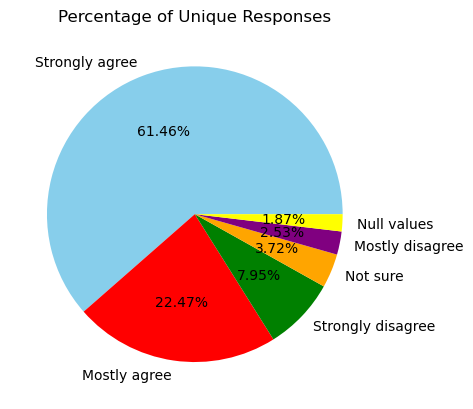

For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together and maximise opportunities to increase recycling in public spaces and reduce litter.', the most common response was 'Strongly agree' with 61.46% of participants. Other notable responses include 'Mostly agree' with 22.47%; 'Strongly disagree' with 7.95%; 'Not sure' with 3.72%; 'Mostly disagree' with 2.53%; 'Null values' with 1.87%.


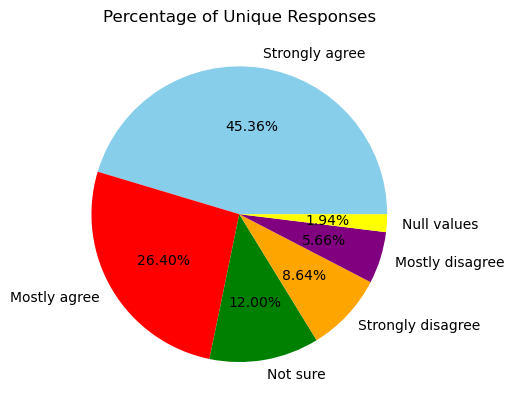

For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Be an active voice striving to shape government policy, legislation, and regulation through engagement, consultations, and lobbying', the most common response was 'Strongly agree' with 45.36% of participants. Other notable responses include 'Mostly agree' with 26.40%; 'Not sure' with 12.00%; 'Strongly disagree' with 8.64%; 'Mostly disagree' with 5.66%; 'Null values' with 1.94%.


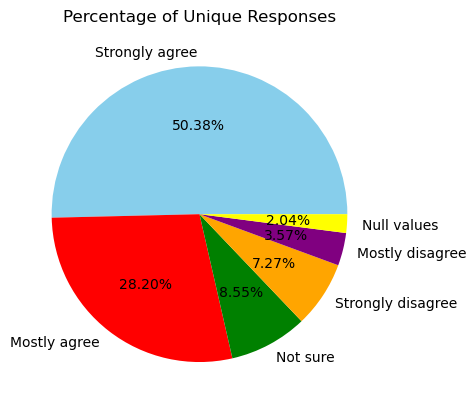

For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together to develop opportunities for employment, environmental benefit, and reduced costs', the most common response was 'Strongly agree' with 50.38% of participants. Other notable responses include 'Mostly agree' with 28.20%; 'Not sure' with 8.55%; 'Strongly disagree' with 7.27%; 'Mostly disagree' with 3.57%; 'Null values' with 2.04%.


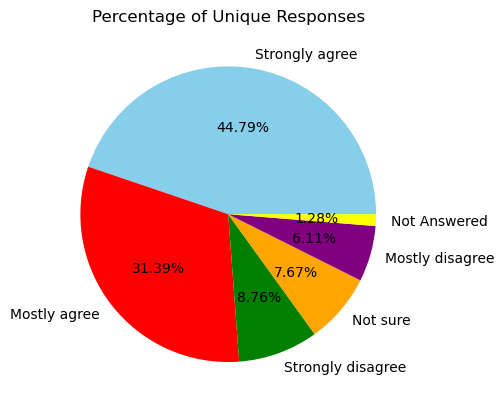

For the question 'To what extent do you agree or disagree with this priority? - agree.4', the most common response was 'Strongly agree' with 44.79% of participants. Other notable responses include 'Mostly agree' with 31.39%; 'Strongly disagree' with 8.76%; 'Not sure' with 7.67%; 'Mostly disagree' with 6.11%; 'Not Answered' with 1.28%.


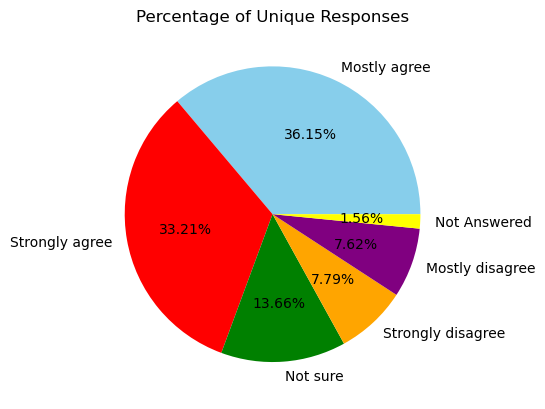

For the question 'To what extent do you agree or disagree with this approach to research, planning and performance monitoring?   - agree', the most common response was 'Mostly agree' with 36.15% of participants. Other notable responses include 'Strongly agree' with 33.21%; 'Not sure' with 13.66%; 'Strongly disagree' with 7.79%; 'Mostly disagree' with 7.62%; 'Not Answered' with 1.56%.


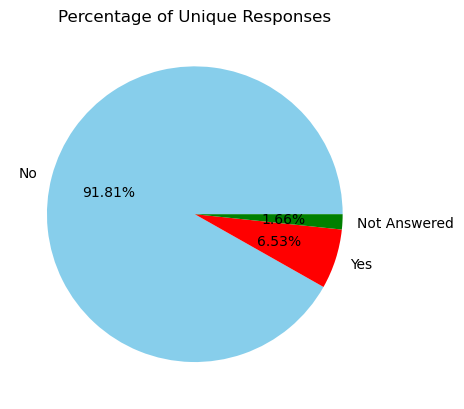

For the question 'Do you wish to provide any comments on the Environmental Report? - Environmental Report', the most common response was 'No' with 91.81% of participants. Other notable responses include 'Yes' with 6.53%; 'Not Answered' with 1.66%.


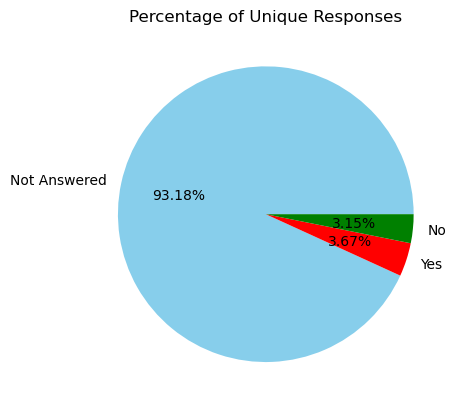

For the question 'Does the Environmental Report correctly identify the likely significant effects of the draft Strategy? - Strategic Environment Assessment', the most common response was 'Not Answered' with 93.18% of participants. Other notable responses include 'Yes' with 3.67%; 'No' with 3.15%.


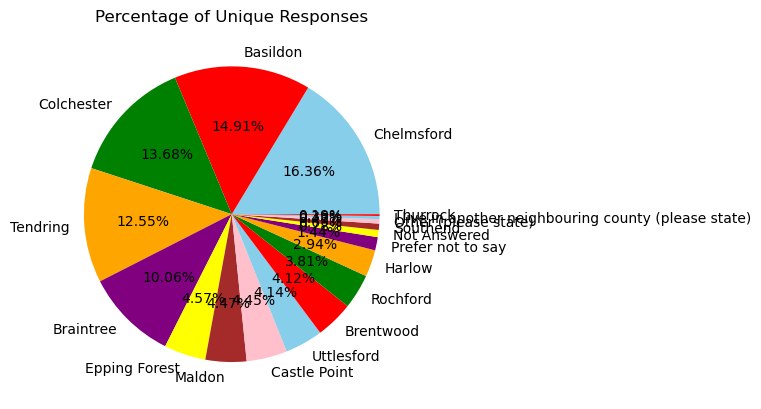

For the question 'Which Essex district, city or borough do you live in? - District', the most common response was 'Chelmsford' with 16.36% of participants. Other notable responses include 'Basildon' with 14.91%; 'Colchester' with 13.68%; 'Tendring' with 12.55%; 'Braintree' with 10.06%; 'Epping Forest' with 4.57%; 'Maldon' with 4.47%; 'Castle Point' with 4.45%; 'Uttlesford' with 4.14%; 'Brentwood' with 4.12%; 'Rochford' with 3.81%; 'Harlow' with 2.94%; 'Prefer not to say' with 1.44%; 'Not Answered' with 0.78%; 'Southend' with 0.69%; 'Other (please state)' with 0.47%; 'I live in another neighbouring county (please state)' with 0.36%; 'Thurrock' with 0.19%.


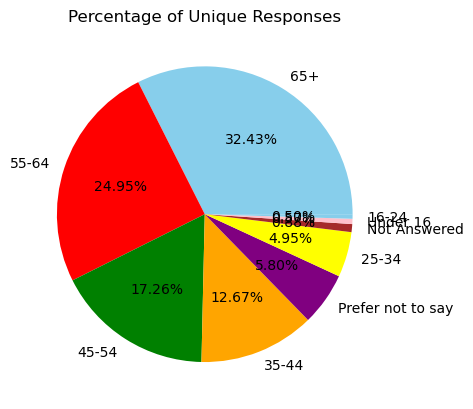

For the question 'Which age group do you belong to? - Age', the most common response was '65+' with 32.43% of participants. Other notable responses include '55-64' with 24.95%; '45-54' with 17.26%; '35-44' with 12.67%; 'Prefer not to say' with 5.80%; '25-34' with 4.95%; 'Not Answered' with 0.88%; 'Under 16' with 0.57%; '16-24' with 0.50%.


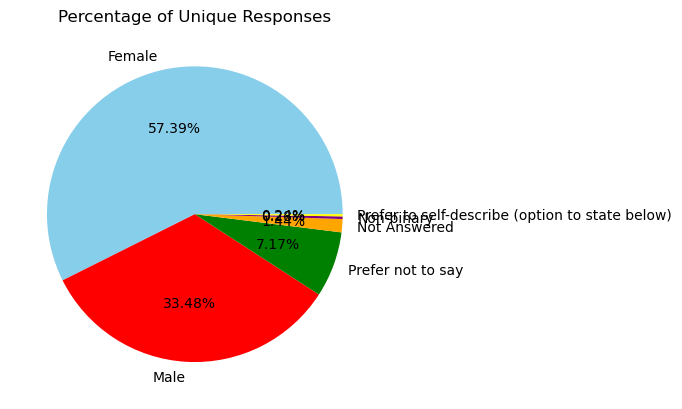

For the question 'What is your gender? - Gender', the most common response was 'Female' with 57.39% of participants. Other notable responses include 'Male' with 33.48%; 'Prefer not to say' with 7.17%; 'Not Answered' with 1.44%; 'Non-binary' with 0.28%; 'Prefer to self-describe (option to state below)' with 0.24%.


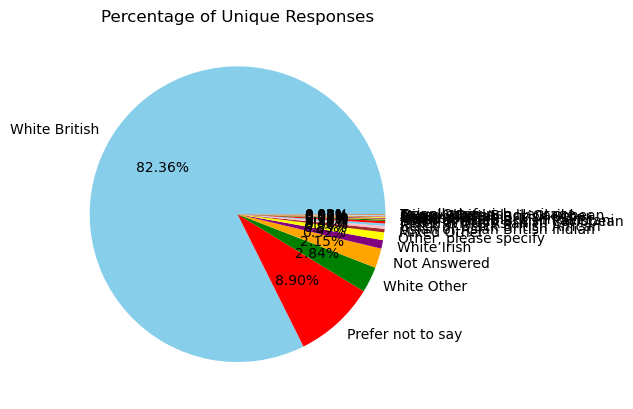

For the question 'What is your ethnicity? - Ethnicity', the most common response was 'White British' with 82.36% of participants. Other notable responses include 'Prefer not to say' with 8.90%; 'White Other' with 2.84%; 'Not Answered' with 2.15%; 'White Irish' with 0.92%; 'Other, please specify' with 0.85%; 'Mixed Other' with 0.38%; 'Asian or Asian British Indian' with 0.31%; 'Black or Black British African' with 0.28%; 'Mixed White/Asian' with 0.26%; 'Black or Black British Caribbean' with 0.14%; 'Asian or Asian British Pakistani' with 0.09%; 'Mixed White/Black African' with 0.09%; 'Chinese' with 0.09%; 'Not Known' with 0.07%; 'Asian or Asian British Other' with 0.07%; 'Gypsy / Roma' with 0.07%; 'Mixed White/Black Caribbean' with 0.05%; 'Traveller of Irish Heritage' with 0.02%; 'Asian Other' with 0.02%.


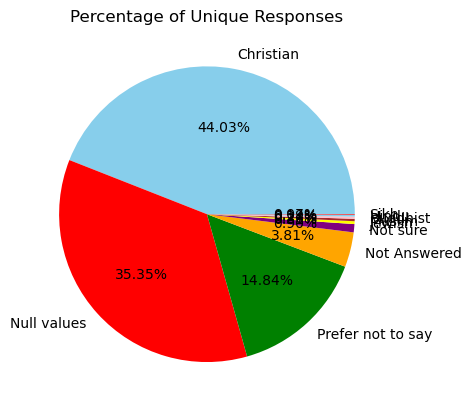

For the question 'What is your religion/faith? - Religion/Faith', the most common response was 'Christian' with 44.03% of participants. Other notable responses include 'Null values' with 35.35%; 'Prefer not to say' with 14.84%; 'Not Answered' with 3.81%; 'Not sure' with 0.90%; 'Jewish' with 0.31%; 'Muslim' with 0.26%; 'Buddhist' with 0.24%; 'Hindu' with 0.19%; 'Sikh' with 0.07%.


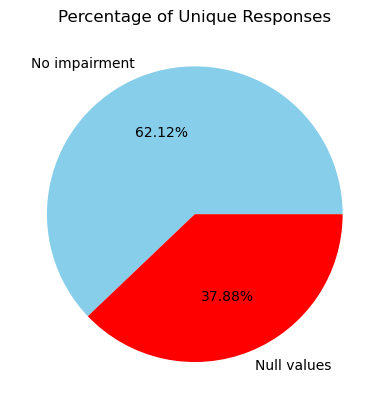

For the question 'Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - No impairment', the most common response was 'No impairment' with 62.12% of participants. Other notable responses include 'Null values' with 37.88%.


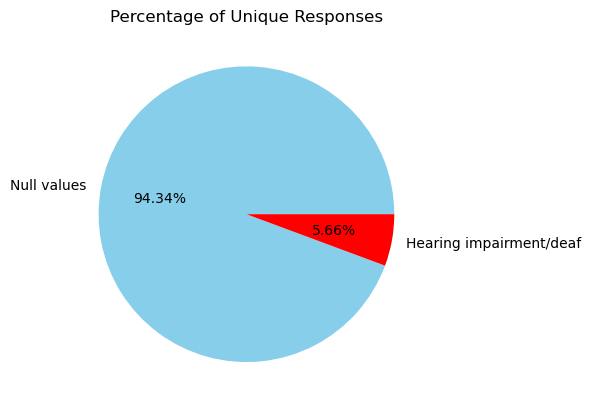

For the question 'Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Hearing impairment/deaf', the most common response was 'Null values' with 94.34% of participants. Other notable responses include 'Hearing impairment/deaf' with 5.66%.


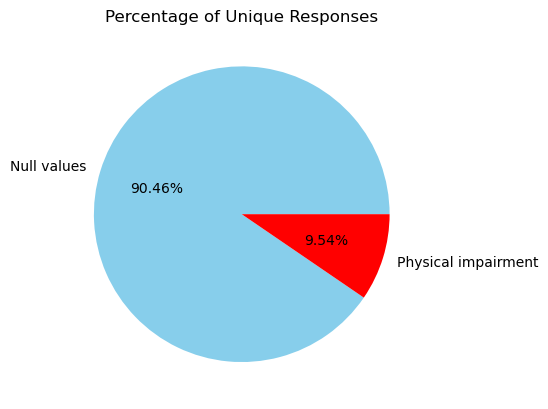

For the question 'Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Physical impairment', the most common response was 'Null values' with 90.46% of participants. Other notable responses include 'Physical impairment' with 9.54%.


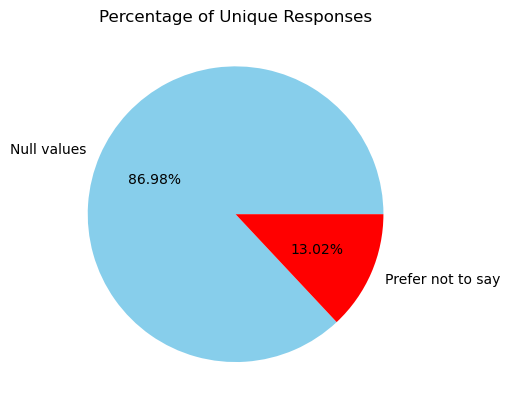

For the question 'Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Prefer not to say', the most common response was 'Null values' with 86.98% of participants. Other notable responses include 'Prefer not to say' with 13.02%.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter

# Assuming nltk is already downloaded
nltk.download('punkt')

# Iterate over all column names
for column in df.columns:
    
    # Data cleaning without dropping column
    df[column].fillna("Null values", inplace=True)  
    
    # Count the occurrences of each response
    response_counts = df[column].value_counts()
    
    if df[column].nunique() < 30:
        
        # Calculate the percentage of each response
        response_percentages = (response_counts / response_counts.sum()) * 100

        # Plot the pie chart
        fig, ax = plt.subplots()
        ax.pie(response_percentages, labels=response_counts.index, autopct='%.2f%%', 
               colors=['skyblue', 'red', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink'])

        # Add title
        ax.set_title(f'Percentage of Unique Responses')

        # Display the plot
        plt.show()

        # Generate summary
        top_response = response_counts.idxmax()
        top_response_percentage = response_percentages.max()
        summary = f"For the question '{column}', the most common response was '{top_response}' with {top_response_percentage:.2f}% of participants. "

        other_responses = response_percentages.drop(labels=top_response)
        other_responses_summary = []
        for response, percentage in other_responses.items():
            other_responses_summary.append(f"'{response}' with {percentage:.2f}%")
        other_responses_text = "; ".join(other_responses_summary)

        if other_responses_text:
            summary += f"Other notable responses include {other_responses_text}."

        # Print the summary
        print(summary)


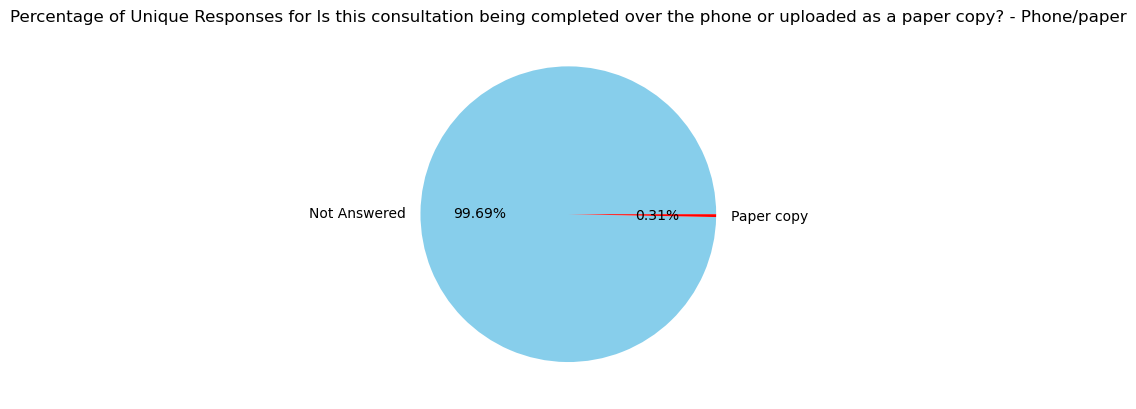

* Regarding the question 'Is this consultation being completed over the phone or uploaded as a paper copy? - Phone/paper', 'Not Answered' was the most common response, accounting for 99.69% of participants.
* Additionally, notable responses were 'Paper copy' with 0.31%.


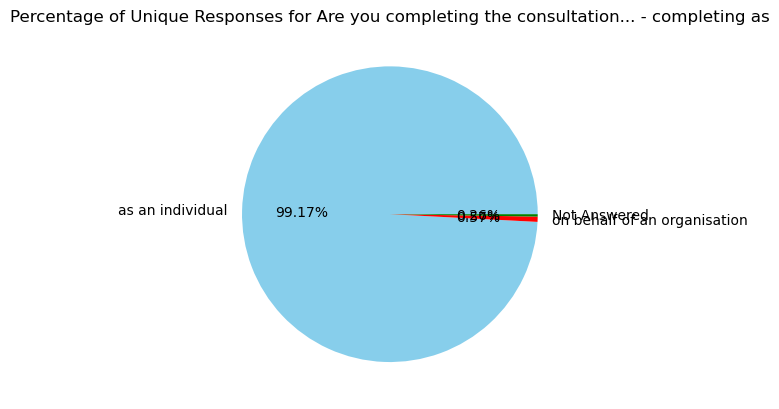

* The question 'Are you completing the consultation... - completing as' saw 'as an individual' as the top response, representing 99.17% of the answers.
* Other significant responses include 'on behalf of an organisation' with 0.57%; 'Not Answered' with 0.26%.


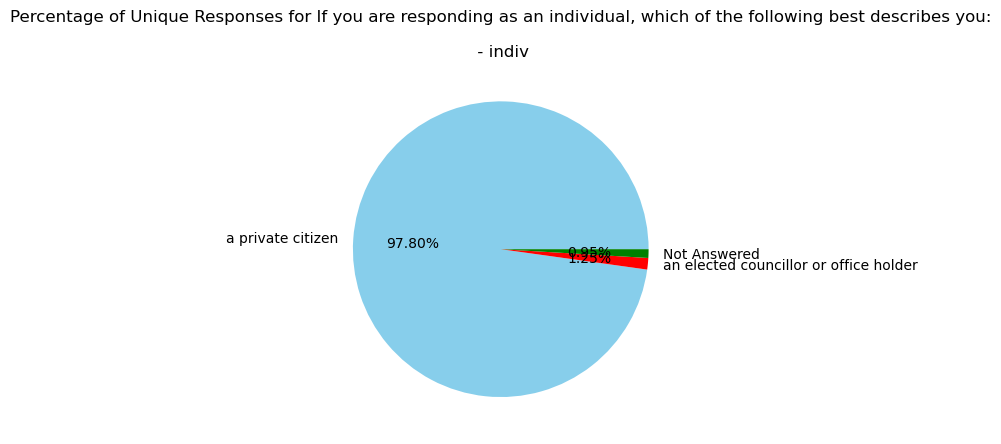

* The question 'If you are responding as an individual, which of the following best describes you:

 - indiv' saw 'a private citizen' as the top response, representing 97.80% of the answers.
* Other responses worth mentioning are 'an elected councillor or office holder' with 1.25%; 'Not Answered' with 0.95%.


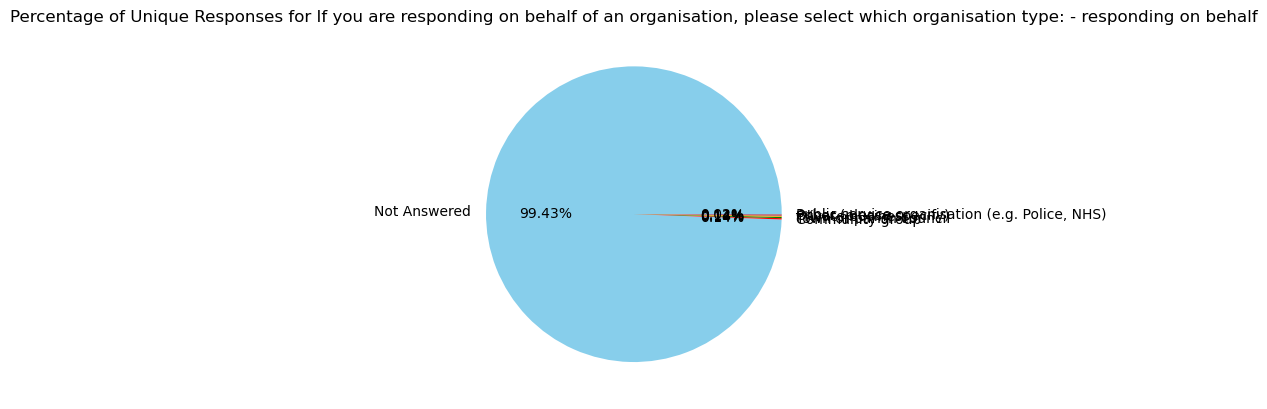

* Regarding the question 'If you are responding on behalf of an organisation, please select which organisation type: - responding on behalf', 'Not Answered' was the most common response, accounting for 99.43% of participants.
* Other responses worth mentioning are 'Community group' with 0.14%; 'Town or parish council' with 0.14%; 'Private business' with 0.14%; 'Other (please specify)' with 0.12%; 'Public service organisation (e.g. Police, NHS)' with 0.02%.


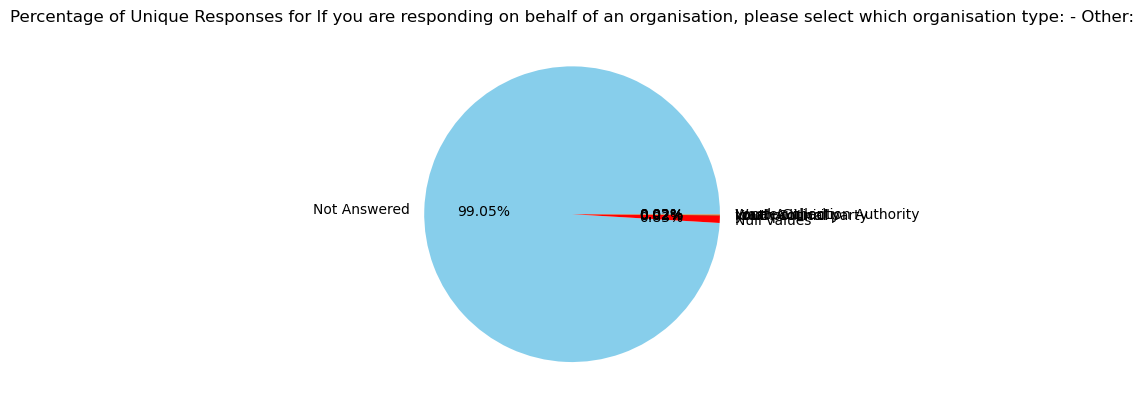

* For the question 'If you are responding on behalf of an organisation, please select which organisation type: - Other:', the most frequent response was 'Not Answered', making up 99.05% of the total responses.
* Further, we observed these responses: 'Null values' with 0.83%; 'youth counicl' with 0.02%; 'Youth Council' with 0.02%; 'local political party' with 0.02%; 'Local Authority' with 0.02%; 'Waste Collection Authority' with 0.02%.


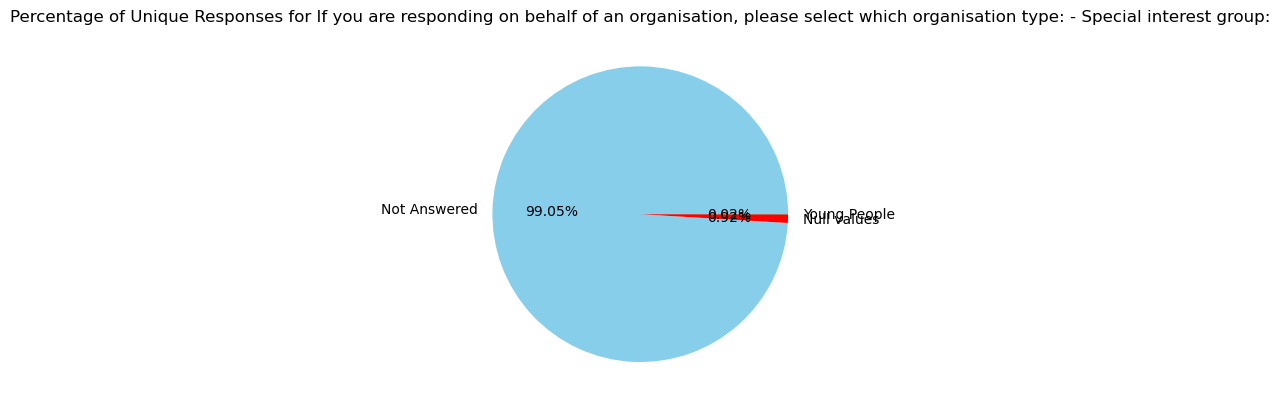

* The question 'If you are responding on behalf of an organisation, please select which organisation type: - Special interest group:' saw 'Not Answered' as the top response, representing 99.05% of the answers.
* Other significant responses include 'Null values' with 0.92%; 'Young People' with 0.02%.


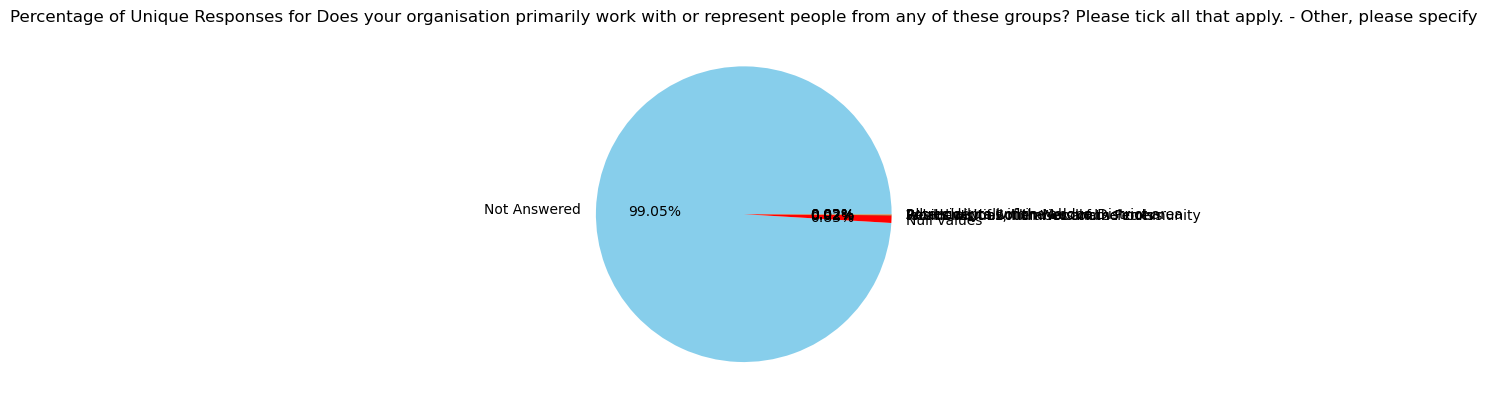

* Regarding the question 'Does your organisation primarily work with or represent people from any of these groups? Please tick all that apply. - Other, please specify', 'Not Answered' was the most common response, accounting for 99.05% of participants.
* Additionally, notable responses were 'Null values' with 0.83%; 'local charities, libraries and schools' with 0.02%; 'Residents of South Woodham Ferrers' with 0.02%; 'Works with all members of the community' with 0.02%; 'Potentially all of the above' with 0.02%; 'All residents within Maldon District area' with 0.02%.


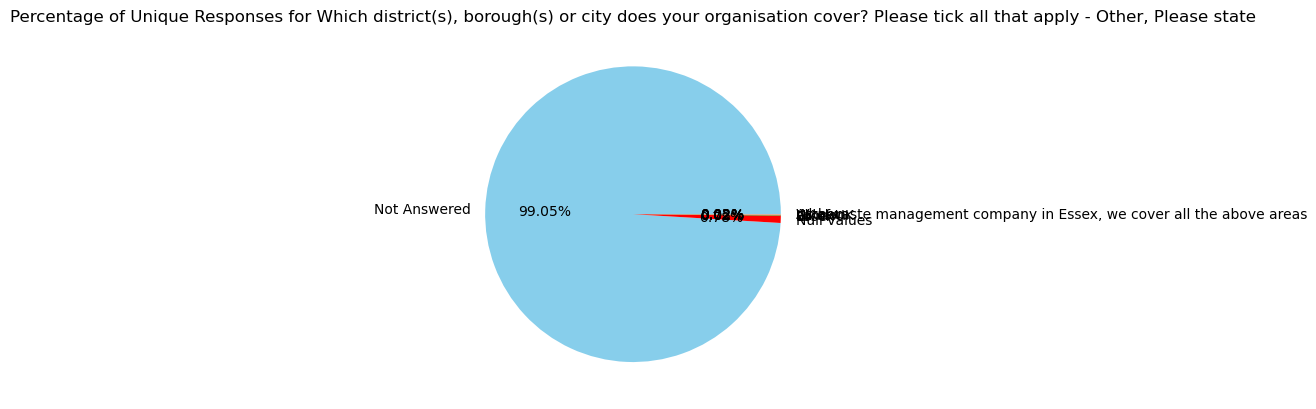

* For the question 'Which district(s), borough(s) or city does your organisation cover? Please tick all that apply - Other, Please state', the most frequent response was 'Not Answered', making up 99.05% of the total responses.
* Additionally, notable responses were 'Null values' with 0.78%; 'Essex' with 0.05%; 'all of UK' with 0.02%; 'London' with 0.02%; 'UK' with 0.02%; 'Witham' with 0.02%; 'As a waste management company in Essex, we cover all the above areas' with 0.02%.


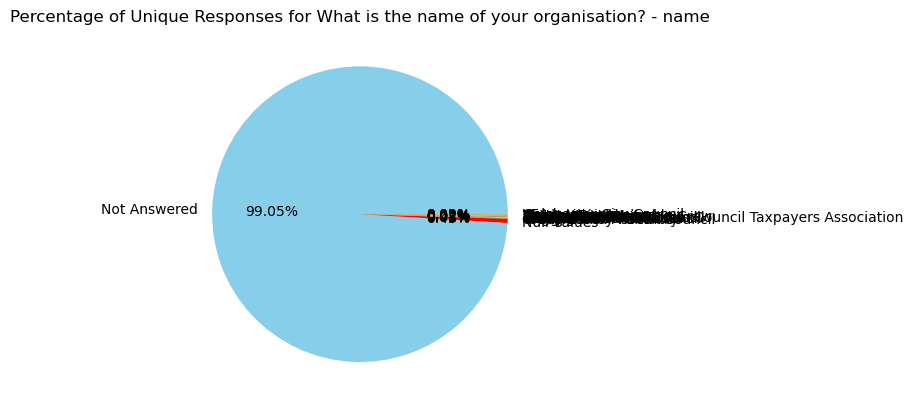

* Regarding the question 'What is the name of your organisation? - name', 'Not Answered' was the most common response, accounting for 99.05% of participants.
* Other responses worth mentioning are 'Null values' with 0.45%; 'Young Essex Assembly' with 0.05%; 'Great Oakley Parish Council' with 0.02%; 'Coggeshall Parish Council' with 0.02%; 'Indaver' with 0.02%; 'Feering Parish Council' with 0.02%; 'Maldon District Council' with 0.02%; 'Braintree District Council' with 0.02%; 'Witham Town Council' with 0.02%; 'South Woodham Ferrers Council Taxpayers Association' with 0.02%; 'Hempstead Parish Council' with 0.02%; 'The Epping Society' with 0.02%; 'Castle Point Clean Up Crew' with 0.02%; 'Echologika Ltd' with 0.02%; 'The Bell Inn' with 0.02%; 'MotorAid Ltd' with 0.02%; 'The Ink Bin Limited' with 0.02%; 'young essex asembley' with 0.02%; 'Youth service' with 0.02%; 'YEA' with 0.02%; 'Colchester City Council' with 0.02%.


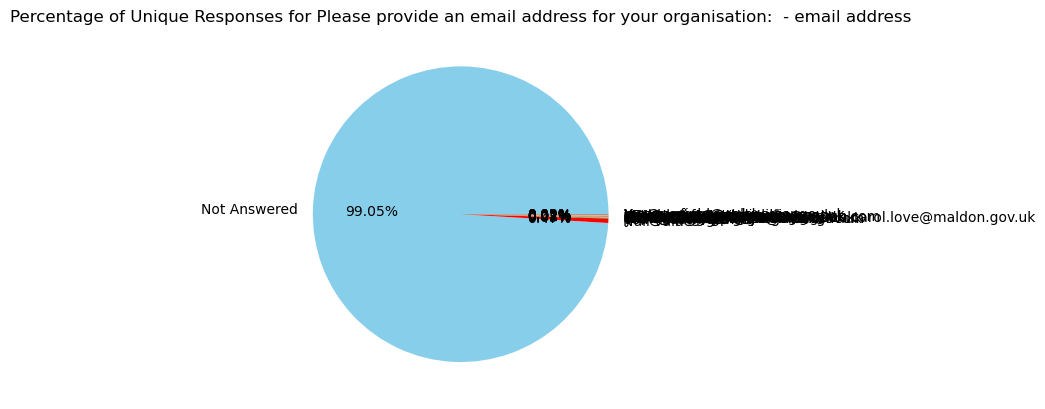

* Regarding the question 'Please provide an email address for your organisation:  - email address', 'Not Answered' was the most common response, accounting for 99.05% of participants.
* Additionally, notable responses were 'Null values' with 0.47%; 'yea@essex.gov.uk' with 0.05%; 'diana.hpcouncil@gmail.com' with 0.02%; 'clerk@coggeshall-pc.gov.uk' with 0.02%; 'funmi.adefioye-giwa@indaver.com' with 0.02%; 'clerk@feeringparishcouncil.gov.uk' with 0.02%; 'Princes Road, Maldon CM9 5DL   carol.love@maldon.gov.uk' with 0.02%; 'samir.pandya@braintree.gov.uk' with 0.02%; 'deputytownclerk@witham.gov.uk' with 0.02%; 'membership@swfcta.org' with 0.02%; 'secretary@eppingsociety.org.uk' with 0.02%; 'gtoakleypc@aol.com' with 0.02%; 'Castlepointcleanupcrew@yahoo.com' with 0.02%; 'info@echologika.com' with 0.02%; 'bell-castle@hotmail.co.uk' with 0.02%; 'simon.croft@motoraid.com' with 0.02%; 'becky.baines@theinkbin.co.uk' with 0.02%; 'YEA@essex.gov.uk' with 0.02%; 'Yea@essex.gov.uk' with 0.02%; 'rosa.ta

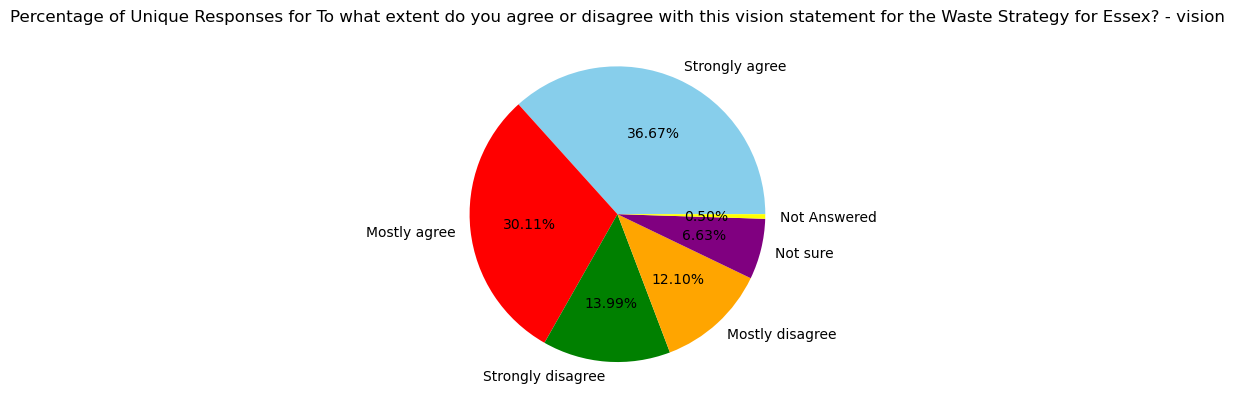

* Regarding the question 'To what extent do you agree or disagree with this vision statement for the Waste Strategy for Essex? - vision', 'Strongly agree' was the most common response, accounting for 36.67% of participants.
* Other significant responses include 'Mostly agree' with 30.11%; 'Strongly disagree' with 13.99%; 'Mostly disagree' with 12.10%; 'Not sure' with 6.63%; 'Not Answered' with 0.50%.


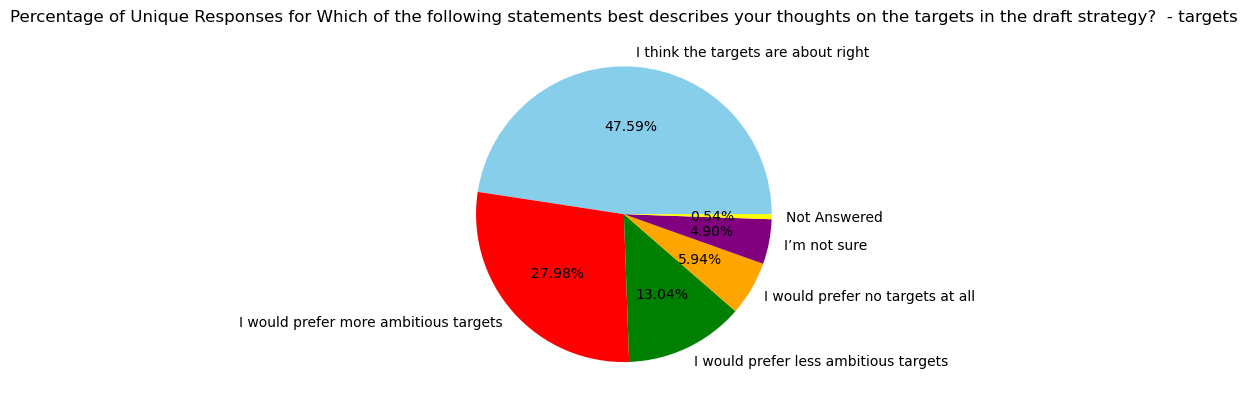

* Regarding the question 'Which of the following statements best describes your thoughts on the targets in the draft strategy?  - targets', 'I think the targets are about right' was the most common response, accounting for 47.59% of participants.
* Other responses worth mentioning are 'I would prefer more ambitious targets' with 27.98%; 'I would prefer less ambitious targets' with 13.04%; 'I would prefer no targets at all' with 5.94%; 'I’m not sure' with 4.90%; 'Not Answered' with 0.54%.


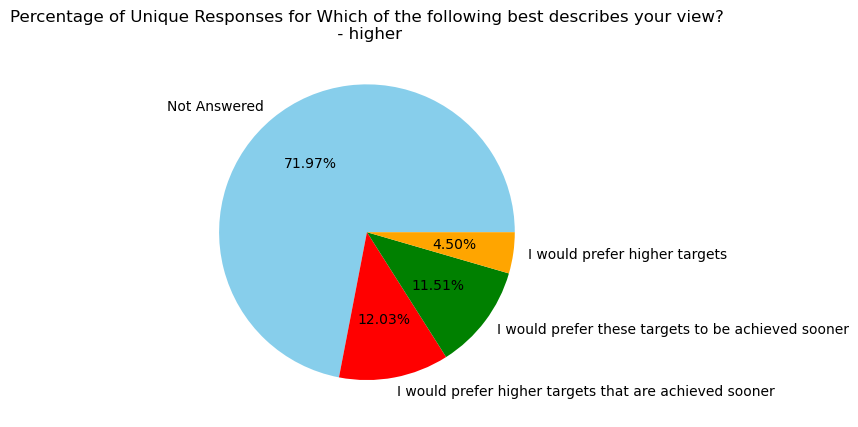

* Regarding the question 'Which of the following best describes your view?
 - higher', 'Not Answered' was the most common response, accounting for 71.97% of participants.
* Additionally, notable responses were 'I would prefer higher targets that are achieved sooner' with 12.03%; 'I would prefer these targets to be achieved sooner' with 11.51%; 'I would prefer higher targets' with 4.50%.


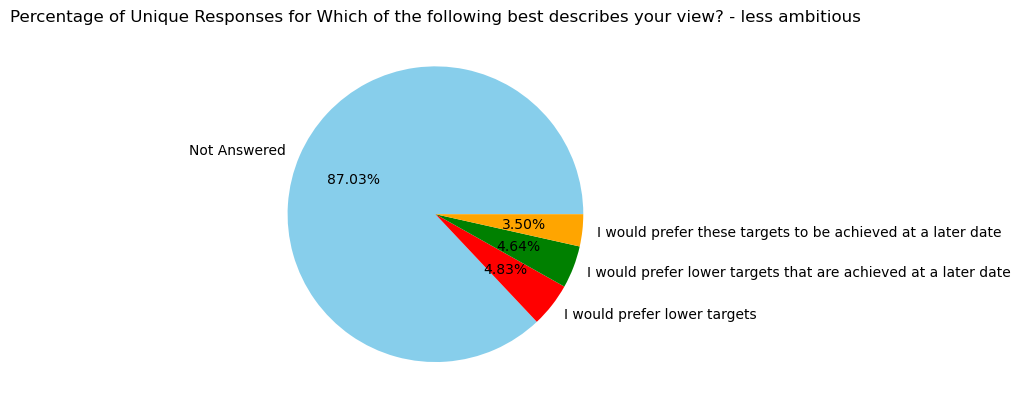

* Regarding the question 'Which of the following best describes your view? - less ambitious', 'Not Answered' was the most common response, accounting for 87.03% of participants.
* Additionally, notable responses were 'I would prefer lower targets' with 4.83%; 'I would prefer lower targets that are achieved at a later date' with 4.64%; 'I would prefer these targets to be achieved at a later date' with 3.50%.


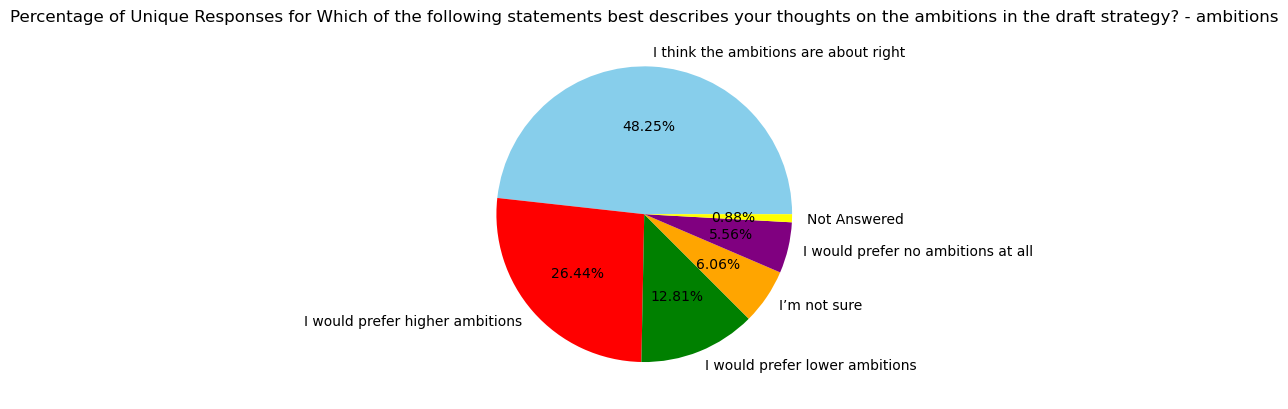

* The question 'Which of the following statements best describes your thoughts on the ambitions in the draft strategy? - ambitions' saw 'I think the ambitions are about right' as the top response, representing 48.25% of the answers.
* Further, we observed these responses: 'I would prefer higher ambitions' with 26.44%; 'I would prefer lower ambitions' with 12.81%; 'I’m not sure' with 6.06%; 'I would prefer no ambitions at all' with 5.56%; 'Not Answered' with 0.88%.


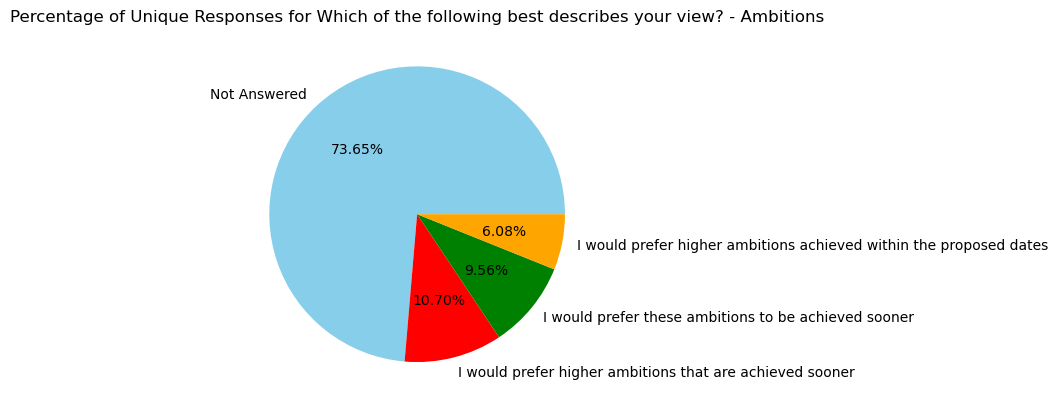

* For the question 'Which of the following best describes your view? - Ambitions', the most frequent response was 'Not Answered', making up 73.65% of the total responses.
* Additionally, notable responses were 'I would prefer higher ambitions that are achieved sooner' with 10.70%; 'I would prefer these ambitions to be achieved sooner' with 9.56%; 'I would prefer higher ambitions achieved within the proposed dates' with 6.08%.


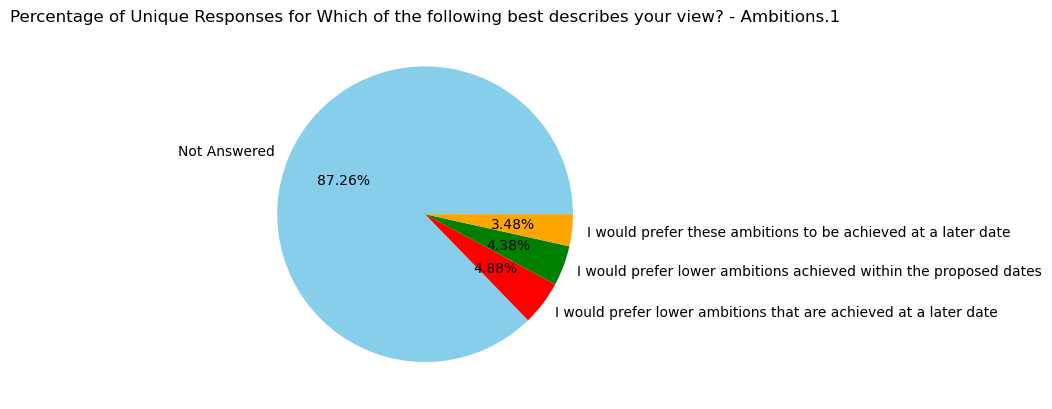

* For the question 'Which of the following best describes your view? - Ambitions.1', the most frequent response was 'Not Answered', making up 87.26% of the total responses.
* Other responses worth mentioning are 'I would prefer lower ambitions that are achieved at a later date' with 4.88%; 'I would prefer lower ambitions achieved within the proposed dates' with 4.38%; 'I would prefer these ambitions to be achieved at a later date' with 3.48%.


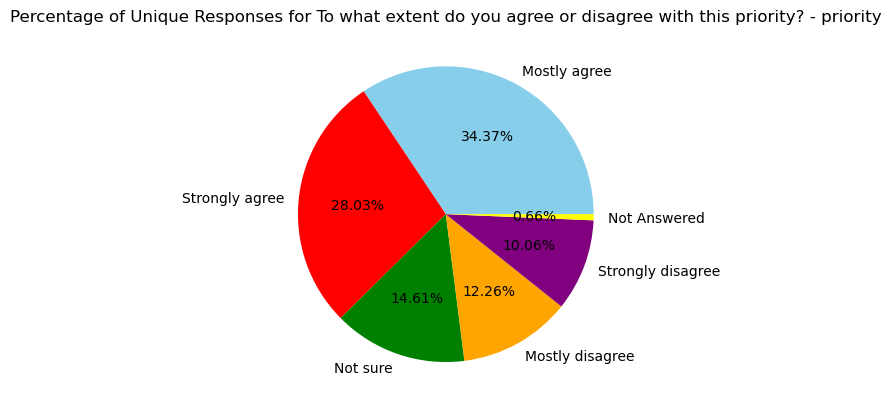

* Regarding the question 'To what extent do you agree or disagree with this priority? - priority', 'Mostly agree' was the most common response, accounting for 34.38% of participants.
* Other responses worth mentioning are 'Strongly agree' with 28.03%; 'Not sure' with 14.61%; 'Mostly disagree' with 12.26%; 'Strongly disagree' with 10.06%; 'Not Answered' with 0.66%.


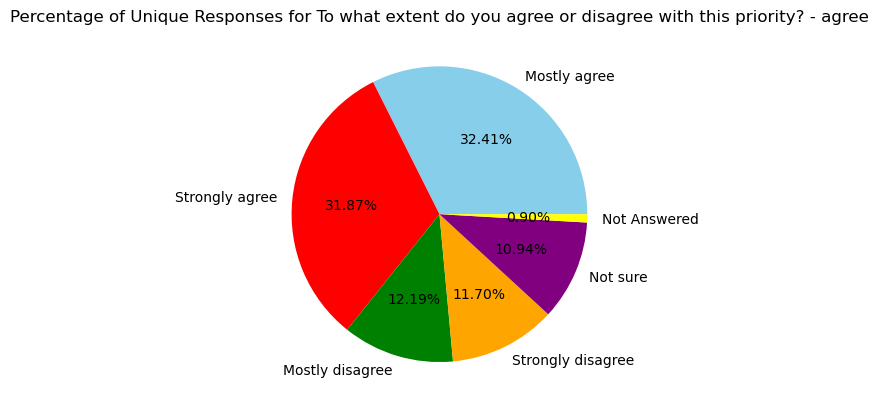

* For the question 'To what extent do you agree or disagree with this priority? - agree', the most frequent response was 'Mostly agree', making up 32.41% of the total responses.
* Other significant responses include 'Strongly agree' with 31.87%; 'Mostly disagree' with 12.19%; 'Strongly disagree' with 11.70%; 'Not sure' with 10.94%; 'Not Answered' with 0.90%.


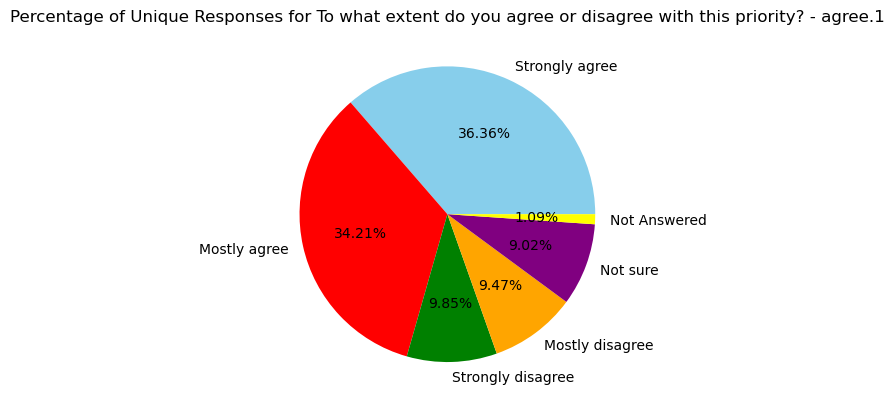

* For the question 'To what extent do you agree or disagree with this priority? - agree.1', the most frequent response was 'Strongly agree', making up 36.36% of the total responses.
* Other significant responses include 'Mostly agree' with 34.21%; 'Strongly disagree' with 9.85%; 'Mostly disagree' with 9.47%; 'Not sure' with 9.02%; 'Not Answered' with 1.09%.


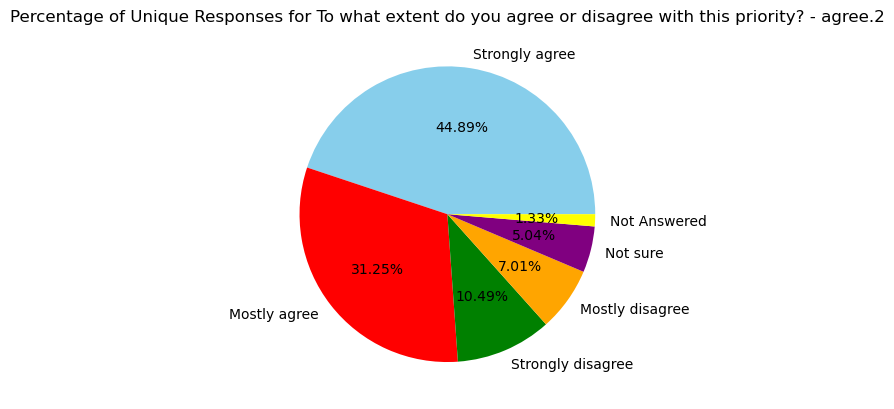

* The question 'To what extent do you agree or disagree with this priority? - agree.2' saw 'Strongly agree' as the top response, representing 44.89% of the answers.
* Further, we observed these responses: 'Mostly agree' with 31.25%; 'Strongly disagree' with 10.49%; 'Mostly disagree' with 7.01%; 'Not sure' with 5.04%; 'Not Answered' with 1.33%.


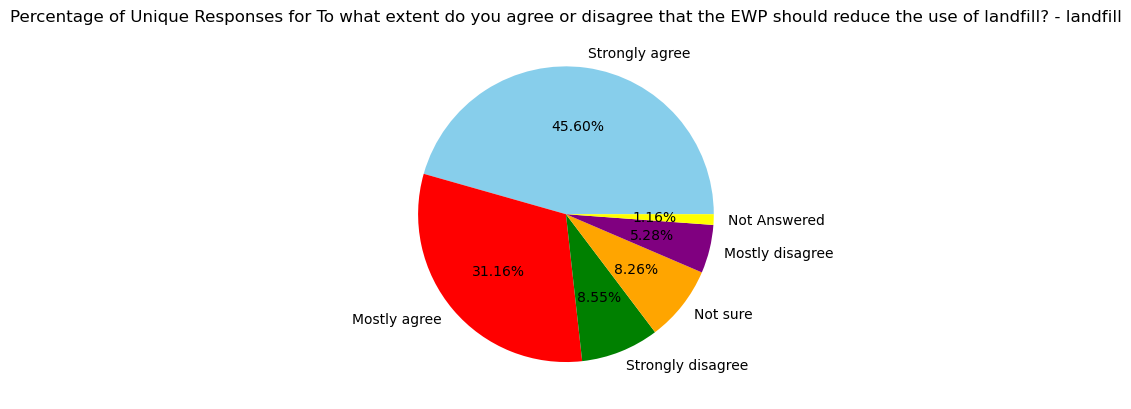

* The question 'To what extent do you agree or disagree that the EWP should reduce the use of landfill? - landfill' saw 'Strongly agree' as the top response, representing 45.60% of the answers.
* Additionally, notable responses were 'Mostly agree' with 31.16%; 'Strongly disagree' with 8.55%; 'Not sure' with 8.26%; 'Mostly disagree' with 5.28%; 'Not Answered' with 1.16%.


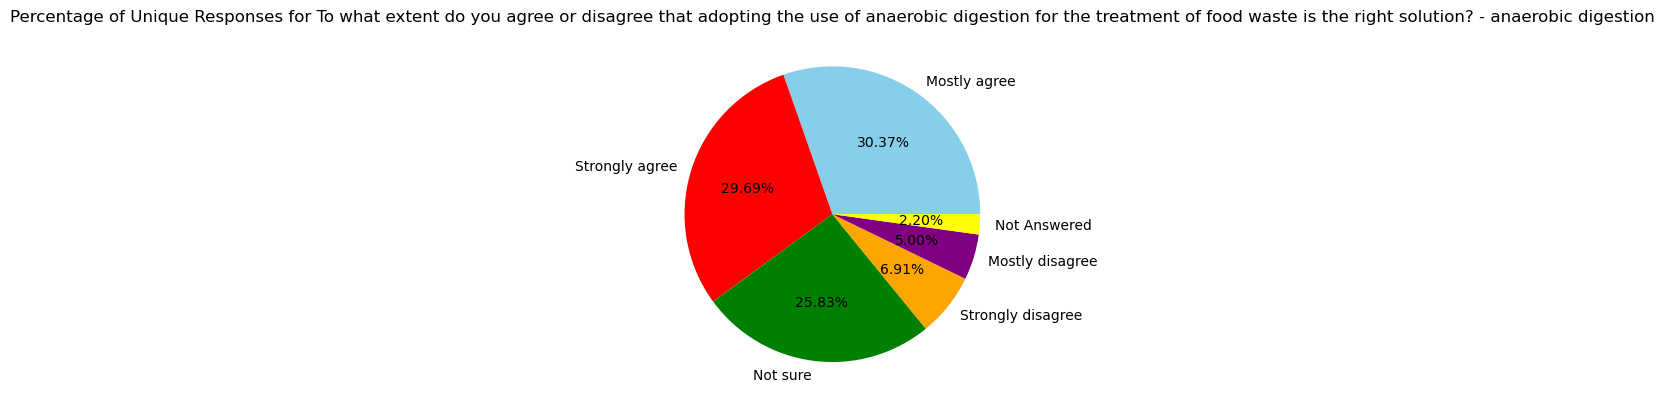

* The question 'To what extent do you agree or disagree that adopting the use of anaerobic digestion for the treatment of food waste is the right solution? - anaerobic digestion' saw 'Mostly agree' as the top response, representing 30.37% of the answers.
* Additionally, notable responses were 'Strongly agree' with 29.69%; 'Not sure' with 25.83%; 'Strongly disagree' with 6.91%; 'Mostly disagree' with 5.00%; 'Not Answered' with 2.20%.


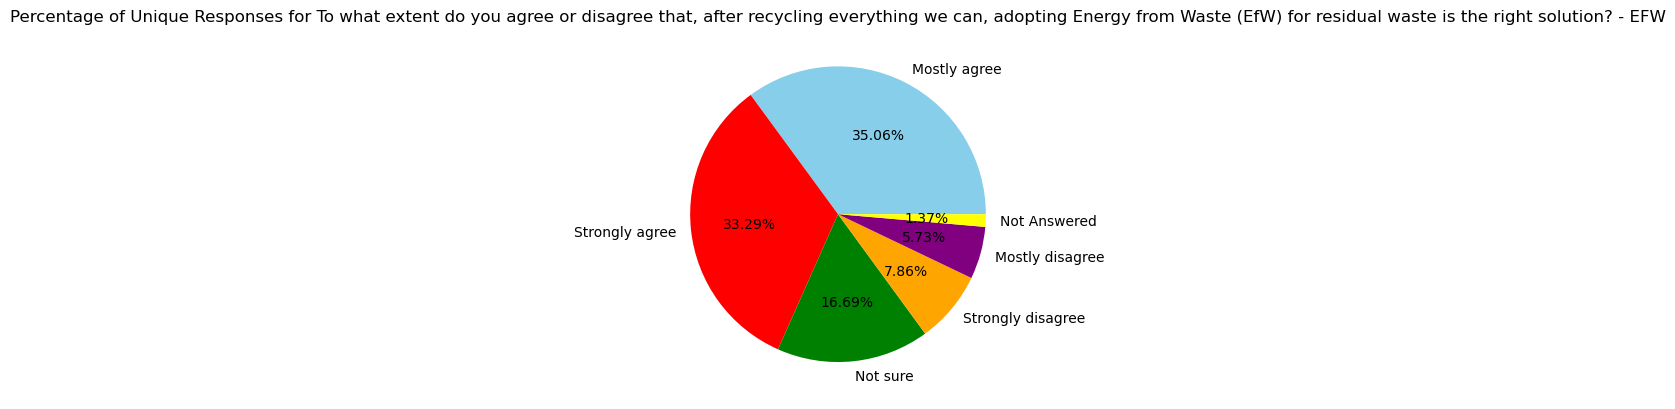

* Regarding the question 'To what extent do you agree or disagree that, after recycling everything we can, adopting Energy from Waste (EfW) for residual waste is the right solution? - EFW', 'Mostly agree' was the most common response, accounting for 35.06% of participants.
* Other responses worth mentioning are 'Strongly agree' with 33.29%; 'Not sure' with 16.69%; 'Strongly disagree' with 7.86%; 'Mostly disagree' with 5.73%; 'Not Answered' with 1.37%.


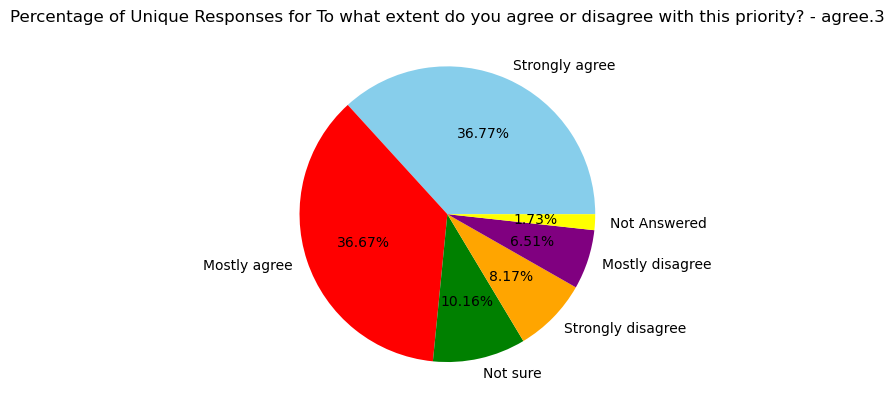

* Regarding the question 'To what extent do you agree or disagree with this priority? - agree.3', 'Strongly agree' was the most common response, accounting for 36.77% of participants.
* Further, we observed these responses: 'Mostly agree' with 36.67%; 'Not sure' with 10.16%; 'Strongly disagree' with 8.17%; 'Mostly disagree' with 6.51%; 'Not Answered' with 1.73%.


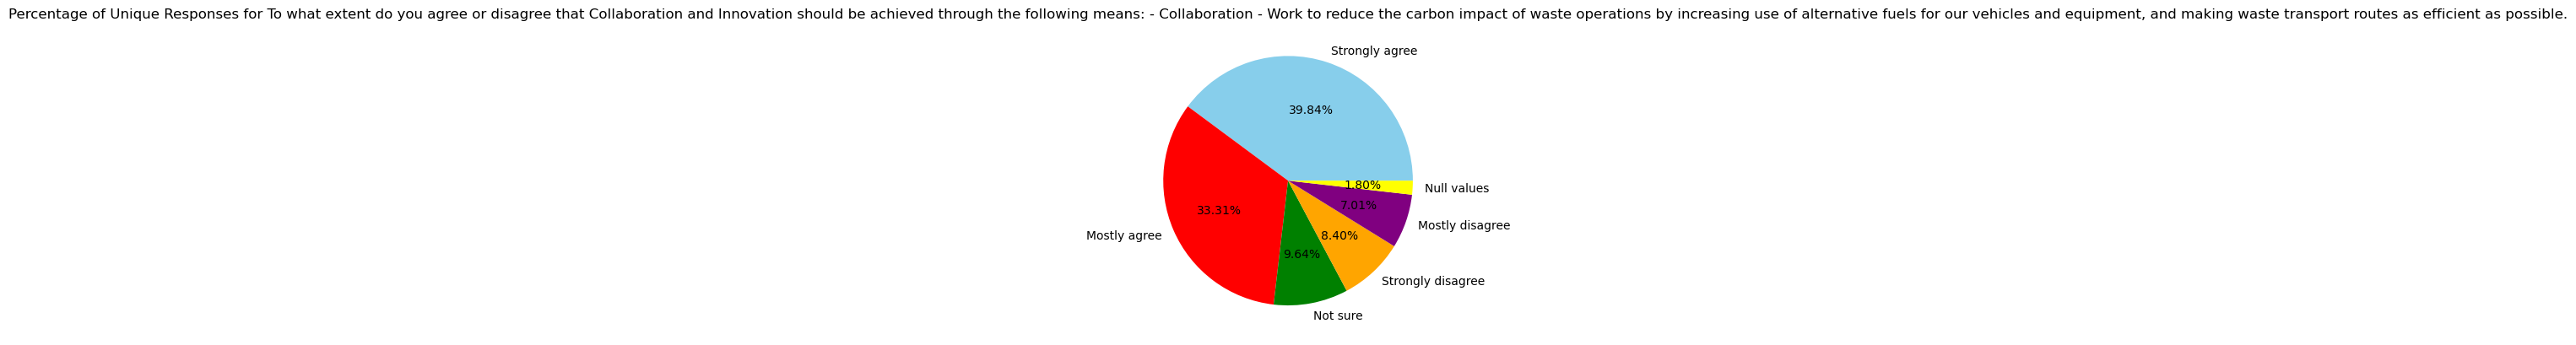

* For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work to reduce the carbon impact of waste operations by increasing use of alternative fuels for our vehicles and equipment, and making waste transport routes as efficient as possible.', the most frequent response was 'Strongly agree', making up 39.84% of the total responses.
* Additionally, notable responses were 'Mostly agree' with 33.31%; 'Not sure' with 9.64%; 'Strongly disagree' with 8.40%; 'Mostly disagree' with 7.01%; 'Null values' with 1.80%.


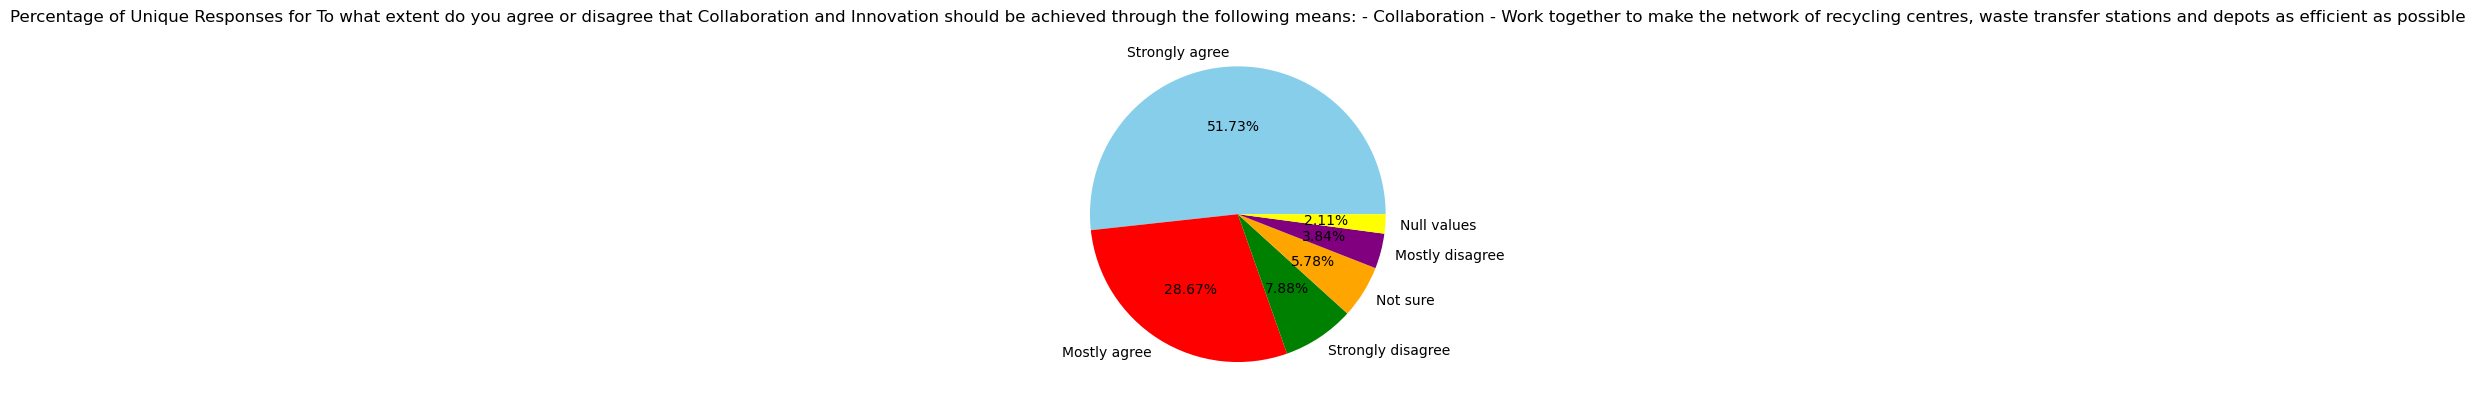

* Regarding the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together to make the network of recycling centres, waste transfer stations and depots as efficient as possible', 'Strongly agree' was the most common response, accounting for 51.73% of participants.
* Further, we observed these responses: 'Mostly agree' with 28.67%; 'Strongly disagree' with 7.88%; 'Not sure' with 5.78%; 'Mostly disagree' with 3.84%; 'Null values' with 2.11%.


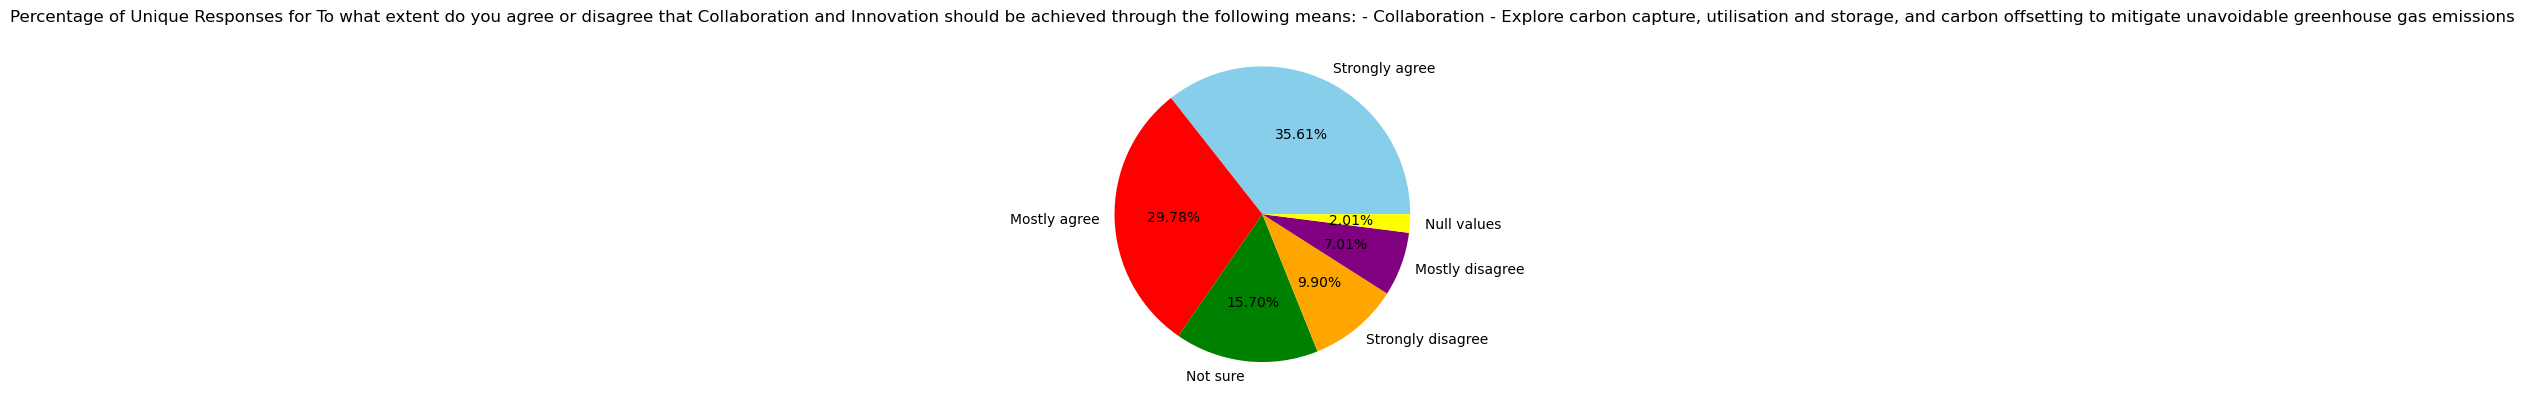

* For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Explore carbon capture, utilisation and storage, and carbon offsetting to mitigate unavoidable greenhouse gas emissions', the most frequent response was 'Strongly agree', making up 35.61% of the total responses.
* Further, we observed these responses: 'Mostly agree' with 29.78%; 'Not sure' with 15.70%; 'Strongly disagree' with 9.90%; 'Mostly disagree' with 7.01%; 'Null values' with 2.01%.


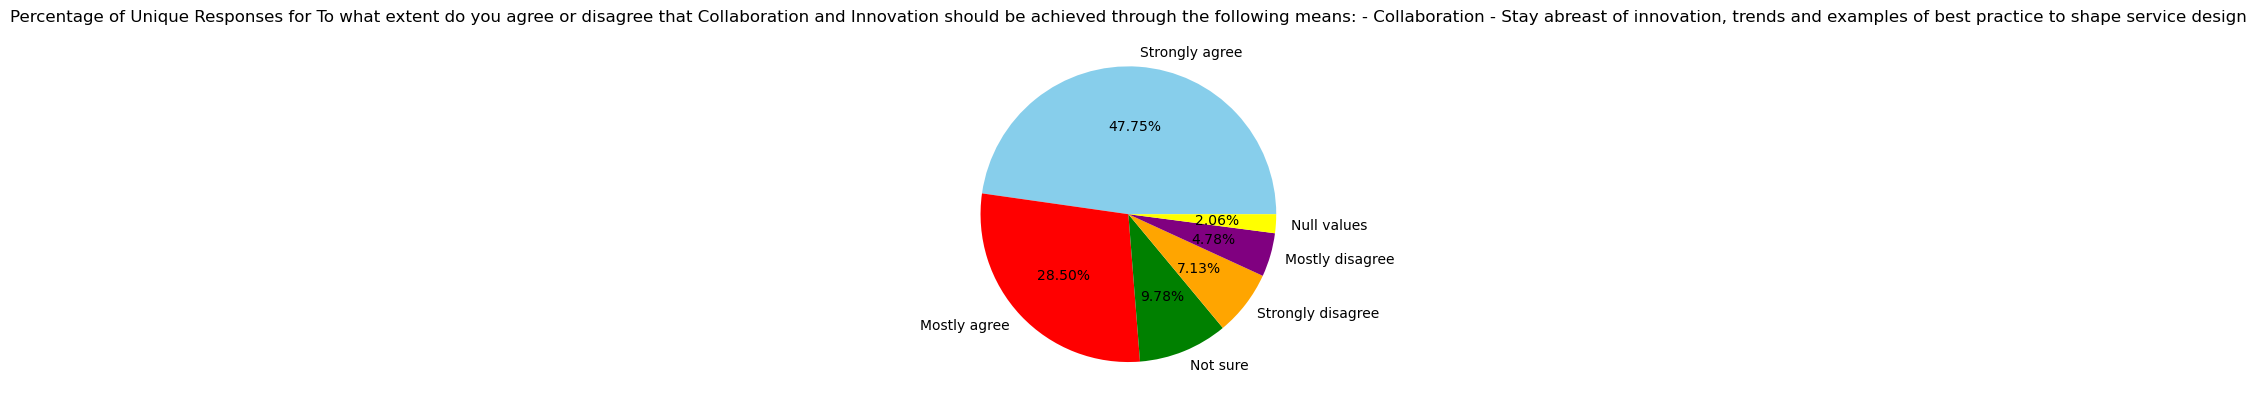

* Regarding the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Stay abreast of innovation, trends and examples of best practice to shape service design', 'Strongly agree' was the most common response, accounting for 47.75% of participants.
* Other responses worth mentioning are 'Mostly agree' with 28.50%; 'Not sure' with 9.78%; 'Strongly disagree' with 7.13%; 'Mostly disagree' with 4.78%; 'Null values' with 2.06%.


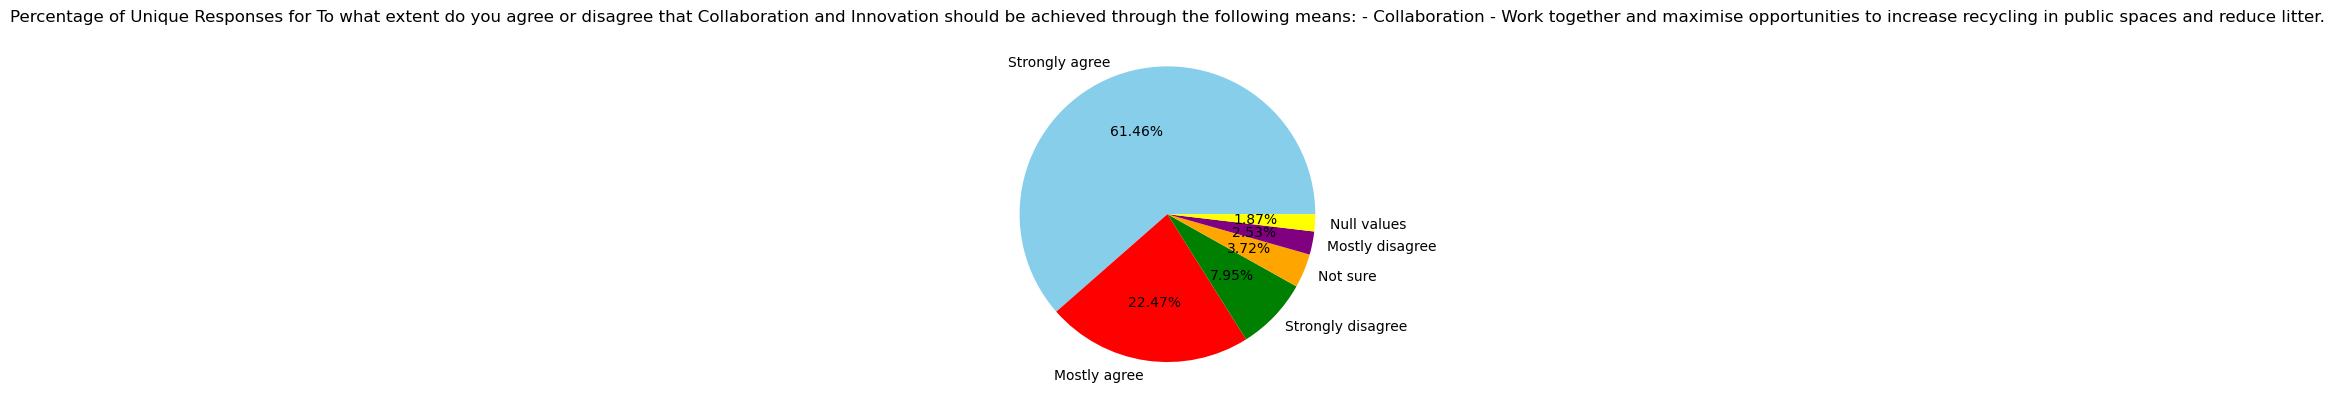

* Regarding the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together and maximise opportunities to increase recycling in public spaces and reduce litter.', 'Strongly agree' was the most common response, accounting for 61.46% of participants.
* Other responses worth mentioning are 'Mostly agree' with 22.47%; 'Strongly disagree' with 7.95%; 'Not sure' with 3.72%; 'Mostly disagree' with 2.53%; 'Null values' with 1.87%.


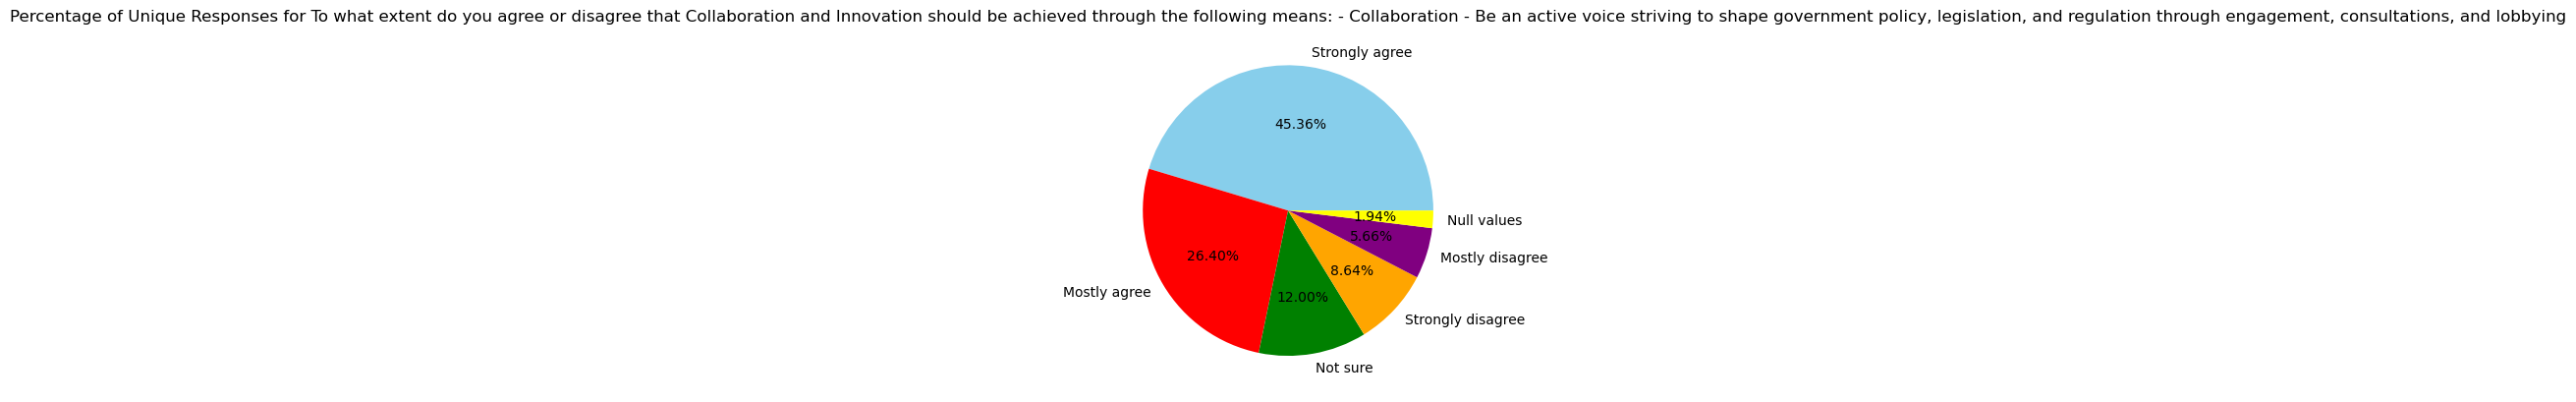

* The question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Be an active voice striving to shape government policy, legislation, and regulation through engagement, consultations, and lobbying' saw 'Strongly agree' as the top response, representing 45.36% of the answers.
* Additionally, notable responses were 'Mostly agree' with 26.40%; 'Not sure' with 12.00%; 'Strongly disagree' with 8.64%; 'Mostly disagree' with 5.66%; 'Null values' with 1.94%.


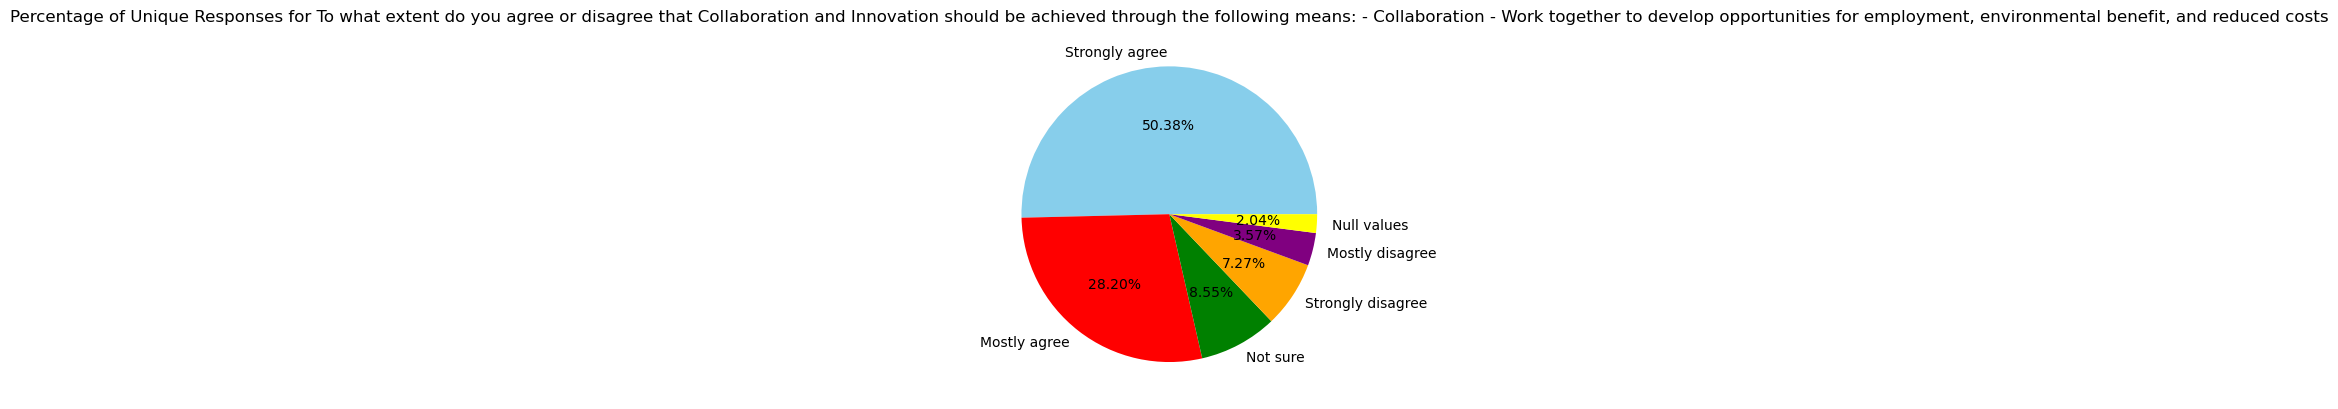

* For the question 'To what extent do you agree or disagree that Collaboration and Innovation should be achieved through the following means: - Collaboration - Work together to develop opportunities for employment, environmental benefit, and reduced costs', the most frequent response was 'Strongly agree', making up 50.38% of the total responses.
* Other significant responses include 'Mostly agree' with 28.20%; 'Not sure' with 8.55%; 'Strongly disagree' with 7.27%; 'Mostly disagree' with 3.57%; 'Null values' with 2.04%.


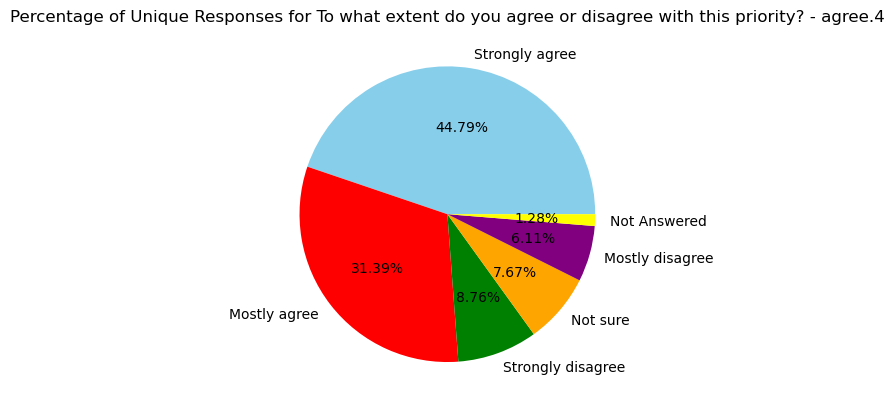

* For the question 'To what extent do you agree or disagree with this priority? - agree.4', the most frequent response was 'Strongly agree', making up 44.79% of the total responses.
* Additionally, notable responses were 'Mostly agree' with 31.39%; 'Strongly disagree' with 8.76%; 'Not sure' with 7.67%; 'Mostly disagree' with 6.11%; 'Not Answered' with 1.28%.


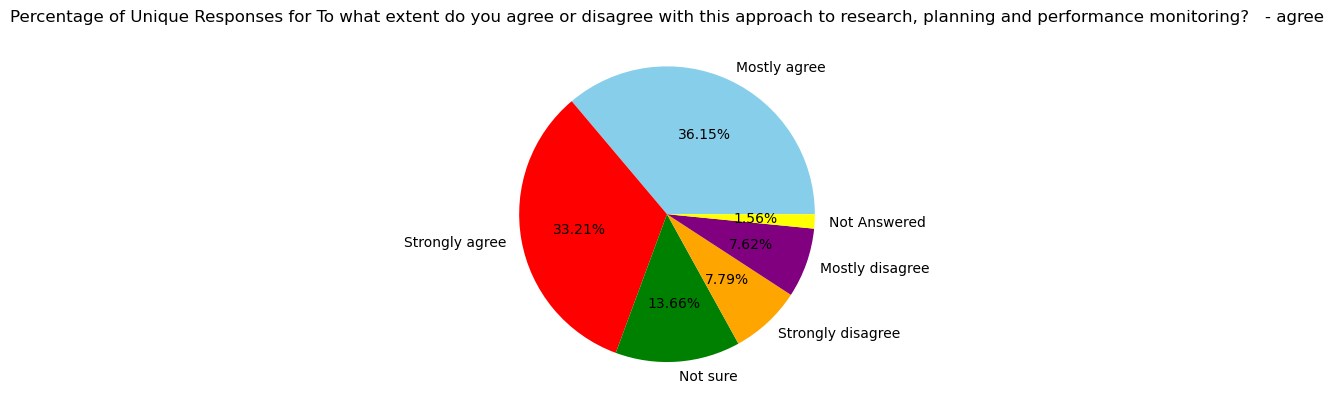

* Regarding the question 'To what extent do you agree or disagree with this approach to research, planning and performance monitoring?   - agree', 'Mostly agree' was the most common response, accounting for 36.15% of participants.
* Other significant responses include 'Strongly agree' with 33.21%; 'Not sure' with 13.66%; 'Strongly disagree' with 7.79%; 'Mostly disagree' with 7.62%; 'Not Answered' with 1.56%.


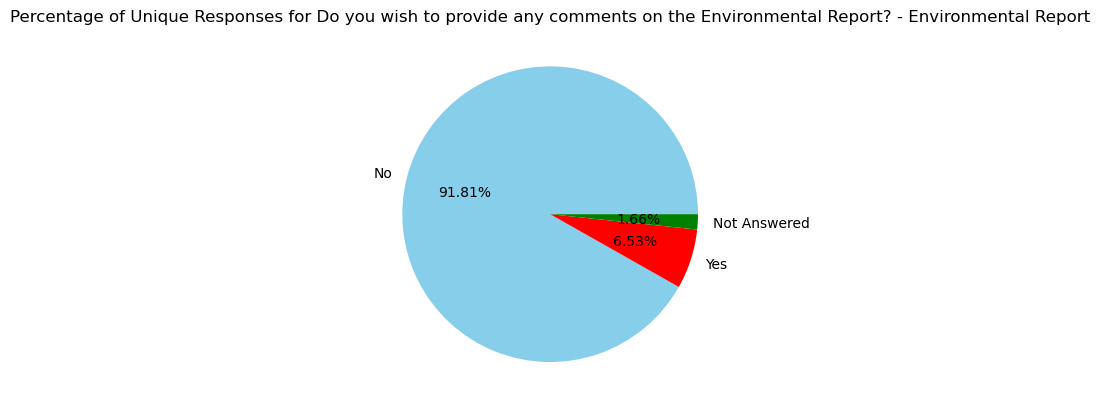

* The question 'Do you wish to provide any comments on the Environmental Report? - Environmental Report' saw 'No' as the top response, representing 91.81% of the answers.
* Further, we observed these responses: 'Yes' with 6.53%; 'Not Answered' with 1.66%.


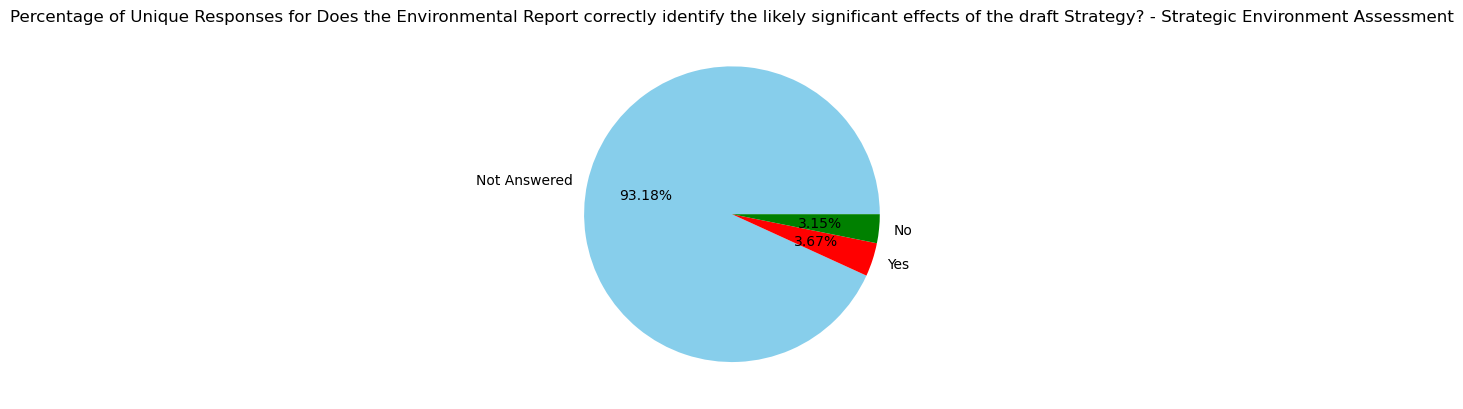

* Regarding the question 'Does the Environmental Report correctly identify the likely significant effects of the draft Strategy? - Strategic Environment Assessment', 'Not Answered' was the most common response, accounting for 93.18% of participants.
* Other responses worth mentioning are 'Yes' with 3.67%; 'No' with 3.15%.


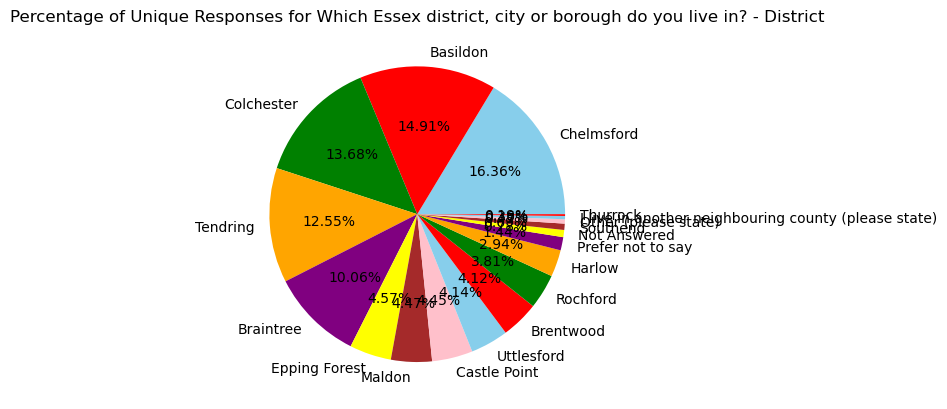

* Regarding the question 'Which Essex district, city or borough do you live in? - District', 'Chelmsford' was the most common response, accounting for 16.36% of participants.
* Further, we observed these responses: 'Basildon' with 14.91%; 'Colchester' with 13.68%; 'Tendring' with 12.55%; 'Braintree' with 10.06%; 'Epping Forest' with 4.57%; 'Maldon' with 4.47%; 'Castle Point' with 4.45%; 'Uttlesford' with 4.14%; 'Brentwood' with 4.12%; 'Rochford' with 3.81%; 'Harlow' with 2.94%; 'Prefer not to say' with 1.44%; 'Not Answered' with 0.78%; 'Southend' with 0.69%; 'Other (please state)' with 0.47%; 'I live in another neighbouring county (please state)' with 0.36%; 'Thurrock' with 0.19%.


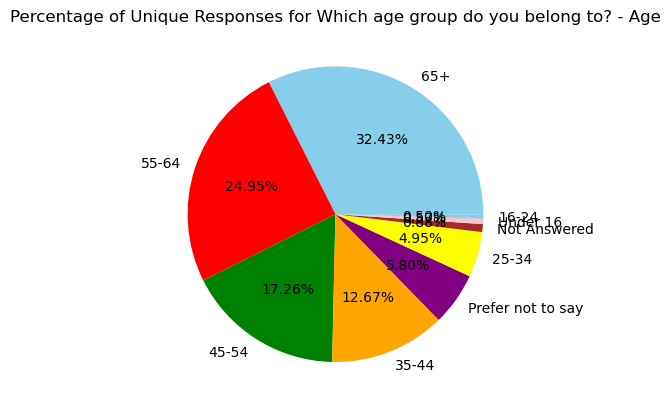

* Regarding the question 'Which age group do you belong to? - Age', '65+' was the most common response, accounting for 32.43% of participants.
* Other responses worth mentioning are '55-64' with 24.95%; '45-54' with 17.26%; '35-44' with 12.67%; 'Prefer not to say' with 5.80%; '25-34' with 4.95%; 'Not Answered' with 0.88%; 'Under 16' with 0.57%; '16-24' with 0.50%.


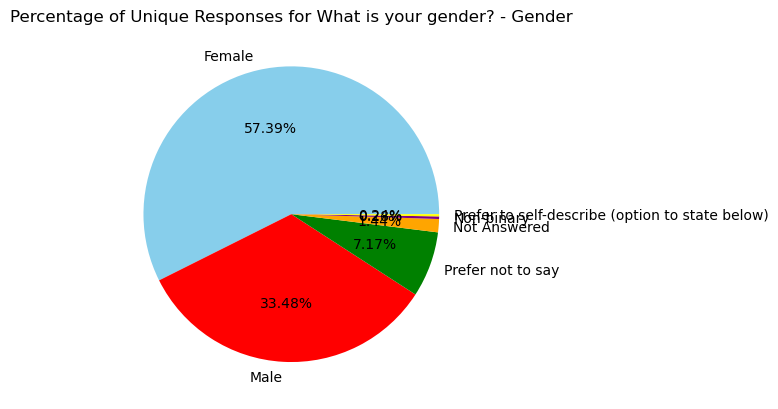

* Regarding the question 'What is your gender? - Gender', 'Female' was the most common response, accounting for 57.39% of participants.
* Further, we observed these responses: 'Male' with 33.48%; 'Prefer not to say' with 7.17%; 'Not Answered' with 1.44%; 'Non-binary' with 0.28%; 'Prefer to self-describe (option to state below)' with 0.24%.


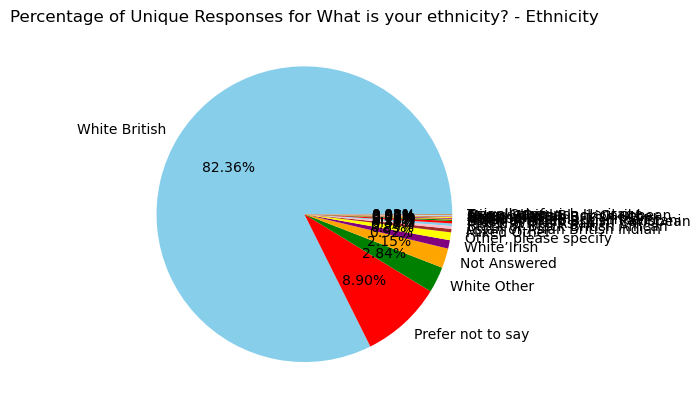

* For the question 'What is your ethnicity? - Ethnicity', the most frequent response was 'White British', making up 82.36% of the total responses.
* Other responses worth mentioning are 'Prefer not to say' with 8.90%; 'White Other' with 2.84%; 'Not Answered' with 2.15%; 'White Irish' with 0.92%; 'Other, please specify' with 0.85%; 'Mixed Other' with 0.38%; 'Asian or Asian British Indian' with 0.31%; 'Black or Black British African' with 0.28%; 'Mixed White/Asian' with 0.26%; 'Black or Black British Caribbean' with 0.14%; 'Asian or Asian British Pakistani' with 0.09%; 'Mixed White/Black African' with 0.09%; 'Chinese' with 0.09%; 'Not Known' with 0.07%; 'Asian or Asian British Other' with 0.07%; 'Gypsy / Roma' with 0.07%; 'Mixed White/Black Caribbean' with 0.05%; 'Traveller of Irish Heritage' with 0.02%; 'Asian Other' with 0.02%.


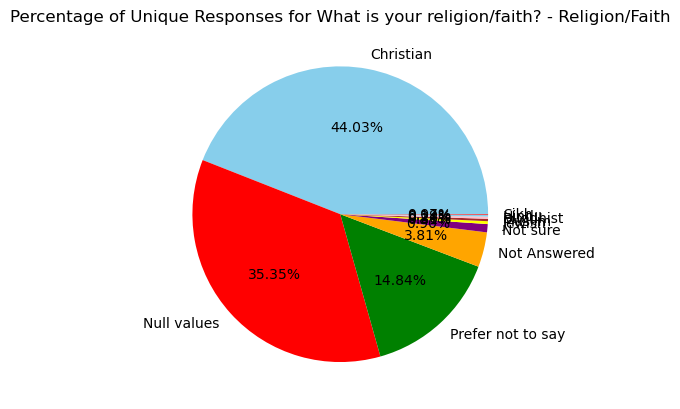

* For the question 'What is your religion/faith? - Religion/Faith', the most frequent response was 'Christian', making up 44.03% of the total responses.
* Additionally, notable responses were 'Null values' with 35.35%; 'Prefer not to say' with 14.84%; 'Not Answered' with 3.81%; 'Not sure' with 0.90%; 'Jewish' with 0.31%; 'Muslim' with 0.26%; 'Buddhist' with 0.24%; 'Hindu' with 0.19%; 'Sikh' with 0.07%.


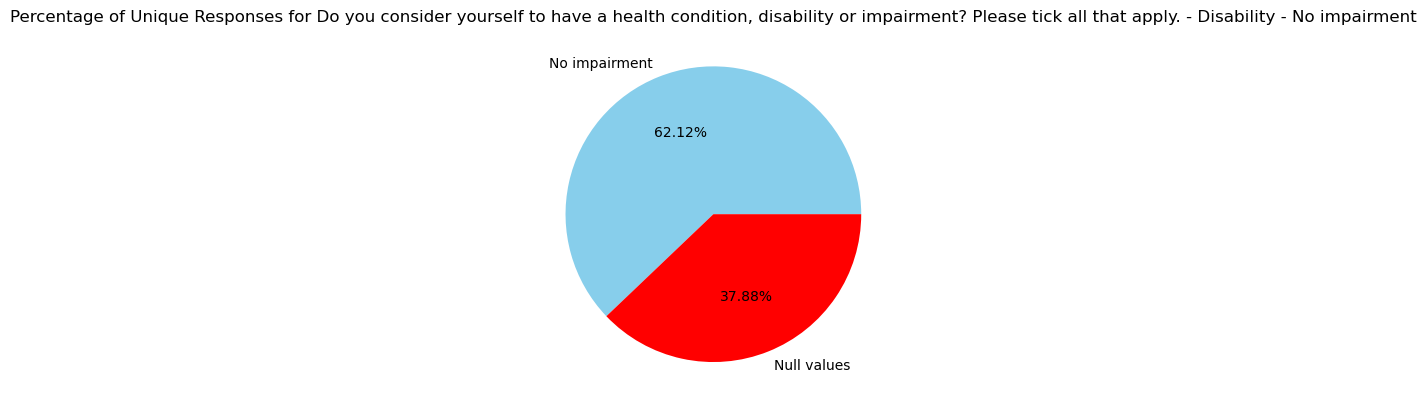

* Regarding the question 'Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - No impairment', 'No impairment' was the most common response, accounting for 62.12% of participants.
* Other significant responses include 'Null values' with 37.88%.


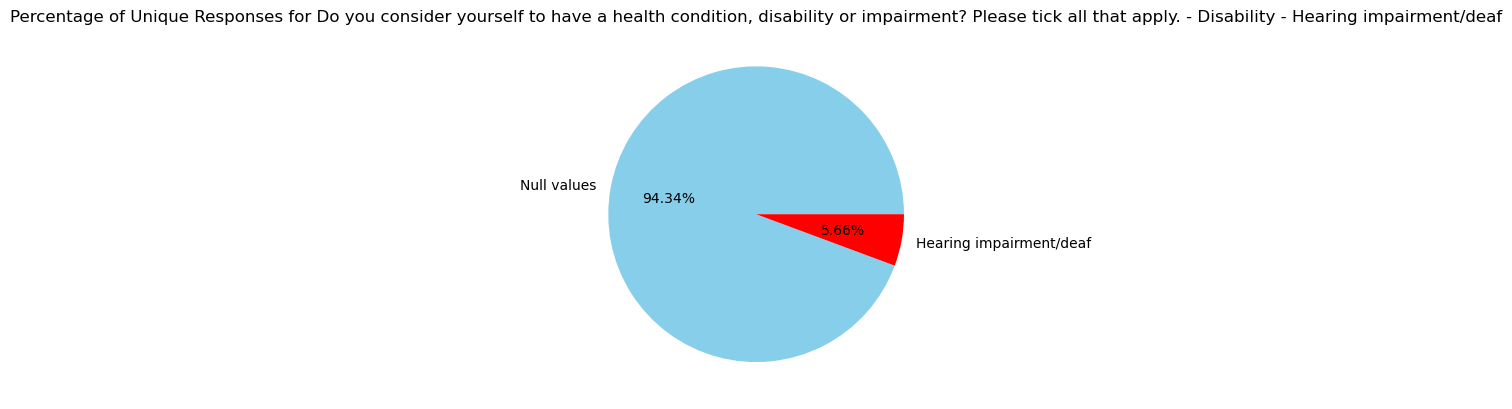

* Regarding the question 'Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Hearing impairment/deaf', 'Null values' was the most common response, accounting for 94.34% of participants.
* Further, we observed these responses: 'Hearing impairment/deaf' with 5.66%.


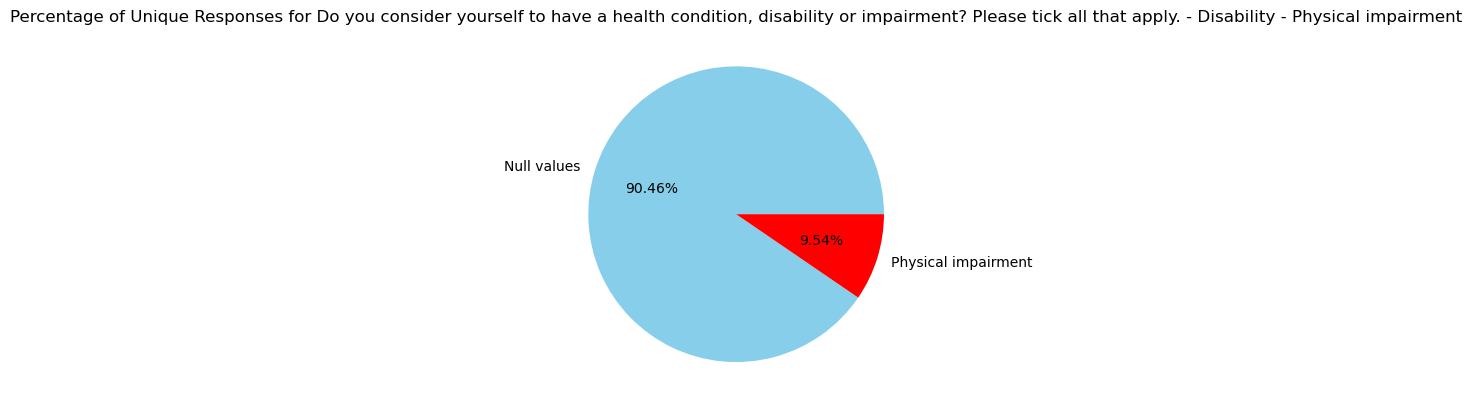

* For the question 'Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Physical impairment', the most frequent response was 'Null values', making up 90.46% of the total responses.
* Other responses worth mentioning are 'Physical impairment' with 9.54%.


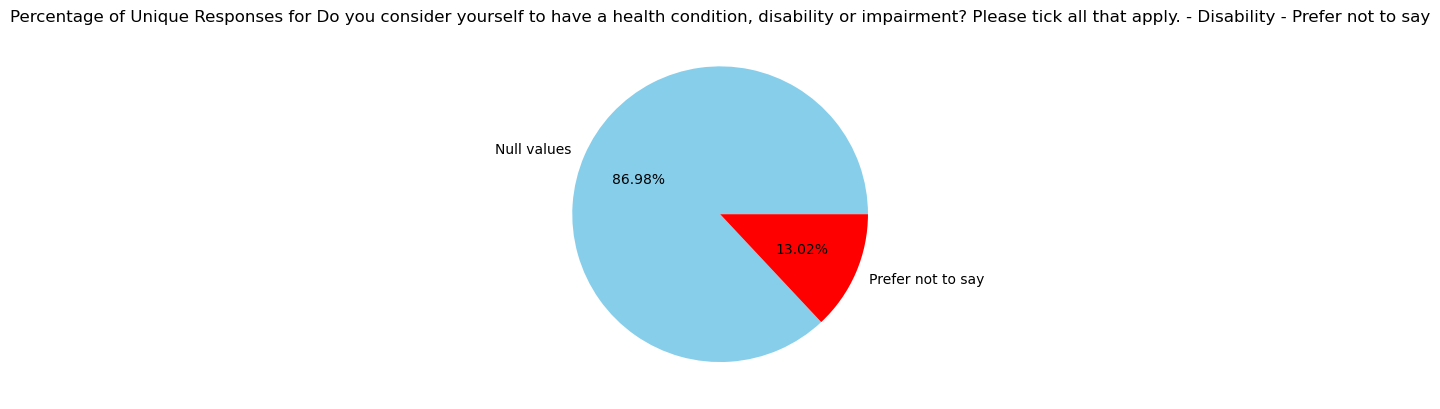

* Regarding the question 'Do you consider yourself to have a health condition, disability or impairment? Please tick all that apply. - Disability - Prefer not to say', 'Null values' was the most common response, accounting for 86.98% of participants.
* Further, we observed these responses: 'Prefer not to say' with 13.02%.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import random

# Assuming nltk is already downloaded
# nltk.download('punkt')

# List of sentence templates for variation
top_response_templates = [
    "For the question '{column}', the most frequent response was '{response}', making up {percentage:.2f}% of the total responses.",
    "The question '{column}' saw '{response}' as the top response, representing {percentage:.2f}% of the answers.",
    "Regarding the question '{column}', '{response}' was the most common response, accounting for {percentage:.2f}% of participants.",
]

other_responses_templates = [
    "Other significant responses include {responses}.",
    "Additionally, notable responses were {responses}.",
    "Further, we observed these responses: {responses}.",
    "Other responses worth mentioning are {responses}.",
]

# Iterate over all column names
for column in df.columns:
    
    # Data cleaning without dropping column
    df[column].fillna("Null values", inplace=True)  
    
    # Count the occurrences of each response
    response_counts = df[column].value_counts()
    
    if df[column].nunique() < 30:
        
        # Calculate the percentage of each response
        response_percentages = (response_counts / response_counts.sum()) * 100

        # Plot the pie chart
        fig, ax = plt.subplots()
        ax.pie(response_percentages, labels=response_counts.index, autopct='%.2f%%', 
               colors=['skyblue', 'red', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink'])

        # Add title
        ax.set_title(f'Percentage of Unique Responses for {column}')

        # Display the plot
        plt.show()

        # Generate summary
        top_response = response_counts.idxmax()
        top_response_percentage = response_percentages.max()

        # Choose a random template for the top response
        top_response_summary = random.choice(top_response_templates).format(
            column=column, response=top_response, percentage=top_response_percentage
        )

        other_responses = response_percentages.drop(labels=top_response)
        other_responses_summary = [f"'{response}' with {percentage:.2f}%" for response, percentage in other_responses.items()]
        other_responses_text = "; ".join(other_responses_summary)

        if other_responses_text:
            # Choose a random template for other responses
            other_responses_summary_text = random.choice(other_responses_templates).format(responses=other_responses_text)
            summary = f"* {top_response_summary}\n* {other_responses_summary_text}"
        else:
            summary = f"* {top_response_summary}"

        # Print the summary
        print(summary)
